In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

In [2]:
from scipy.stats import kstest, norm
from sklearn import preprocessing

In [7]:
#ERROR2
#N2000 S200
S20010=np.array([99.998062,99.998421,99.997818,99.997734,99.997520,99.997566,99.997543,99.997520,99.997124,99.997047,99.998444,99.998611,99.996483,99.996109,99.996330,99.997009,99.997269,99.997231,99.995659,99.996262,99.995438,99.994835,99.995399,99.997375,99.997009,99.994759,99.995461,99.995842,99.997421,99.997238,99.996208,99.996437,99.996033,99.996933,99.997658,99.997704,99.997803,99.997696,99.995682,99.995712,99.996475,99.996658,99.997055,99.996948,99.997124,99.998680,99.996292,99.998558,99.996193,99.996506])
S20050=np.array([99.997307,99.997604,99.997452,99.997169,99.993919,99.993942,99.997208,99.996429,99.996826,99.996620,99.996620,99.997253,99.996399,99.997040,99.994858,99.995560,99.998199,99.995895,99.996811,99.996773,99.997559,99.995827,99.993942,99.997681,99.997360,99.996170,99.996239,99.998268,99.997566,99.996712,99.996651,99.996986,99.996979,99.996223,99.997292,99.997055,99.997604,99.997894,99.997787,99.996597,99.997284,99.997063,99.997116,99.996155,99.996292,99.997810,99.996536,99.996574,99.997345,99.997208])
S200100=np.array([99.997650,99.995621,99.996155,99.997581,99.996582,99.997177,99.996414,99.996689,99.997177,99.996681,99.997017,99.996056,99.997520,99.996994,99.997238,99.997551,99.997055,99.997940,99.996262,99.998184,99.997627,99.996841,99.994110,99.997543,99.997444,99.995995,99.996925,99.997894,99.997635,99.995712,99.997101,99.997200,99.982689,99.996819,99.997581,99.997696,99.976158,99.996391,99.997246,99.996208,99.996017,99.997871,99.996201,99.996841,99.996658,99.997971,99.996414,99.997261,99.996498,99.996964])
S200250=np.array([99.997726,99.997025,99.966019,99.996185,99.994957,99.997063,99.996933,99.996185,99.996567,99.997726,99.996559,99.996941,99.997482,99.997314,99.996658,99.996201,99.997490,99.997269,99.989197,99.995972,99.997887,99.996628,99.996658,99.996140,99.996056,99.997643,99.997383,99.996117,99.997795,99.995087,99.996582,99.979202,99.996773,99.996681,99.997299,99.945496,99.997787,99.996964,99.997330,99.996208,99.997559,99.997673,99.996773,99.997055,99.996994,99.995750,99.996826,99.997116,99.994865,99.996658])
S200500=np.array([99.997086,99.997696,99.993088,99.995804,99.997055,99.995804,99.997643,99.996979,99.996864,99.996223,99.997856,99.997574,99.997795,99.997597,99.996452,99.997482,99.997116,99.997421,99.997330,99.996315,99.996910,99.996452,99.994705,99.997299,99.997314,99.996635,99.997749,99.997032,99.996712,99.997345,99.996681,99.997658,99.996124,99.996902,99.997757,99.997421,99.998177,99.995758,99.996681,99.996971,99.996475,99.996246,99.997444,99.997429,99.997704,99.996803,99.997177,99.997429,99.997055,99.997414])
S2001000=np.array([99.997993,99.996979,99.996628,99.995621,99.997543,99.997543,99.997131,99.995735,99.997391,99.996689,99.996292,99.996826,99.994827,99.997025,99.997757,99.997116,99.996506,99.996658,99.997223,99.997597,99.997406,99.996193,99.997284,99.997040,99.998184,99.995628,99.997124,99.997040,99.997543,99.997894,99.997231,99.997704,99.970383,99.996994,99.996910,99.997467,99.996567,99.996758,99.996033,99.997452,99.997581,99.997017,99.996483,99.996323,99.996689,99.996780,99.995445,99.997818,99.997360,99.997612])
S2002500=np.array([99.997360,99.997612,99.996223,99.997665,99.996193,99.996460,99.995827,99.973175,99.996674,99.996582,99.998001,99.997314,99.995979,99.997780,99.997025,99.996429,99.997086,99.998459,99.997635,99.997215,99.996506,99.997055,99.997131,99.996498,99.997223,99.996071,99.997505,99.997818,99.996742,99.997353,99.996796,99.996170,99.979362,99.995949,99.996193,99.995010,99.997963,99.997787,99.997200,99.996101,99.996620,99.998077,99.996506,99.998047,99.997421,99.996559,99.996689,99.997223,99.997772,99.995712])
S2005000=np.array([99.996109,99.996735,99.997704,99.996414,99.997169,99.997070,99.995354,99.997246,99.997696,99.996849,99.996567,99.996803,99.996971,99.993782,99.997169,99.997513,99.997116,99.997643,99.997505,99.995438,99.996483,99.997147,99.986877,99.997543,99.997635,99.997154,99.996422,99.996292,99.997429,99.996552,99.997696,99.973656,99.996536,99.997513,99.996895,99.997070,99.996933,99.997742,99.996414,99.997032,99.996513,99.996353,99.997002,99.996620,99.997246,99.981361,99.997520,99.997139,99.997025,99.997406])

#N2000S2000
S200010=np.array([99.975784,99.976479,99.973732,99.965775,99.964111,99.963760,99.976555,99.975487,99.977493,99.969284,99.944817,99.944458,99.971222,99.971123,99.962791,99.963982,99.964073,99.968140,99.969337,99.971313,99.982582,99.983627,99.968872,99.967545,99.967728,99.966240,99.962265,99.967171,99.977493,99.979263,99.962845,99.963737,99.960968,99.957481,99.968300,99.968979,99.972549,99.955177,99.956436,99.966782,99.952103,99.945633,99.975746,99.974724,99.968857,99.968788,99.968300,99.969261,99.969948,99.968140])
S200050=np.array([99.976860,99.976524,99.970245,99.963341,99.968872,99.968002,99.967468,99.965591,99.971825,99.973175,99.973198,99.973785,99.966270,99.964302,99.944000,99.963280,99.967484,99.968987,99.964485,99.964584,99.967125,99.970230,99.973122,99.969139,99.957138,99.957169,99.968491,99.972519,99.975548,99.974823,99.967690,99.964249,99.970535,99.975998,99.971336,99.972046,99.979851,99.981125,99.980179,99.980652,99.966652,99.967079,99.973518,99.967949,99.971947,99.970032,99.967796,99.968239,99.963730,99.963562])
S2000100=np.array([99.968948,99.968048,99.973495,99.974594,99.964203,99.980675,99.963318,99.948975,99.966316,99.964439,99.967552,99.955185,99.970665,99.968521,99.972275,99.977539,99.962341,99.958839,99.972771,99.969269,99.962570,99.972969,99.953781,99.971275,99.977417,99.957550,99.971748,99.957130,99.973167,99.974724,99.956245,99.967918,99.953667,99.955223,99.973488,99.962570,99.971375,99.961960,99.967422,99.969154,99.963638,99.970596,99.966721,99.974579,99.975967,99.962143,99.963058,99.978577,99.970207,99.964951])
S2000250=np.array([99.973801,99.958710,99.966003,99.959259,99.969215,99.964584,99.962662,99.967476,99.974136,99.977737,99.972351,99.968460,99.969429,99.968658,99.962212,99.950813,99.977646,99.962029,99.970604,99.947556,99.971573,99.970863,99.969467,99.964867,99.975006,99.977448,99.974632,99.974586,99.975296,99.968948,99.970490,99.957756,99.967087,99.963150,99.969780,99.965958,99.971664,99.958282,99.969444,99.973282,99.973541,99.966385,99.967361,99.974663,99.970207,99.958679,99.974609,99.970711,99.969337,99.969963])
S2000500=np.array([99.969574,99.979843,99.971573,99.962708,99.972641,99.961563,99.973579,99.953316,99.972816,99.971008,99.961830,99.974503,99.970703,99.978088,99.976036,99.975197,99.971764,99.966896,99.967224,99.965935,99.960075,99.977013,99.966209,99.964149,99.971825,99.973228,99.963669,99.972687,99.975182,99.974548,99.963600,99.972435,99.953598,99.962234,99.977402,99.959953,99.957260,99.974121,99.959152,99.976173,99.971581,99.971458,99.975464,99.977127,99.972923,99.967209,99.973091,99.966995,99.965225,99.957367])
S20001000=np.array([99.969986,99.957207,99.976532,99.977364,99.965538,99.961426,99.968651,99.977600,99.969315,99.979836,99.977661,99.980354,99.977341,99.965157,99.961136,99.972198,99.973404,99.980003,99.959068,99.960976,99.969193,99.968872,99.968719,99.960953,99.969765,99.979889,99.963242,99.974060,99.958542,99.960983,99.964478,99.973160,99.974503,99.972389,99.962036,99.966202,99.956688,99.953171,99.979172,99.969101,99.962044,99.957542,99.969765,99.968117,99.969200,99.971329,99.972183,99.969231,99.972351,99.967155])
S20002500=np.array([99.978500,99.970512,99.974289,99.947647,99.968445,99.974564,99.979111,99.967438,99.972824,99.953117,99.963120,99.971558,99.968872,99.979073,99.967361,99.968910,99.961708,99.972610,99.962509,99.976151,99.970810,99.959000,99.964859,99.969887,99.969025,99.973328,99.975288,99.966904,99.960716,99.959793,99.968567,99.948380,99.962067,99.971222,99.965195,99.969994,99.975456,99.972305,99.966011,99.969292,99.959984,99.968506,99.969681,99.948532,99.975266,99.963669,99.978256,99.964745,99.965652,99.976418])
S20005000=np.array([99.968384,99.978439,99.971657,99.971191,99.967140,99.964523,99.976112,99.959442,99.963577,99.975639,99.970169,99.971725,99.968193,99.960091,99.968361,99.976349,99.966568,99.962791,99.972733,99.967812,99.969490,99.974960,99.967682,99.973160,99.962051,99.968506,99.957581,99.967834,99.970947,99.956490,99.964409,99.974075,99.967384,99.963982,99.964157,99.969101,99.973679,99.953140,99.972969,99.965042,99.967209,99.973648,99.975601,99.955299,99.962929,99.975502,99.972389,99.968201,99.972610,99.969391])

#N2000S20000
S2000010=np.array([99.802971,99.802353,99.805626,99.800705,99.801903,99.778404,99.773148,99.797569,99.798355,99.797272,99.792282,99.781097,99.784424,99.777115,99.778603,99.779922,99.797691,99.792847,99.799683,99.801704,99.798141,99.811813,99.809364,99.811050,99.789841,99.791977,99.776772,99.778595,99.777237,99.780960,99.796585,99.789833,99.786903,99.788002,99.797348,99.801834,99.807434,99.809525,99.807297,99.790192,99.809441,99.808060,99.777168,99.769943,99.773598,99.785690,99.790047,99.790726,99.798996,99.802872])
S2000050=np.array([99.799942,99.796783,99.802422,99.802711,99.802780,99.792091,99.799789,99.796921,99.793648,99.796265,99.791397,99.791245,99.803246,99.798233,99.792656,99.793442,99.798141,99.787766,99.811165,99.792976,99.795540,99.795670,99.800354,99.805992,99.801537,99.800827,99.796364,99.797691,99.799454,99.802414,99.787636,99.800926,99.802391,99.802521,99.796730,99.799255,99.807907,99.803513,99.804367,99.798691,99.794830,99.795723,99.796120,99.793884,99.796356,99.789864,99.787804,99.789207,99.801086,99.796013])
S20000100=np.array([99.802391,99.799332,99.793770,99.801010,99.796280,99.796562,99.805542,99.797318,99.801353,99.785332,99.805740,99.796402,99.792900,99.801804,99.785080,99.791573,99.804535,99.788147,99.795280,99.797714,99.806442,99.783302,99.799179,99.800644,99.785278,99.793015,99.794250,99.781815,99.810944,99.796799,99.802284,99.809814,99.801315,99.798698,99.790848,99.799545,99.793839,99.788651,99.794907,99.796310,99.795792,99.793991,99.797585,99.793259,99.775589,99.790009,99.797409,99.790634,99.786301,99.800545])
S20000250=np.array([99.801567,99.790588,99.794411,99.786194,99.795547,99.790176,99.802933,99.804031,99.802162,99.785446,99.796425,99.797386,99.794533,99.801651,99.800484,99.793404,99.794601,99.791077,99.793854,99.792580,99.792252,99.790825,99.799294,99.795349,99.790787,99.805656,99.790306,99.803909,99.794945,99.792923,99.794731,99.795921,99.788803,99.802856,99.800728,99.788010,99.802567,99.794601,99.805618,99.800644,99.802223,99.801575,99.797684,99.793541,99.803200,99.793892,99.797157,99.795975,99.803673,99.804176])
S20000500=np.array([99.794746,99.795074,99.794395,99.791176,99.786133,99.793503,99.802528,99.785339,99.793961,99.796227,99.789200,99.796776,99.798599,99.806885,99.799202,99.807854,99.787102,99.788063,99.789551,99.804123,99.808281,99.790703,99.792305,99.797409,99.798439,99.799202,99.805557,99.799698,99.798843,99.799561,99.798019,99.787674,99.802032,99.806152,99.801537,99.794365,99.794930,99.796143,99.791191,99.789635,99.801926,99.793846,99.792046,99.800400,99.793724,99.810471,99.799347,99.791557,99.798706,99.803078])
S200001000=np.array([99.802101,99.788322,99.799377,99.787224,99.792282,99.801735,99.801826,99.794014,99.793282,99.803535,99.797340,99.797226,99.793564,99.792091,99.800339,99.803047,99.796738,99.794968,99.794876,99.800491,99.802231,99.803642,99.797318,99.800446,99.802994,99.797867,99.794540,99.787567,99.808128,99.790100,99.814201,99.791885,99.795982,99.791107,99.801514,99.793655,99.798508,99.802383,99.799545,99.802933,99.787041,99.787903,99.800430,99.797012,99.805893,99.801003,99.796394,99.800774,99.802406,99.796707])
S200002500=np.array([99.795708,99.807632,99.799561,99.794937,99.789894,99.795174,99.787964,99.796700,99.788498,99.802162,99.796524,99.791809,99.802635,99.807816,99.794365,99.800438,99.793602,99.802475,99.799561,99.793846,99.797424,99.804298,99.796707,99.801163,99.791252,99.799515,99.798752,99.795448,99.797523,99.796761,99.804596,99.809189,99.799240,99.800125,99.794479,99.797714,99.794579,99.804459,99.796532,99.799454,99.796806,99.784050,99.801590,99.798637,99.803589,99.793762,99.797630,99.806412,99.798683,99.795105])
S200005000=np.array([99.800049,99.787170,99.797615,99.796066,99.794807,99.802399,99.800919,99.791740,99.792290,99.794357,99.797600,99.804321,99.796829,99.794930,99.787170,99.801521,99.801170,99.805222,99.795395,99.799568,99.792915,99.787033,99.796562,99.798752,99.792114,99.792137,99.803024,99.797302,99.794937,99.791641,99.791122,99.787537,99.803101,99.797897,99.788185,99.793892,99.796867,99.794571,99.795082,99.796860,99.802299,99.795700,99.793625,99.791931,99.797447,99.802711,99.784988,99.799034,99.798599,99.802338])

Text(0.5, 0, 'Iteraciones')

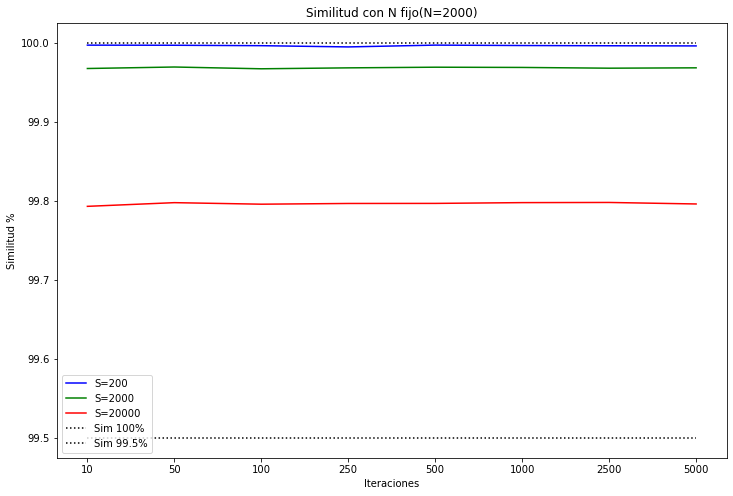

In [8]:
X2=np.array(['10','50','100','250','500','1000','2500','5000'])
REF=np.array([99.5,99.5,99.5,99.5,99.5,99.5,99.5,99.5])
REF2=np.array([100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0])
ERS200 = np.array([np.mean(S20010),np.mean(S20050),np.mean(S200100),np.mean(S200250),np.mean(S200500),np.mean(S2001000),np.mean(S2002500),np.mean(S2005000)])
ERS2000 = np.array([np.mean(S200010),np.mean(S200050),np.mean(S2000100),np.mean(S2000250),np.mean(S2000500),np.mean(S20001000),np.mean(S20002500),np.mean(S20005000)])
ERS20000 = np.array([np.mean(S2000010),np.mean(S2000050),np.mean(S20000100),np.mean(S20000250),np.mean(S20000500),np.mean(S200001000),np.mean(S200002500),np.mean(S200005000)])
fig4,ax4 = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
ax4.plot(X2,ERS200,label='S=200',color='blue')
ax4.plot(X2,ERS2000,label='S=2000',color='green')
ax4.plot(X2,ERS20000,label='S=20000',color='red')
ax4.plot(X2,REF2,'k:',label='Sim 100%',color='black')
ax4.plot(X2,REF,'k:',label='Sim 99.5%',color='black')

ax4.set_title("Similitud con N fijo(N=2000)")
ax4.legend()
ax4.set_ylabel("Similitud %")
ax4.set_xlabel("Iteraciones")

Text(0.5, 0, 'S')

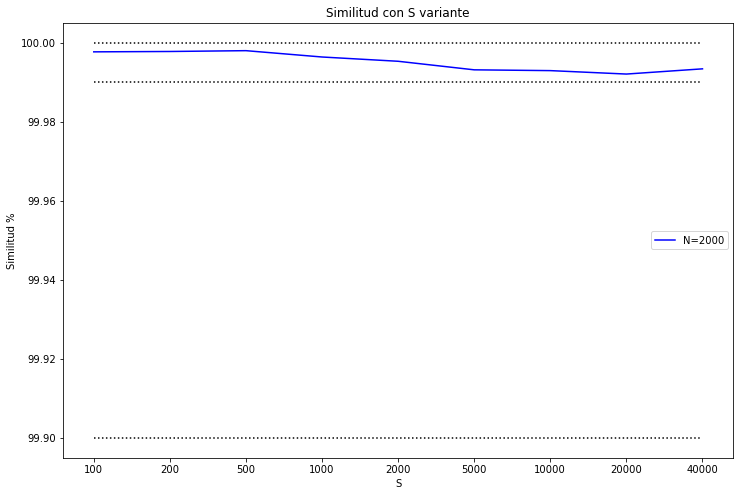

In [44]:
X5=np.array(['100','200','500','1000','2000','5000','10000','20000','40000'])
REFV2=np.array([99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.9,99.9])
REFV22=np.array([99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99,99.99])
REF100V2=np.array([100,100,100,100,100,100,100,100,100])
NMEAN_V2=np.array([np.mean(ER2S100),np.mean(ER2S200),np.mean(ER2S500),
                np.mean(ER2S1000),np.mean(ER2S2000),np.mean(ER2S5000),
                np.mean(ER2S10000),np.mean(ER2S20000),np.mean(ER2S40000)])
fig7,ax7 = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
ax7.plot(X5,NMEAN_V2,label='N=2000',color='blue')
ax7.plot(X5,REFV2,'k:',color='black')
ax7.plot(X5,REFV22,'k:',color='black')
ax7.plot(X5,REF100V2,'k:',color='black')

ax7.set_title("Similitud con S variante")
ax7.legend()
ax7.set_ylabel("Similitud %")
ax7.set_xlabel("S")

In [2]:
SPV2_1000=np.array([2.07499465, 2.02563795, 1.6196249499999997, 1.5749470500000002, 1.5599710999999998, 1.5576390999999998, 1.5422600999999998, 1.5464702999999997, 1.54110005, 1.53603155, 1.2708624499999996, 1.2833514999999998, 1.2846455499999998, 1.2764950499999999, 1.2777732499999999, 1.2812536500000002, 1.2836024499999996, 1.2867888, 1.2870362, 1.2990000499999999, 1.2994293000000001, 1.2975973499999998, 1.300176, 1.30477425, 1.3017106999999999, 1.30291025, 1.3072355, 1.3144391500000001, 1.3150094, 1.3140109500000001, 1.31629925, 1.3182330500000004, 1.32488085, 1.3292334499999998, 1.3300254000000002, 1.3342554500000001, 1.3307395999999998, 1.3354582000000002, 1.33740475, 1.1337137500000005, 1.13366105, 1.1366816, 1.1296189499999998, 1.1326188, 1.1359455999999999, 1.13548195, 1.1386133499999995, 1.13723435, 1.14222325, 1.14239, 1.14576045, 1.1502500999999998, 1.1432103500000002, 1.14860835, 1.1452764500000001, 1.1484257500000001, 1.14685195, 1.1461127999999998, 1.15137515, 1.1500654, 1.1538842, 1.1526100500000003, 1.1550714, 1.1542147, 1.15448675, 1.1579079999999997, 1.15755385, 1.1546466000000002, 1.15949315, 1.158136, 1.1621477500000001, 1.16624375, 1.155955, 1.15996035, 1.16457525, 1.1628348, 1.1669276499999999, 1.1687613, 1.1684754499999999, 1.16127175, 1.17091675, 1.1753283, 1.1711965, 1.1720852, 1.1720122, 1.17335905, 1.17160485, 1.1748111500000005, 1.1704861000000002, 1.1753357500000001, 1.17773665, 1.17720825, 1.1817282500000001, 1.1775345, 1.1713137, 1.18457605, 1.1741464000000001, 1.1838179499999997, 1.1855053, 1.17709185])
#SPV2_1K = np.flip(SPV2_1000)

In [3]:
SPV2_2000=np.array([2.7131925, 2.4865121999999995, 1.9301679000000003, 1.8962874000000003, 1.8695508, 1.8687580000000001, 1.8689341, 1.8605702999999998, 1.8475079000000005, 1.8516507, 1.5366020499999997, 1.5376391, 1.5365672500000003, 1.5330324000000002, 1.53712705, 1.53666715, 1.5338431, 1.53389365, 1.5353154, 1.5362313500000002, 1.5371541999999998, 1.5400431499999998, 1.54282195, 1.54602535, 1.546073, 1.5484003, 1.5502144999999998, 1.5521785999999997, 1.55536685, 1.5557342999999997, 1.56225635, 1.5764618499999998, 1.57892215, 1.5670782499999998, 1.56960265, 1.5752028499999997, 1.57539765, 1.5812335, 1.5794573999999995, 1.5813629500000002, 1.3313558000000003, 1.3336161500000001, 1.33379875, 1.33370335, 1.3366494500000001, 1.3382459000000002, 1.33839715, 1.3406941500000003, 1.3423707000000002, 1.3453320000000004, 1.3437134499999999, 1.3475687000000003, 1.3468610499999998, 1.348257, 1.3491732499999998, 1.3508849500000002, 1.3547512499999999, 1.3538221, 1.3544656, 1.3550542, 1.3578795, 1.3592454, 1.3594448, 1.35985545, 1.36319565, 1.3674672500000002, 1.3743694, 1.3655034499999998, 1.36711715, 1.36883305, 1.37602455, 1.37208365, 1.37227795, 1.3727979, 1.3734486499999998, 1.3753809000000001, 1.3757048500000002, 1.3774525499999997, 1.3787191, 1.3785103500000002, 1.38015675, 1.3830969999999998, 1.38461685, 1.3851401000000003, 1.3849974500000002, 1.3870039, 1.3868688000000005, 1.3868288999999998, 1.3904747500000003, 1.3918701999999998, 1.3912732000000003, 1.3932994999999997, 1.39353715, 1.40260235, 1.3975551499999999, 1.4027656000000002, 1.4003690000000004, 1.4009852500000002, 1.4071738999999999, 1.4027762499999996])
#SPV2_2K=np.flip(SPV2_2000)

In [4]:
SPV2_5000=np.array([3.6592067, 3.4410588000000004, 2.6684505, 2.6045971999999997, 2.5484610000000005, 2.5087881000000003, 2.4618386, 2.4190823, 2.4058881999999997, 2.3587747000000006, 1.9296349, 1.9459657, 1.9435021, 1.9131627000000002, 1.8875043999999999, 1.8928433000000002, 1.8841841000000001, 1.8796631000000001, 1.8876622, 1.8791725999999997, 1.8811053000000002, 1.8811928000000002, 1.8839573, 1.8820467, 1.881479, 1.8824649, 1.8830473, 1.8868461, 1.8857640000000004, 1.8855366, 1.8860457000000004, 1.8934332, 1.8954476, 1.8964334, 1.8970817, 1.9027826, 1.9232215000000004, 1.9390464, 1.9305391999999997, 1.9409152999999997, 1.5966262, 1.5844938000000002, 1.5842616, 1.6050573, 1.6050796999999999, 1.5887512999999998, 1.5879021000000002, 1.5910968, 1.5912358000000002, 1.5929600000000002, 1.5931472999999998, 1.5943276999999998, 1.5962030999999999, 1.5949149, 1.5968396999999999, 1.5986503, 1.5994902000000002, 1.6003076, 1.6014951, 1.6026007, 1.6028941999999997, 1.6040752999999999, 1.6049263, 1.6052119999999999, 1.606935, 1.6071818, 1.6085059000000002, 1.6124459999999998, 1.6097011, 1.6110546000000003, 1.6127347, 1.6113533, 1.6136035, 1.6142512, 1.6139737, 1.6154172, 1.6155766, 1.6168924999999998, 1.6182846999999998, 1.6189495, 1.6196735000000004, 1.6201606000000002, 1.6203248, 1.6210563, 1.6214624, 1.6235019000000002, 1.6232176000000003, 1.6253623000000004, 1.6239280999999999, 1.6247477000000003, 1.6249955, 1.6259218, 1.6274283, 1.6287823000000003, 1.6296182000000001, 1.6286784, 1.6283367000000002, 1.6325495, 1.6306605, 1.6328408999999997])
#SPV2_5000=np.flip(SPV2_2000)

In [5]:
SPV2_10000=np.array([4.364216166666666, 4.114177000000001, 3.194760666666667, 3.1182648333333334, 3.0592431666666666, 3.0122141666666664, 2.9741955, 2.9444199999999996, 2.9191668333333336, 2.8982659999999996, 2.345764, 2.333278333333333, 2.322013666666667, 2.3130821666666663, 2.304753666666667, 2.297382166666667, 2.2907523333333333, 2.2852885, 2.278789666666666, 2.2697126666666665, 2.2648705000000002, 2.2606591666666667, 2.255843, 2.2477363333333336, 2.241665166666667, 2.2379291666666665, 2.234631166666667, 2.2281618333333335, 2.2214515, 2.211933166666667, 2.2038751666666667, 2.1986898333333333, 2.2002788333333334, 2.198354, 2.1946968333333334, 2.1931355, 2.1888953333333334, 2.1847213333333335, 2.1807495, 2.1747929999999998, 1.7932325000000002, 1.792407166666667, 1.7945839999999997, 1.7919693333333333, 1.7915971666666666, 1.790813, 1.7914178333333337, 1.7920941666666668, 1.7904468333333334, 1.7906796666666667, 1.7900783333333334, 1.7888505, 1.7888998333333337, 1.7884666666666666, 1.7884075, 1.788216, 1.7878271666666665, 1.7869521666666666, 1.7859996666666664, 1.7851801666666667, 1.7838945, 1.7851686666666666, 1.7850825, 1.7860871666666667, 1.7864171666666666, 1.7880578333333332, 1.7885371666666667, 1.7889343333333334, 1.789243666666667, 1.7904738333333332, 1.7910475000000001, 1.7915366666666668, 1.7918118333333333, 1.7926974999999998, 1.7932646666666667, 1.7937965000000002, 1.7945338333333334, 1.7949251666666666, 1.7963310000000001, 1.7964988333333334, 1.7971466666666667, 1.796734, 1.7979935000000002, 1.7990355000000002, 1.799688, 1.8006135, 1.8001856666666667, 1.8016604999999999, 1.8013398333333333, 1.803939, 1.8022271666666665, 1.8032743333333332, 1.8047288333333331, 1.8043391666666668, 1.8055515, 1.8060121666666669, 1.8059153333333333, 1.807463, 1.8085906666666667, 1.809647])
#SPV2_10000=np.flip(SPV2_2000)

(10000.0, 100.0)

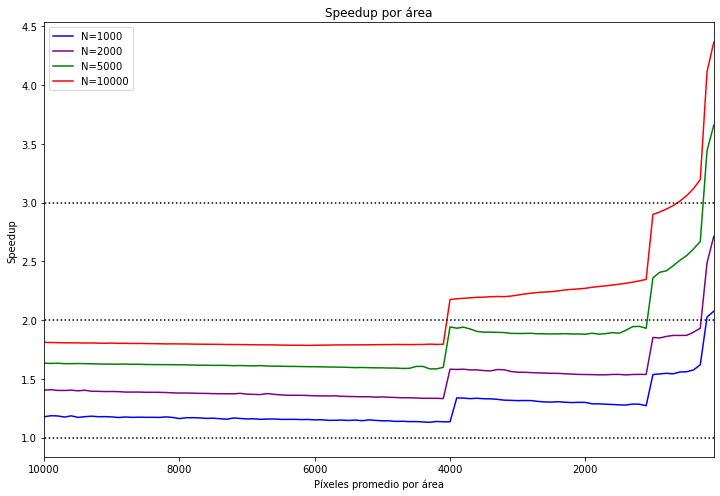

In [6]:
XLEN = np.linspace(100,10000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([2.0 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
fig8,ax8 = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
ax8.plot(XLEN,SPV2_1000,label='N=1000',color='blue')
ax8.plot(XLEN,SPV2_2000,label='N=2000',color='purple')
ax8.plot(XLEN,SPV2_5000,label='N=5000',color='green')
ax8.plot(XLEN,SPV2_10000,label='N=10000',color='red')
ax8.plot(XLEN,XV3_1,'k:',color='black')
ax8.plot(XLEN,XV3_2,'k:',color='black')
ax8.plot(XLEN,XV3_3,'k:',color='black')

ax8.set_title("Speedup por área")
ax8.legend()
ax8.set_ylabel("Speedup")
ax8.set_xlabel("Píxeles promedio por área")

plt.xlim(max(XLEN), min(XLEN))

In [16]:
ER2K40K = np.array([99.9934236, 99.99334259999999, 99.9934839, 99.9933073, 99.99336859999998, 99.9933663, 99.99331809999998, 99.9933493, 99.9933777, 99.99350740000001, 99.99339909999999, 99.99341430000001, 99.9934714, 99.9933282, 99.99342039999999, 99.9933922, 99.9934164, 99.9934121, 99.993399, 99.9933814])
ER2K2K = np.array([99.99561125, 99.9958295, 99.99579325, 99.995151375, 99.99557212500001, 99.995182, 99.99558625, 99.99566262500001, 99.99564074999998, 99.99549199999998, 99.99548899999999, 99.99536699999999, 99.995431, 99.99548437500002, 99.995424375, 99.99540999999999, 99.99541562499999, 99.99544612499999, 99.99547112500001, 99.99549])
ER2K1C = np.array([99.99964424999999, 99.99939925, 99.99915225, 99.99945050000001, 99.99945087500001, 99.99928775, 99.999430625, 99.99931425000001, 99.99910062500001, 99.9994115, 99.999095875, 99.999508875, 99.99914175, 99.99947937499999, 99.999369625, 99.99922937500001, 99.99932199999999, 99.999364875, 99.99943175000001, 99.99917512500002])

In [17]:
ER2K2K.shape

(20,)

Text(0.5, 0, 'Pasos de simulación')

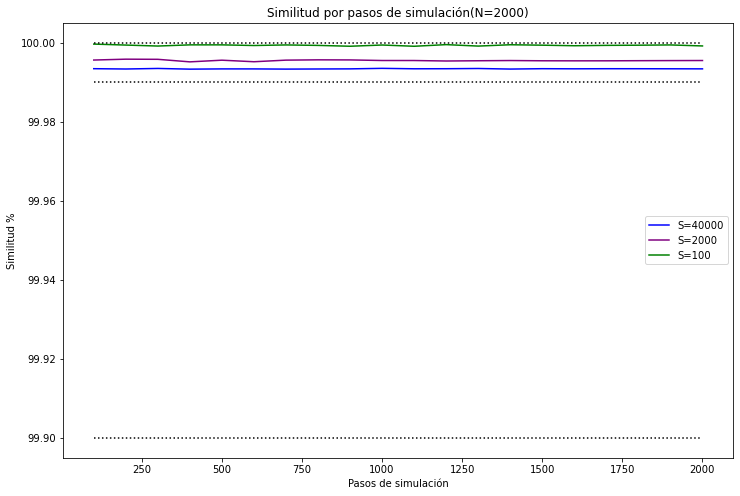

In [18]:
XLEN2 = np.linspace(100,2000,20)
XV4_1 = np.array([100.0 for i in range(20)])
XV4_2 = np.array([99.9 for i in range(20)])
XV4_3 = np.array([99.99 for i in range(20)])

fig9,ax9 = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
ax9.plot(XLEN2,ER2K40K,label='S=40000',color='blue')
ax9.plot(XLEN2,ER2K2K,label='S=2000',color='purple')
ax9.plot(XLEN2,ER2K1C,label='S=100',color='green')
ax9.plot(XLEN2,XV4_1,'k:',color='black')
ax9.plot(XLEN2,XV4_2,'k:',color='black')
ax9.plot(XLEN2,XV4_3,'k:',color='black')

ax9.set_title("Similitud por pasos de simulación(N=2000)")
ax9.legend()
ax9.set_ylabel("Similitud %")
ax9.set_xlabel("Pasos de simulación")

#plt.xlim(max(XLEN), min(XLEN))


In [74]:
V2ER1K=np.array([99.98745062500001, 99.98469349999999, 99.9854955, 99.9857025, 99.9852315, 99.984909125, 99.983469, 99.984155625, 99.986351, 99.98669149999998, 99.98847187499999, 99.987097625, 99.988206, 99.99000649999999, 99.988563625, 99.989895625, 99.989552375, 99.9906605, 99.99227524999999, 99.98877350000001, 99.9881115, 99.98885425, 99.99140924999999, 99.99048700000002, 99.99327100000001, 99.991290875, 99.99240799999998, 99.992798875, 99.990033125, 99.99350737500001, 99.992256125, 99.993373, 99.99010187500001, 99.995093375, 99.9920635, 99.99380024999999, 99.99240212500001, 99.9933415, 99.99135700000001, 99.994014875, 99.9935635, 99.994109125, 99.996241375, 99.995783625, 99.99648, 99.99322724999999, 99.994505875, 99.99450987499999, 99.995903, 99.9951735, 99.99509325, 99.99487199999999, 99.995252625, 99.995884875, 99.99358925, 99.99635875000001, 99.99654400000001, 99.99482837499998, 99.99628725, 99.99677575, 99.996821375, 99.995552, 99.996123375, 99.996839625, 99.99655150000001, 99.99663075, 99.99700725, 99.99715812500001, 99.996956125, 99.996852875, 99.99634837499998, 99.996537375, 99.99608512500001, 99.997167625, 99.995687375, 99.99676987499998, 99.99498575, 99.99725337499999, 99.99476812500001, 99.997097125, 99.99661725, 99.99809275, 99.99631600000001, 99.99614612500001, 99.9975005, 99.99644175, 99.99732575000002, 99.996847125, 99.996905125, 99.99757675000001, 99.997487, 99.99573137499999, 99.99783999999998, 99.9974795, 99.99841775, 99.99696162500001, 99.996794625, 99.996253, 99.99741462499999, 99.99741275000001])
V2ER2K=np.array([99.9934845, 99.99208925, 99.99273674999999, 99.99311349999999, 99.992838, 99.993011375, 99.99323562500001, 99.99300875, 99.99288837499999, 99.992958125, 99.994606, 99.994292375, 99.994684125, 99.994939125, 99.99533387500001, 99.99514675, 99.995228625, 99.99557874999999, 99.99546325, 99.99551325, 99.99570650000001, 99.99551099999998, 99.99566175, 99.9957915, 99.99608900000001, 99.99582475, 99.99555674999999, 99.995518625, 99.99576175, 99.99643687499999, 99.99644075, 99.99590024999999, 99.996736625, 99.99552625, 99.99624349999999, 99.996390375, 99.996738375, 99.995601625, 99.99657625, 99.99659725, 99.99722762500001, 99.99686725000001, 99.996787125, 99.997468875, 99.99726012500001, 99.99718575, 99.99704374999999, 99.99740875, 99.997454625, 99.997322875, 99.99779225, 99.99675374999998, 99.997506125, 99.99791900000001, 99.997653875, 99.99795725, 99.998127, 99.99764737499999, 99.99739362499999, 99.99771774999999, 99.99728575, 99.99780475, 99.997720875, 99.99768162500001, 99.99814987499998, 99.997773125, 99.998078375, 99.997646375, 99.997819875, 99.99766350000002, 99.9979705, 99.99756525000001, 99.9981785, 99.99823074999999, 99.997573875, 99.99803549999999, 99.9980775, 99.997812375, 99.9979725, 99.99830337499999, 99.99762325, 99.998415125, 99.997983, 99.9982815, 99.998086875, 99.99836237500001, 99.998116375, 99.9984875, 99.99841012499999, 99.99826625, 99.99731824999999, 99.99836450000001, 99.998136375, 99.9980755, 99.99812975, 99.9981965, 99.99831775, 99.998103125, 99.998397, 99.99785812500001])
V2ER4K=np.array([99.99365424999999, 99.99314799999999, 99.99439512500001, 99.99476612500001, 99.994873875, 99.994923625, 99.99478325, 99.994692875, 99.99458025, 99.99480525, 99.99569299999999, 99.996043125, 99.995942, 99.996116625, 99.99608225, 99.996184375, 99.996033625, 99.99639325000001, 99.99609287499999, 99.99606324999999, 99.996171125, 99.99599637499999, 99.99621862500001, 99.996177625, 99.996364375, 99.99634449999999, 99.99624925, 99.99644274999999, 99.99612537499999, 99.99604325, 99.99623399999999, 99.99634474999999, 99.9962645, 99.99636275, 99.996218625, 99.996261625, 99.996313875, 99.99638725, 99.99640474999998, 99.9962845, 99.997145625, 99.99716375, 99.997147625, 99.99724775, 99.997046375, 99.99715149999999, 99.99701762499998, 99.99711125, 99.99718949999999, 99.997160875, 99.997266875, 99.99723337500001, 99.997129625, 99.996933125, 99.997044625, 99.99714549999999, 99.99729925000001, 99.997071375, 99.99691200000001, 99.99736125, 99.997336375, 99.997221875, 99.997486, 99.99754224999998, 99.99743437499998, 99.9973955, 99.997343875, 99.997553875, 99.9974735, 99.99749274999999, 99.997634875, 99.99751287500001, 99.997581375, 99.997517625, 99.997596875, 99.99774649999999, 99.99759962499999, 99.997598625, 99.99782362499998, 99.99739949999999, 99.997623375, 99.997451875, 99.99755287500001, 99.99765125, 99.997924875, 99.997695, 99.997447, 99.997635125, 99.99749175, 99.99768337500001, 99.997654125, 99.997794, 99.99786000000002, 99.997861875, 99.997843875, 99.997808625, 99.997911625, 99.99773487499999, 99.99760724999999, 99.997919125])

In [75]:
#N1000
MHER1K=np.array([90.26088, 89.79027, 89.59665, 89.43868, 89.34932, 89.23764, 89.0766, 89.28603, 89.14795, 89.26201, 89.0819, 89.31779, 89.24056, 88.78054, 88.95635, 89.22352, 88.99779, 89.13813, 88.90766, 89.40634, 89.01038, 88.87195, 89.33159, 89.05041, 88.9185, 88.97002, 88.87531, 89.15599, 89.08724, 89.09008, 89.51447, 88.47709, 88.91533, 89.64409, 88.76966, 89.12435, 89.13168, 88.6724, 88.97781, 89.4176, 89.50729, 88.44109, 89.13679, 88.68776, 89.00108, 88.75729, 89.60088, 89.47545, 89.21634, 89.30136, 89.63082, 88.75519, 89.53684, 89.03842, 89.80654, 89.16418, 89.16976, 88.44868, 88.51246, 89.20433, 88.91817, 88.95761, 89.24815, 88.62376, 88.78539, 89.3212, 89.82993, 90.10058, 89.58187, 89.24363, 89.11662, 89.23957, 90.14171, 88.96512, 89.38915, 89.1131, 88.70041, 89.31268, 88.89306, 89.0953, 89.15794, 89.38172, 89.04437, 89.42272, 89.38241, 88.78655, 88.71745, 89.16382, 89.25252, 88.75496, 89.45422, 89.21274, 90.13944, 89.18898, 87.9167, 89.36883, 89.87898, 89.65426, 89.30428, 88.67319])
MHER1KB=np.array([90.3892, 90.0155, 89.6975, 89.6594, 89.5642, 89.6016, 89.888, 89.4897, 89.534, 89.4349, 89.3113, 89.91, 89.4911, 89.2436, 89.5498, 89.7027, 89.6059, 90.0898, 89.4206, 89.7093, 89.4635, 89.4899, 89.8397, 89.6652, 89.4411, 89.4797, 89.3817, 89.9242, 89.4249, 90.0077, 90.4094, 89.3082, 89.6557, 90.2086, 89.6587, 89.5848, 89.8362, 89.1379, 89.7164, 90.2128, 90.1365, 88.8642, 90.0739, 89.2476, 89.7866, 89.1689, 90.4025, 90.3661, 90.3047, 89.8292, 90.3934, 89.7995, 90.1892, 89.7856, 90.2467, 89.9433, 89.7988, 89.3039, 89.3753, 89.7378, 89.6782, 90.2256, 89.7952, 89.2347, 89.3325, 90.6943, 90.9876, 91.1335, 90.1246, 89.8765, 90.9852, 89.9912, 91.0096, 90.5215, 90.1676, 89.7187, 89.6311, 90.1444, 89.5501, 90.1636, 90.0267, 90.1972, 89.7673, 90.0067, 90.0975, 90.0405, 89.9939, 89.8752, 90.0795, 89.9977, 89.7987, 89.9906, 90.8832, 89.8626, 89.2361, 90.0819, 91.0621, 90.1042, 90.009, 89.3444])
MHER1KW=np.array([90.1523, 89.7068, 89.4696, 89.2748, 89.0591, 88.9536, 88.6534, 89.0055, 88.8592, 88.9514, 88.8285, 88.8752, 88.9281, 88.1525, 88.4589, 88.6192, 88.5625, 88.5023, 88.1127, 89.1684, 88.7532, 88.5014, 88.7113, 88.6514, 88.3872, 88.5048, 87.8591, 88.6217, 88.6047, 88.6281, 88.8357, 87.9026, 88.333, 89.3994, 88.0264, 88.6975, 88.2276, 88.2719, 88.1501, 88.6406, 88.7621, 87.761, 88.2482, 87.9737, 88.2651, 88.5898, 88.7733, 88.6862, 87.7383, 88.6376, 88.8868, 87.8032, 88.811, 88.6786, 88.8529, 88.3393, 88.0928, 87.3805, 87.7973, 88.8725, 87.4784, 87.8043, 88.3641, 87.94, 87.5578, 88.6241, 89.2035, 89.037, 89.0196, 88.319, 88.2808, 88.223, 88.8836, 88.2074, 88.8779, 88.5473, 87.9345, 87.8994, 88.1014, 88.1707, 88.3461, 88.9732, 88.1654, 88.7094, 88.1353, 87.8809, 86.7585, 88.1097, 88.3022, 86.9197, 88.3164, 88.3108, 88.9783, 87.9713, 86.8439, 88.4538, 89.3087, 89.1168, 87.8963, 87.5209])

In [76]:
#N2000
MHER2K=np.array([90.813478, 90.34009, 90.110062, 89.922925, 89.792777, 89.725198, 89.619647, 89.642028, 89.517782, 89.52823, 89.442475, 89.48025, 89.381955, 89.329145, 89.295603, 89.286787, 89.210778, 89.031235, 89.197345, 89.20629, 89.264137, 89.3046, 88.975432, 89.097005, 89.08774, 89.12583, 89.138485, 89.007895, 89.02462, 89.302145, 89.188895, 89.055405, 89.001123, 89.015788, 89.317145, 88.883478, 89.059088, 89.171355, 89.110078, 89.12922, 89.234392, 89.207563, 88.98488, 88.947313, 89.0478, 89.002163, 88.920497, 88.922587, 89.047415, 88.964098, 89.136282, 89.001653, 89.14908, 89.222535, 89.01363, 89.309095, 89.16553, 89.38973, 89.135697, 89.086785, 89.135867, 88.703793, 89.06016, 88.861013, 89.18198, 89.06836, 89.078198, 88.772558, 88.980167, 89.202462, 88.962047, 89.347903, 88.590165, 89.126015, 89.075637, 88.81403, 88.927213, 89.242423, 88.894227, 89.063605, 89.132543, 89.340437, 89.25578, 89.367438, 89.322723, 89.054078, 88.932635, 88.848235, 89.019355, 89.461742, 88.936993, 89.046177, 89.067233, 88.644197, 89.046262, 88.748012, 89.430123, 89.163098, 89.33644, 89.223777])
MHER2KB=np.array([90.84575, 90.412575, 90.188, 90.026675, 89.96405, 89.811325, 89.923475, 89.760475, 89.72555, 89.63205, 89.627725, 89.63915, 89.451475, 89.5332, 89.57215, 89.7531, 89.49075, 89.308275, 89.516375, 89.368925, 89.47925, 89.4853, 89.187775, 89.326025, 89.321275, 89.28715, 89.421425, 89.394025, 89.307675, 89.5374, 89.4566, 89.37635, 89.28025, 89.3685, 89.679125, 89.367425, 89.31975, 89.578525, 89.51845, 89.484225, 89.47135, 89.58315, 89.408875, 89.1944, 89.312075, 89.522025, 89.176375, 89.268525, 89.518625, 89.1477, 89.5358, 89.384875, 89.4474, 89.463425, 89.246775, 89.745725, 89.42765, 90.073725, 89.704475, 89.648825, 89.44095, 89.1581, 89.38335, 89.09455, 89.766, 89.7113, 89.624075, 89.203525, 89.705975, 89.618925, 89.53895, 89.925025, 88.9816, 89.554925, 89.619125, 89.4169, 89.4196, 89.546, 89.254875, 89.682275, 89.54185, 89.650375, 89.75425, 89.6855, 89.503925, 89.732075, 89.52535, 89.40675, 89.324525, 89.787475, 89.20135, 89.595075, 89.42385, 89.0647, 89.468175, 89.463225, 89.87175, 89.500025, 89.892575, 89.5124])
MHER2KW=np.array([90.733975, 90.2542, 90.041575, 89.782425, 89.6545, 89.518625, 89.459975, 89.416525, 89.294625, 89.426575, 89.246325, 89.28555, 89.251625, 89.05885, 89.104175, 89.098575, 88.93435, 88.68265, 88.7895, 88.98025, 89.067275, 88.98845, 88.6723, 88.91665, 88.6919, 88.946675, 88.868875, 88.6647, 88.6513, 88.80955, 88.95325, 88.8163, 88.806275, 88.773025, 89.049125, 88.512975, 88.623225, 88.7058, 88.62295, 88.730175, 88.841275, 88.916475, 88.5026, 88.697425, 88.652775, 88.68135, 88.465525, 88.701325, 88.34585, 88.76675, 88.7764, 88.78095, 88.8455, 89.01605, 88.7178, 88.968725, 88.746475, 89.001725, 88.7492, 88.544975, 88.7199, 88.2784, 88.67775, 88.412975, 88.406175, 88.399775, 88.669625, 88.178175, 88.0993, 88.748525, 88.33755, 88.77975, 88.0951, 88.47925, 88.405875, 88.16025, 87.923725, 89.0015, 88.5079, 88.250625, 88.7314, 88.848175, 88.8495, 89.10495, 89.1471, 88.24445, 88.045375, 88.405, 88.72005, 89.038575, 88.63385, 88.574975, 88.808775, 88.3578, 88.619775, 88.339275, 88.971425, 88.8979, 89.037225, 88.867])

In [77]:
#N4000
MHER4K=np.array([92.509742, 91.700108, 91.268373, 90.992711, 90.799541, 90.674849, 90.557004, 90.407051, 90.319222, 90.277797, 90.221331, 90.178507, 90.085686, 90.035206, 90.007969, 89.880843, 89.98089, 89.943252, 89.834913, 89.767997, 89.800557, 89.820649, 89.738399, 89.813256, 89.646897, 89.722358, 89.690761, 89.699199, 89.659697, 89.573992, 89.630779, 89.614787, 89.562007, 89.540674, 89.618537, 89.631973, 89.532602, 89.496882, 89.386569, 89.414324, 89.540423, 89.580159, 89.419817, 89.382491, 89.46237, 89.373034, 89.543856, 89.516653, 89.452269, 89.326059, 89.308004, 89.350036, 89.532472, 89.347502, 89.429864, 89.350699, 89.404569, 89.363435, 89.445299, 89.425566, 89.337804, 89.442158, 89.347685, 89.235692, 89.291253, 89.326069, 89.373957, 89.273751, 89.498579, 89.185993, 89.337274, 89.395946, 89.387544, 89.468238, 89.435566, 89.468407, 89.260164, 89.330741, 89.157987, 89.451017, 89.329937, 89.381483, 89.478779, 89.263094, 89.268109, 89.259054, 89.265417, 89.256991, 89.25641, 89.396847, 89.403969, 89.258872, 89.284971, 89.241151, 89.452894, 89.184992, 89.206032, 89.527338, 89.145647, 89.422273])
MHER4KB=np.array([92.532256, 91.723306, 91.294444, 91.080369, 90.859675, 90.723219, 90.622769, 90.447012, 90.39645, 90.360888, 90.271919, 90.255756, 90.196263, 90.2118, 90.152312, 89.967631, 90.058, 90.089756, 89.976844, 89.884019, 89.895419, 89.9708, 89.893319, 89.893988, 89.757744, 89.93075, 89.854663, 89.864537, 89.749656, 89.688075, 89.786881, 89.731294, 89.778388, 89.681425, 89.753056, 89.783506, 89.642956, 89.706294, 89.53625, 89.4758, 89.65285, 89.738206, 89.533544, 89.45805, 89.648369, 89.513431, 89.672869, 89.742669, 89.668794, 89.536469, 89.481206, 89.543169, 89.618669, 89.5194, 89.533469, 89.579956, 89.546881, 89.546013, 89.706925, 89.640175, 89.455294, 89.64235, 89.558937, 89.343713, 89.524706, 89.484319, 89.467163, 89.555481, 89.592313, 89.471788, 89.5393, 89.585538, 89.569744, 89.576419, 89.699556, 89.617606, 89.402031, 89.727069, 89.317787, 89.666219, 89.520294, 89.587519, 89.852256, 89.471975, 89.491769, 89.4798, 89.441488, 89.419775, 89.4201, 89.734256, 89.570831, 89.446156, 89.485944, 89.474463, 89.514406, 89.428319, 89.429256, 89.733125, 89.3469, 89.641269])
MHER4KW=np.array([92.493444, 91.677475, 91.214556, 90.957606, 90.735287, 90.613325, 90.490269, 90.341131, 90.256637, 90.193494, 90.096175, 90.080081, 90.027669, 89.932362, 89.880981, 89.762194, 89.894806, 89.750306, 89.711881, 89.648006, 89.695087, 89.654663, 89.603794, 89.712225, 89.544669, 89.546944, 89.4902, 89.612594, 89.438762, 89.427925, 89.453987, 89.46375, 89.368625, 89.417994, 89.493281, 89.513238, 89.396394, 89.357962, 89.232375, 89.317375, 89.432312, 89.413944, 89.26475, 89.305075, 89.295494, 89.252194, 89.366394, 89.249175, 89.315962, 89.203819, 89.176569, 89.12785, 89.429113, 89.128425, 89.339037, 89.179144, 89.211588, 89.080169, 89.190594, 89.126037, 89.085088, 89.363687, 89.126544, 89.135875, 89.009519, 89.153519, 89.243463, 89.036081, 89.337663, 88.917663, 89.112387, 89.109206, 89.205019, 89.276719, 88.977638, 89.249425, 89.132206, 89.108475, 89.053781, 89.094581, 89.212537, 89.153, 89.2846, 89.082625, 89.022487, 89.026194, 89.066012, 89.107137, 89.012519, 89.177887, 89.273225, 89.0503, 89.191663, 88.9693, 89.365356, 88.983069, 88.949175, 89.35855, 88.788925, 89.234281])

In [78]:
#VERSION 2
#N1000
MH1K=np.array([90.21568, 89.76732, 89.57256, 89.54166, 89.35964, 89.37579, 89.34987, 89.34394, 89.26828, 89.22608, 89.11295, 89.02506, 89.3648, 89.19087, 89.56461, 88.99167, 89.07793, 89.18947, 89.32022, 89.0557, 88.95701, 89.13437, 88.97048, 89.04999, 88.95563, 89.42379, 89.23709, 89.00364, 88.91839, 89.87374, 89.36359, 88.99109, 88.87658, 88.41084, 89.11352, 88.87093, 89.37941, 89.34676, 88.82898, 89.26665, 88.67041, 89.28585, 89.25745, 89.41586, 89.48221, 89.2166, 88.46973, 88.75649, 89.14887, 88.75451, 89.28243, 89.03383, 89.24001, 89.41759, 89.65009, 88.57009, 88.79512, 89.79439, 89.30682, 89.09866, 89.61813, 89.19677, 89.05645, 89.26312, 89.44025, 88.70587, 88.96864, 89.12192, 89.52109, 89.87431, 88.91942, 89.73999, 89.03686, 89.27305, 88.53715, 89.21735, 89.32188, 89.06815, 88.5873, 90.02101, 88.57253, 89.47703, 89.10206, 89.08887, 89.1437, 89.15841, 88.58167, 89.1735, 89.24146, 89.2927, 88.95816, 89.37359, 89.83085, 88.26527, 89.13002, 88.59876, 88.93793, 89.80288, 88.3056, 88.67631])
MH1KB=np.array([90.3834, 89.889, 89.7954, 89.7473, 89.6962, 89.6262, 89.8138, 89.6798, 89.6176, 89.6848, 89.3447, 89.4563, 89.7434, 89.6384, 89.8885, 89.3445, 89.3835, 89.7187, 90.089, 89.5912, 89.8322, 89.5444, 89.3379, 89.4143, 89.3425, 89.9307, 89.7326, 89.5258, 89.5929, 90.3557, 90.136, 89.4093, 90.1371, 88.928, 89.6472, 89.789, 89.8743, 89.9575, 89.7032, 89.6719, 89.2787, 89.8463, 90.1155, 89.7663, 90.1189, 89.8188, 88.9817, 89.362, 89.7978, 89.6252, 89.8932, 89.6399, 90.1241, 89.7982, 90.1881, 89.4828, 89.5472, 90.3989, 89.6281, 90.4693, 90.47, 89.797, 90.1001, 89.7982, 89.933, 89.7672, 89.7415, 90.2631, 89.7793, 90.6084, 89.812, 90.8128, 89.8421, 89.6883, 89.39, 89.8534, 90.2, 89.3842, 89.6612, 90.5631, 89.9196, 90.1906, 89.9883, 90.3144, 90.0247, 89.8823, 89.1834, 90.3877, 90.2523, 90.8682, 90.1461, 90.1995, 90.2591, 89.3539, 90.0685, 89.6075, 90.1351, 90.9357, 89.5117, 89.4224])
MH1KW=np.array([90.1215, 89.696, 89.2585, 89.2599, 89.1336, 88.9899, 88.7875, 88.9355, 88.8448, 88.7554, 88.8512, 88.6757, 88.8161, 88.7977, 89.035, 88.6408, 88.4899, 88.6001, 88.6047, 88.8319, 88.2957, 88.4334, 88.6602, 88.2886, 88.709, 88.8604, 88.7302, 88.3001, 87.8059, 89.4415, 88.7631, 88.4855, 87.8402, 87.9026, 88.4325, 87.7197, 89.0242, 88.2891, 88.3136, 88.3802, 88.2404, 88.2889, 88.7726, 89.2275, 89.0406, 88.2055, 87.5977, 88.1065, 88.3996, 87.5659, 87.836, 88.1926, 88.8239, 89.0024, 89.0905, 87.3766, 88.1978, 88.5783, 88.9754, 88.3536, 88.0857, 88.1926, 88.2458, 88.3212, 88.8621, 88.0293, 88.0681, 88.1957, 89.1802, 89.1523, 87.2985, 88.8416, 88.1251, 88.4707, 87.9061, 88.3823, 88.3825, 88.2327, 87.2283, 89.5198, 87.476, 88.7007, 88.3167, 88.0733, 87.8648, 88.3345, 87.5884, 87.9539, 88.1106, 87.8674, 87.5104, 88.087, 88.8076, 86.5365, 87.8451, 87.4164, 88.4344, 88.4872, 85.8963, 88.2613])
MH1KF=np.array([89.197812, 86.735847, 84.914104, 83.570522, 81.549994, 80.827616, 79.728646, 78.129012, 78.047373, 77.467855, 75.894635, 75.375763, 74.93082, 74.036224, 73.673763, 73.083027, 72.286312, 72.493867, 71.954716, 71.496052, 70.90906, 70.916721, 70.064304, 70.31951, 69.969394, 69.212936, 70.139828, 68.857609, 68.525048, 69.00421, 69.755376, 68.33158, 67.081387, 66.463489, 67.244393, 67.599751, 67.19186, 68.03401, 67.469492, 67.088971, 66.730385, 65.262393, 67.976985, 66.92099, 66.47417, 65.427456, 65.093721, 65.325975, 65.605132, 65.609704, 65.83757, 66.061116, 64.395035, 63.802156, 65.50615, 64.048821, 65.480053, 64.257312, 63.996108, 64.003495, 64.047516, 64.017986, 63.932311, 64.822442, 63.651777, 63.349714, 63.448229, 62.56903, 63.549998, 62.66235, 60.887052, 62.244961, 62.129791, 62.565915, 61.991772, 63.173072, 62.437873, 63.966083, 63.014955, 63.717296, 62.080462, 61.070247, 62.549846, 60.139593, 60.91813, 62.555395, 61.076651, 63.069061, 60.693795, 60.692911, 61.204895, 63.638546, 61.336051, 61.527705, 60.858466, 59.810859, 62.117666, 60.678839, 60.628099, 59.694247])
MH1KFB=np.array([89.479584, 86.964009, 85.151956, 83.570522, 82.168064, 80.892764, 80.166588, 79.170527, 78.047373, 77.528952, 76.500412, 76.078598, 75.562601, 75.01745, 74.806535, 73.877198, 73.269662, 73.402066, 73.175707, 72.426345, 72.258409, 71.650132, 70.934231, 70.642044, 70.609557, 70.870341, 70.404475, 70.098147, 69.334531, 70.186023, 69.755376, 69.160372, 69.296831, 67.729938, 68.838369, 68.428612, 68.265665, 68.03401, 67.469492, 67.154853, 67.586642, 67.017079, 67.976985, 66.92099, 67.095093, 66.843815, 65.384018, 65.511607, 65.852209, 65.924938, 65.83757, 66.061116, 66.144138, 65.582015, 65.903597, 65.04759, 65.480053, 65.759012, 64.436003, 65.28958, 65.341308, 64.262038, 64.289975, 64.822442, 64.287127, 63.826703, 64.564999, 64.403089, 64.041496, 64.942334, 63.937748, 64.572392, 64.063173, 64.411635, 63.466428, 64.596321, 63.693126, 63.966083, 64.295571, 63.886408, 63.261974, 63.233217, 63.754617, 63.847952, 63.094012, 63.837886, 62.123738, 63.619232, 62.935235, 63.553227, 62.236635, 63.638546, 63.355694, 61.849774, 62.608784, 61.865411, 62.889024, 62.421678, 62.697558, 62.223732])
MH1KFW=np.array([89.197812, 86.728706, 84.424362, 82.922971, 81.366967, 80.132588, 78.910601, 78.059107, 77.220244, 76.4079, 75.613281, 74.933927, 74.496395, 73.957142, 73.602771, 72.536593, 72.286312, 71.476966, 71.300638, 70.952012, 70.590153, 69.88872, 70.064304, 69.672334, 69.223814, 69.212936, 68.64244, 68.767866, 68.081109, 68.965978, 68.236236, 67.429796, 67.081387, 66.463489, 66.852347, 66.400168, 67.19186, 66.357606, 65.602738, 65.451255, 65.499698, 65.262393, 65.840253, 65.194636, 65.365132, 64.611744, 64.155421, 63.858437, 63.524315, 63.510591, 64.017741, 63.928514, 64.315879, 63.802156, 64.39975, 63.599719, 62.568081, 63.506092, 63.394988, 62.116622, 62.371818, 62.848829, 61.907213, 62.649683, 62.956429, 62.183228, 62.429196, 62.334689, 63.137288, 62.278574, 60.887052, 62.244961, 61.235117, 62.237375, 61.137938, 61.279876, 61.089155, 61.985065, 60.647368, 62.066809, 60.174448, 61.070247, 61.189972, 60.139593, 60.91813, 61.464544, 60.220019, 60.849335, 60.599532, 59.898753, 60.757149, 59.319236, 60.358212, 58.530839, 60.127434, 59.810859, 60.22902, 59.94808, 59.052261, 59.066341])

In [79]:
#N2000
MH2K=np.array([90.823952, 90.38462, 90.08685, 89.96417, 89.816535, 89.776323, 89.717235, 89.616202, 89.435717, 89.514805, 89.430482, 89.457805, 89.345657, 89.312955, 89.413277, 89.426312, 89.203732, 89.234115, 89.212633, 89.301235, 89.194883, 89.183377, 89.18926, 89.126925, 89.120542, 89.283762, 89.009915, 89.204792, 89.299842, 89.23853, 89.20885, 89.195068, 89.20409, 89.02424, 89.133952, 89.451578, 89.010688, 89.040925, 89.012632, 89.252562, 88.919645, 88.943143, 89.067, 89.279018, 88.837647, 89.039272, 89.438092, 88.99304, 88.97849, 88.968897, 89.010085, 89.076402, 89.180127, 89.382135, 88.537375, 88.97113, 88.965648, 89.269745, 89.25939, 88.951135, 88.53765, 88.566837, 89.105922, 89.12688, 89.034253, 89.089985, 88.750577, 88.961483, 89.302997, 89.14382, 89.33735, 89.029202, 89.213643, 89.044252, 89.15613, 89.32588, 89.061277, 89.210237, 88.986712, 89.097792, 89.333002, 88.783693, 89.227085, 88.99248, 89.277265, 88.912013, 89.15896, 89.205738, 88.97919, 89.26727, 89.320062, 88.926625, 89.040658, 88.631577, 88.972187, 88.20399, 89.212655, 88.789203, 88.870132, 88.94253])
MH2KB=np.array([90.870475, 90.46445, 90.174825, 90.138175, 90.021975, 89.946825, 89.858625, 89.744875, 89.59975, 89.745075, 89.64065, 89.622075, 89.456425, 89.56995, 89.739025, 89.749425, 89.53405, 89.459075, 89.57135, 89.51765, 89.506125, 89.440175, 89.436925, 89.40135, 89.339825, 89.57, 89.295075, 89.4115, 89.569525, 89.75405, 89.480475, 89.472125, 89.61015, 89.425875, 89.647275, 89.7726, 89.47155, 89.2371, 89.527375, 89.485875, 89.4012, 89.255975, 89.407125, 89.707075, 89.267375, 89.4809, 89.898875, 89.26285, 89.6183, 89.37535, 89.5553, 89.47725, 89.476225, 89.871225, 89.024825, 89.4956, 89.2855, 89.69245, 89.7905, 89.427325, 88.864225, 88.8905, 89.400225, 89.4918, 89.755725, 89.479475, 89.201675, 89.351025, 89.919225, 89.38125, 89.59725, 89.354875, 89.6522, 89.336025, 89.596025, 89.73925, 89.554275, 89.606275, 89.499775, 89.676825, 89.719575, 89.44425, 89.652575, 89.221675, 89.755675, 89.2078, 89.3205, 89.804925, 89.3161, 89.86, 89.73845, 89.2548, 89.6659, 88.844625, 89.541425, 89.2414, 89.601075, 89.28865, 89.494475, 89.22965])
MH2KW=np.array([90.7898, 90.3445, 90.0182, 89.8126, 89.55005, 89.531825, 89.56655, 89.51255, 89.1746, 89.347175, 89.277875, 89.0648, 89.1902, 89.0845, 89.134625, 89.202225, 88.956425, 89.03745, 88.980175, 89.10195, 88.999725, 88.978775, 88.859275, 88.846625, 88.932025, 89.0668, 88.652275, 88.9331, 89.120225, 88.9134, 88.937525, 88.800875, 88.896625, 88.6411, 88.746425, 89.16605, 88.80565, 88.492875, 88.7571, 88.917575, 88.75215, 88.596475, 88.794975, 88.93415, 88.497775, 88.513525, 88.94725, 88.60515, 88.29385, 88.574125, 88.683975, 88.77895, 88.744875, 89.16245, 88.1388, 88.658675, 88.4197, 88.955, 89.021325, 88.72205, 88.24045, 88.138675, 88.540125, 88.788225, 88.615925, 88.686375, 88.2555, 88.558775, 88.877375, 88.8706, 88.9771, 88.781325, 88.809875, 88.830975, 88.549825, 89.0134, 88.513375, 88.864025, 88.36885, 88.247675, 89.00955, 88.292425, 88.8793, 88.7209, 88.724975, 88.476425, 88.736375, 88.784675, 88.791625, 88.72765, 88.9033, 88.525375, 87.831775, 88.2489, 88.711625, 87.794925, 88.9319, 88.391825, 88.47515, 88.585675])
MH2KF=np.array([89.945138, 87.671257, 85.664782, 84.029621, 82.90531, 81.507341, 80.32157, 79.321273, 78.482427, 77.925049, 77.096727, 76.477524, 75.737817, 75.055469, 74.828174, 74.203989, 73.419235, 73.046502, 72.667614, 72.484971, 72.13873, 72.053974, 71.791571, 70.862954, 70.627643, 70.33368, 70.068449, 69.817621, 69.405629, 69.200469, 69.556543, 69.023304, 68.629677, 68.446221, 69.025175, 68.189451, 68.263441, 68.297474, 67.393102, 68.006741, 67.64977, 66.941544, 67.052533, 66.790386, 66.503362, 66.374038, 66.258572, 66.188321, 66.439725, 66.098104, 65.674972, 66.010654, 65.691233, 65.931117, 65.411023, 65.570539, 64.562262, 65.393464, 65.920144, 64.832058, 63.898362, 64.419494, 64.839367, 64.863083, 63.826752, 63.885481, 63.809497, 63.787504, 63.677845, 63.892844, 63.354651, 63.4627, 64.306621, 64.003498, 63.608024, 63.393248, 63.89295, 63.977493, 63.323004, 62.456109, 63.524653, 62.661393, 63.406632, 62.265893, 63.542252, 62.573551, 62.815793, 62.453775, 62.596776, 62.443643, 61.988654, 62.079192, 61.830849, 62.620396, 62.499589, 62.329479, 62.486369, 62.258637, 61.516443, 61.959705])
MH2KFB=np.array([90.023711, 87.760888, 85.769139, 84.273019, 82.90531, 81.753409, 80.637628, 79.599801, 78.563622, 78.003186, 77.277556, 76.716934, 75.836393, 75.447171, 75.265595, 74.725532, 73.962144, 73.485163, 73.259594, 72.889689, 72.229103, 72.069965, 71.801459, 71.345818, 71.110102, 70.977098, 70.516295, 70.286612, 70.317534, 70.109801, 69.707774, 69.239364, 69.461099, 69.293876, 69.025175, 69.073097, 68.263441, 68.298618, 68.25687, 68.006741, 67.64977, 67.29443, 67.767478, 67.682139, 66.768661, 66.972839, 66.954053, 66.614838, 66.439725, 66.449941, 66.149273, 66.220019, 66.353222, 66.413522, 65.411023, 65.576154, 65.519726, 65.758432, 65.920144, 65.593232, 64.857717, 64.75793, 65.288682, 64.863083, 64.761475, 64.540551, 64.355823, 64.517362, 64.605548, 64.054828, 64.831476, 64.273542, 64.396564, 64.003498, 64.256029, 64.204184, 64.276695, 63.977493, 63.666212, 63.745048, 63.719123, 63.167861, 63.648046, 62.877965, 63.64793, 63.444439, 63.215913, 63.398577, 63.021567, 63.099512, 62.805451, 63.197666, 63.361963, 62.794914, 62.923404, 62.382083, 62.486369, 62.305162, 62.408045, 62.493234])
MH2KFW=np.array([89.945138, 87.628395, 85.589027, 83.826306, 82.310711, 81.180832, 80.286481, 79.290827, 77.999556, 77.57062, 76.894026, 75.876003, 75.484366, 74.737129, 74.365062, 74.058735, 73.180333, 72.98148, 72.476711, 72.170326, 71.734677, 71.399725, 71.090793, 70.729014, 70.555605, 70.284925, 69.645334, 69.679477, 69.356935, 69.200469, 68.988481, 68.462701, 68.62866, 68.026578, 67.941059, 67.951906, 67.792765, 66.887026, 67.208845, 66.911803, 66.833652, 66.690927, 66.774582, 66.730919, 65.99668, 65.9631, 66.220912, 65.32661, 65.393351, 65.43005, 65.428832, 65.167314, 65.203296, 65.252893, 64.554052, 64.845864, 64.562262, 64.944998, 64.674732, 64.341853, 63.876597, 63.497757, 64.291671, 64.042448, 63.799884, 63.63814, 63.286875, 63.223638, 63.677845, 63.143238, 63.354651, 63.318863, 63.552756, 62.890181, 62.649855, 63.169156, 62.618101, 62.888552, 62.552083, 62.456109, 62.488881, 62.100802, 62.358716, 62.21863, 62.623323, 62.445077, 61.993018, 62.405039, 62.246638, 62.201458, 61.988654, 61.917454, 61.309581, 61.224386, 61.364742, 60.892527, 61.846152, 61.125059, 61.207853, 61.584052])

In [80]:
#N4000
MH4K=np.array([92.508037, 91.704697, 91.25736, 91.007129, 90.803368, 90.664397, 90.539307, 90.416523, 90.351474, 90.283203, 90.192169, 90.099354, 90.097612, 90.065464, 89.961657, 90.004926, 89.963209, 89.857847, 89.861864, 89.854349, 89.835113, 89.832451, 89.711052, 89.768916, 89.698885, 89.655596, 89.681474, 89.610689, 89.726957, 89.653245, 89.676948, 89.691447, 89.632203, 89.627061, 89.586236, 89.677138, 89.599799, 89.560233, 89.624855, 89.580449, 89.567848, 89.539318, 89.467998, 89.560271, 89.417964, 89.464818, 89.496386, 89.494738, 89.647824, 89.434166, 89.552382, 89.428174, 89.356068, 89.464885, 89.48451, 89.419806, 89.294159, 89.398523, 89.314326, 89.284259, 89.283226, 89.501721, 89.493668, 89.365387, 89.351859, 89.349936, 89.3123, 89.153602, 89.376584, 89.481292, 89.365815, 89.346206, 89.313978, 89.327177, 89.398742, 89.241635, 89.387384, 89.280761, 89.192528, 89.515559, 89.319748, 89.440983, 89.311334, 89.129852, 89.391785, 89.280656, 88.993309, 89.541969, 89.192937, 89.194222, 89.407444, 89.291655, 89.422086, 89.105783, 88.938712, 89.255166, 89.032314, 89.400175, 89.400507, 89.315242])
MH4KB=np.array([92.529669, 91.746025, 91.286794, 91.051637, 90.864656, 90.717675, 90.598637, 90.472775, 90.42, 90.417362, 90.282375, 90.171844, 90.171894, 90.190956, 90.115056, 90.106925, 90.050144, 90.055156, 90.007575, 89.967712, 89.970187, 89.897844, 89.867937, 89.938187, 89.847556, 89.872406, 89.854119, 89.727288, 89.827844, 89.784787, 89.798019, 89.818263, 89.808331, 89.735569, 89.683663, 89.914375, 89.817788, 89.689369, 89.803762, 89.736325, 89.707069, 89.722844, 89.627525, 89.642988, 89.551462, 89.631012, 89.694669, 89.681237, 89.916088, 89.548906, 89.791562, 89.585706, 89.463712, 89.578362, 89.737831, 89.674844, 89.514506, 89.591469, 89.480631, 89.387056, 89.496556, 89.648019, 89.727037, 89.544925, 89.632113, 89.563656, 89.561381, 89.47195, 89.538988, 89.861281, 89.520475, 89.504825, 89.523306, 89.606175, 89.689819, 89.709019, 89.695381, 89.406044, 89.469931, 89.878075, 89.518525, 89.671781, 89.511025, 89.261763, 89.567119, 89.388, 89.219075, 89.7702, 89.436906, 89.355688, 89.636038, 89.519306, 89.745638, 89.340537, 89.119856, 89.577706, 89.378244, 89.6371, 89.699287, 89.506331])
MH4KW=np.array([92.485969, 91.650094, 91.197519, 90.953231, 90.743875, 90.606744, 90.48155, 90.375531, 90.239175, 90.212231, 90.021025, 90.026488, 90.030619, 89.953606, 89.809725, 89.901862, 89.828906, 89.721719, 89.751031, 89.660456, 89.750625, 89.704269, 89.561638, 89.641256, 89.574188, 89.465063, 89.457094, 89.510469, 89.609988, 89.535131, 89.445625, 89.586888, 89.493394, 89.350037, 89.370075, 89.526044, 89.464031, 89.403056, 89.466619, 89.400788, 89.467175, 89.414731, 89.345106, 89.409212, 89.198238, 89.314962, 89.257694, 89.263256, 89.487244, 89.356944, 89.2703, 89.109488, 89.2516, 89.339512, 89.326994, 89.171531, 89.062419, 89.193062, 89.14965, 89.161956, 89.121569, 89.269956, 89.186744, 89.184219, 89.213387, 89.237325, 89.098663, 88.987744, 89.235606, 89.288744, 89.212656, 89.207031, 89.048675, 89.187944, 89.192056, 88.98445, 89.249231, 89.023094, 89.012644, 89.29045, 89.0783, 89.183413, 89.106269, 88.8563, 89.161319, 89.192381, 88.8831, 89.332006, 89.023625, 88.994737, 89.096787, 89.008331, 89.229975, 88.825844, 88.615437, 88.972256, 88.7678, 89.044019, 89.168981, 89.075788])
MH4KF=np.array([91.826028, 89.385053, 87.414578, 85.752264, 84.475637, 83.313096, 82.139176, 81.119517, 80.229844, 79.588796, 78.861115, 78.126327, 77.590394, 77.116182, 76.447139, 76.149204, 75.687425, 75.058035, 74.811212, 74.093216, 73.902732, 73.766353, 73.243986, 73.110688, 72.46764, 72.069775, 72.252021, 71.725564, 71.606386, 71.22605, 71.050186, 70.810199, 70.573931, 70.024841, 70.023748, 70.267937, 69.757765, 69.477572, 69.635825, 69.239953, 69.085864, 68.875346, 68.916703, 68.879048, 68.348112, 68.136676, 67.998251, 68.039756, 67.844552, 67.728013, 67.822951, 67.511897, 67.479325, 67.181648, 67.463459, 67.253775, 66.672278, 66.743621, 66.377935, 66.445273, 66.4714, 66.586436, 66.566042, 66.084711, 66.671335, 66.025623, 65.754802, 65.730488, 65.667811, 65.816295, 65.832178, 65.718648, 65.478566, 65.166929, 65.416849, 65.536931, 64.881348, 65.033366, 65.345443, 64.959842, 65.253491, 64.939841, 64.810571, 64.244391, 64.384621, 64.444387, 64.089645, 64.714358, 64.319754, 64.148965, 63.983065, 63.915021, 64.244188, 63.576887, 63.66985, 63.601132, 63.442899, 63.648788, 63.705589, 63.645062])
MH4KFB=np.array([91.850672, 89.442726, 87.435705, 85.861619, 84.48496, 83.313096, 82.26325, 81.274098, 80.426728, 79.764011, 78.967784, 78.262606, 77.70379, 77.261691, 76.619617, 76.237972, 75.687425, 75.384094, 74.837715, 74.457912, 74.199306, 73.766353, 73.484633, 73.235237, 72.749048, 72.505641, 72.335932, 71.882457, 71.721958, 71.588688, 71.25511, 71.05403, 70.82442, 70.800688, 70.350264, 70.419511, 70.116198, 69.820964, 69.781361, 69.470343, 69.381664, 69.253145, 68.955221, 68.879048, 68.760573, 68.519157, 68.434193, 68.320541, 68.465265, 67.950579, 67.959431, 67.649081, 67.556135, 67.646197, 67.463459, 67.253775, 67.379234, 67.062349, 66.80679, 66.713736, 66.553744, 66.737034, 66.719992, 66.266848, 66.671335, 66.208378, 66.090459, 65.91043, 65.948448, 66.222184, 65.911301, 65.83837, 65.735152, 65.587565, 65.510249, 65.536931, 65.456915, 65.26889, 65.345443, 65.455765, 65.253491, 65.237458, 64.978478, 64.691112, 64.950509, 64.695111, 64.428155, 64.749348, 64.527491, 64.257702, 64.575659, 64.327138, 64.333925, 64.109688, 63.828473, 64.018179, 63.817497, 64.070568, 64.024993, 64.039705])
MH4KFW=np.array([91.809403, 89.326119, 87.323979, 85.733766, 84.340191, 83.117531, 82.059222, 81.099507, 80.229844, 79.464223, 78.660147, 78.028055, 77.443657, 76.892348, 76.267514, 75.917172, 75.422675, 74.867679, 74.613585, 74.093216, 73.89561, 73.459125, 73.002004, 72.852409, 72.46764, 72.069775, 71.743505, 71.568755, 71.511955, 71.22605, 70.844863, 70.786731, 70.484674, 70.024841, 69.998671, 69.946574, 69.709389, 69.416501, 69.337554, 69.212101, 69.070538, 68.875346, 68.491155, 68.580395, 68.328424, 67.863143, 67.998251, 67.819541, 67.844552, 67.395111, 67.418325, 67.263325, 67.180685, 67.146237, 66.991547, 66.704509, 66.672278, 66.546069, 66.338294, 66.1225, 66.14197, 66.138433, 66.23782, 66.004826, 66.036762, 65.822884, 65.754802, 65.38003, 65.618159, 65.552827, 65.412882, 65.306593, 64.962215, 65.166929, 64.97988, 64.697089, 64.853661, 64.811633, 64.699311, 64.65992, 64.576153, 64.584597, 64.498861, 64.111818, 64.384621, 64.33553, 63.981249, 63.996428, 63.978587, 63.750338, 63.921572, 63.875152, 63.953696, 63.576887, 63.321978, 63.601132, 63.256883, 63.481317, 63.50418, 63.565942])

In [81]:
#N10000
MH10K=np.array([96.75326, 95.328839, 94.49831, 93.935085, 93.53052, 93.204848, 92.920844, 92.710278, 92.531418, 92.344158, 92.20523, 92.07802, 91.966045, 91.853854, 91.780051, 91.697117, 91.605202, 91.548044, 91.452848, 91.412642, 91.35541, 91.28356, 91.229393, 91.184129, 91.179871, 91.117685, 91.054116, 91.020854, 91.018462, 90.997679, 90.879427, 90.879204, 90.887494, 90.826471, 90.786148, 90.765211, 90.689673, 90.701677, 90.668942, 90.641429, 90.651948, 90.63022, 90.58218, 90.624853, 90.53261, 90.567745, 90.561499, 90.541336, 90.508644, 90.500922, 90.440828, 90.446369, 90.43007, 90.442464, 90.429695, 90.454949, 90.394822, 90.352385, 90.338219, 90.354843, 90.331895, 90.264796, 90.302834, 90.335529, 90.244023, 90.292038, 90.342419, 90.241333, 90.238695, 90.243681, 90.183226, 90.234367, 90.159665, 90.16034, 90.113632, 90.199233, 90.166932, 90.089889, 90.149994, 90.097697, 90.132049, 90.091523, 90.059488, 90.125496, 90.047736, 90.114712, 90.04905, 90.08788, 90.029198, 90.066657, 90.022985, 90.079547, 89.930599, 90.019829, 90.024649, 89.991182, 89.9897, 90.018474, 89.988407, 89.946473])
MH10KB=np.array([96.756585, 95.344031, 94.511719, 93.944694, 93.545353, 93.222169, 92.944928, 92.728745, 92.562768, 92.386948, 92.261384, 92.122483, 91.996525, 91.896479, 91.811744, 91.758468, 91.631539, 91.602327, 91.503215, 91.457982, 91.385544, 91.377423, 91.252549, 91.219232, 91.235873, 91.14092, 91.078843, 91.080182, 91.070569, 91.035599, 90.976278, 90.956357, 90.934351, 90.92075, 90.864544, 90.841576, 90.731261, 90.745043, 90.749823, 90.665956, 90.721397, 90.716789, 90.654213, 90.665309, 90.600306, 90.641797, 90.674924, 90.611342, 90.561881, 90.589818, 90.530777, 90.523858, 90.497354, 90.538009, 90.492418, 90.558545, 90.455504, 90.436959, 90.403942, 90.408945, 90.447517, 90.340282, 90.399897, 90.411189, 90.292083, 90.378888, 90.408826, 90.326555, 90.307854, 90.301436, 90.290798, 90.279387, 90.264159, 90.223821, 90.144912, 90.293091, 90.270095, 90.171552, 90.237014, 90.145759, 90.193867, 90.19793, 90.112863, 90.198899, 90.107351, 90.211853, 90.141984, 90.221123, 90.086584, 90.130832, 90.126569, 90.187748, 90.018028, 90.093591, 90.117054, 90.070892, 90.136833, 90.085054, 90.040933, 90.054428])
MH10KW=np.array([96.747968, 95.31868, 94.485158, 93.92455, 93.509324, 93.185314, 92.900394, 92.678858, 92.509392, 92.31433, 92.168847, 92.042659, 91.945477, 91.802483, 91.742252, 91.666177, 91.587838, 91.494809, 91.404252, 91.365751, 91.317396, 91.241966, 91.197437, 91.12008, 91.145353, 91.058347, 91.01772, 90.957013, 90.978425, 90.91012, 90.800385, 90.80712, 90.817871, 90.770859, 90.674704, 90.702124, 90.650666, 90.645611, 90.609871, 90.60559, 90.603706, 90.58029, 90.506756, 90.570984, 90.477046, 90.505151, 90.470263, 90.500369, 90.452964, 90.434602, 90.387849, 90.381349, 90.36185, 90.298978, 90.343082, 90.384875, 90.340844, 90.289739, 90.229435, 90.25977, 90.25689, 90.206462, 90.223616, 90.269026, 90.192514, 90.223085, 90.255716, 90.195144, 90.173446, 90.10651, 90.125554, 90.177557, 90.036982, 90.08968, 90.062979, 90.070636, 90.083375, 90.005625, 90.077329, 89.991554, 90.074034, 89.997281, 89.983331, 90.04852, 89.973571, 89.973611, 89.9734, 89.937678, 89.978037, 90.008915, 89.950931, 89.946254, 89.859187, 89.928472, 89.928634, 89.938211, 89.891485, 89.927652, 89.939975, 89.782022])
MH10KF=np.array([96.459471, 94.051549, 92.145021, 90.549973, 89.195818, 88.048668, 86.996189, 86.102556, 85.23803, 84.452598, 83.7796, 83.155175, 82.533964, 81.953334, 81.434279, 80.927833, 80.53145, 80.068769, 79.639795, 79.324634, 78.985343, 78.567896, 78.231435, 77.992303, 77.614106, 77.403708, 77.080401, 76.769169, 76.599994, 76.338352, 76.042018, 75.904865, 75.709403, 75.459215, 75.324858, 75.041715, 74.86315, 74.670293, 74.453796, 74.333833, 74.14609, 73.95251, 73.819492, 73.706963, 73.486395, 73.342572, 73.356497, 72.973101, 73.019698, 72.861039, 72.648542, 72.613345, 72.447052, 72.276492, 72.131404, 72.112824, 72.0368, 71.785731, 71.776988, 71.566846, 71.473497, 71.500466, 71.380689, 71.339086, 71.179462, 71.177839, 71.094097, 70.872452, 70.906019, 70.685668, 70.629294, 70.56039, 70.511531, 70.375827, 70.276922, 70.229678, 70.0917, 70.098126, 70.095591, 69.939802, 69.830314, 69.853914, 69.633005, 69.734481, 69.531781, 69.518348, 69.367841, 69.292957, 69.31735, 69.327681, 69.243916, 69.224233, 69.089819, 68.924482, 69.07818, 69.096802, 68.741032, 68.869031, 68.720953, 68.589578])
MH10KFB=np.array([96.465613, 94.071753, 92.15505, 90.576138, 89.247251, 88.07904, 87.009266, 86.102556, 85.271645, 84.498664, 83.816151, 83.155175, 82.550925, 82.008403, 81.504259, 81.018269, 80.541784, 80.153879, 79.715479, 79.324634, 79.002282, 78.67699, 78.306524, 78.005379, 77.735849, 77.415454, 77.124996, 76.899995, 76.67003, 76.434995, 76.179078, 75.936931, 75.759196, 75.53309, 75.324858, 75.103483, 74.86315, 74.757133, 74.562902, 74.360961, 74.216311, 74.099025, 73.879981, 73.821363, 73.618038, 73.512752, 73.356497, 73.197217, 73.019698, 72.968068, 72.797335, 72.646161, 72.543292, 72.476816, 72.281748, 72.253376, 72.197426, 71.991748, 71.865425, 71.774837, 71.650699, 71.540505, 71.514649, 71.344136, 71.300506, 71.177839, 71.187598, 70.969804, 70.923865, 70.876647, 70.721398, 70.677451, 70.545247, 70.468061, 70.37132, 70.435483, 70.304118, 70.098126, 70.095591, 70.045092, 70.02924, 69.884384, 69.845514, 69.791245, 69.698311, 69.719399, 69.524746, 69.556728, 69.517532, 69.424007, 69.388855, 69.350618, 69.089819, 69.063653, 69.103347, 69.096802, 69.037083, 68.878092, 68.781566, 68.79435])
MH10KFW=np.array([96.456189, 94.041134, 92.126096, 90.547355, 89.195818, 88.018399, 86.965421, 86.033092, 85.203736, 84.415652, 83.708334, 83.055864, 82.473355, 81.877406, 81.388719, 80.927833, 80.47559, 80.039603, 79.601985, 79.245201, 78.900955, 78.485104, 78.172973, 77.825367, 77.589072, 77.313244, 77.024388, 76.769169, 76.516048, 76.281583, 75.962761, 75.71613, 75.606294, 75.369489, 75.102612, 74.978299, 74.777038, 74.545797, 74.411379, 74.229989, 74.092564, 73.929817, 73.728922, 73.629368, 73.482766, 73.342572, 73.207369, 72.973101, 72.898726, 72.7539, 72.617377, 72.519211, 72.401929, 72.276492, 72.131404, 72.086617, 71.931075, 71.785731, 71.759919, 71.566846, 71.457872, 71.325482, 71.258401, 71.245229, 71.094045, 71.039726, 70.887484, 70.810484, 70.765122, 70.598398, 70.525771, 70.535686, 70.26382, 70.252515, 70.240575, 70.177492, 70.0917, 69.947423, 69.948682, 69.8611, 69.81987, 69.714889, 69.633005, 69.63093, 69.481209, 69.465756, 69.299092, 69.265923, 69.212281, 69.173337, 69.13918, 69.134401, 68.82976, 68.924482, 68.883161, 68.819153, 68.741032, 68.689427, 68.604907, 68.588193])

In [82]:
#N20000
MH20K=np.array([99.252093, 98.221287, 97.431137, 96.829724, 96.343374, 95.944867, 95.605344, 95.315135, 95.065478, 94.834656, 94.642554, 94.462963, 94.304418, 94.15396, 94.017729, 93.889967, 93.764374, 93.651601, 93.561774, 93.461419, 93.364544, 93.289268, 93.204098, 93.13395, 93.047185, 92.98893, 92.91314, 92.853441, 92.797255, 92.746715, 92.688831, 92.650244, 92.598795, 92.542499, 92.485577, 92.43471, 92.396907, 92.371821, 92.348159, 92.299572, 92.237304, 92.2069, 92.184788, 92.138085, 92.120877, 92.096004, 92.034485, 92.03303, 91.970464, 91.96842, 91.942608, 91.887223, 91.911745, 91.850063, 91.821614, 91.812632, 91.814252, 91.761095, 91.736349, 91.70774, 91.68748, 91.691019, 91.665414, 91.627609, 91.561685, 91.624328, 91.5686, 91.5738, 91.572215, 91.520331, 91.512732, 91.484087, 91.45978, 91.450356, 91.426869, 91.437339, 91.382447, 91.345694, 91.332005, 91.386692, 91.30711, 91.314031, 91.32068, 91.32758, 91.305242, 91.257538, 91.275164, 91.208095, 91.224842, 91.189699, 91.19955, 91.201542, 91.147173, 91.126639, 91.175006, 91.12985, 91.173233, 91.099221, 91.082936, 91.095689])
MH20KB=np.array([99.25367, 98.225458, 97.435121, 96.838405, 96.349082, 95.955882, 95.611933, 95.328327, 95.074964, 94.849441, 94.655355, 94.472946, 94.318294, 94.1631, 94.034947, 93.908827, 93.779272, 93.67181, 93.57363, 93.485719, 93.396311, 93.314222, 93.221126, 93.152098, 93.058932, 93.016987, 92.950868, 92.870669, 92.812201, 92.761356, 92.725111, 92.67754, 92.618699, 92.562971, 92.505286, 92.463975, 92.420293, 92.407817, 92.363131, 92.334008, 92.255165, 92.239942, 92.212872, 92.177562, 92.160399, 92.109182, 92.060395, 92.080063, 92.022418, 91.990233, 91.991574, 91.906497, 91.963324, 91.893334, 91.852118, 91.857267, 91.850313, 91.789791, 91.774124, 91.741043, 91.763587, 91.724347, 91.699072, 91.673209, 91.577552, 91.65904, 91.597109, 91.624853, 91.589651, 91.55844, 91.561205, 91.516289, 91.499293, 91.495757, 91.467632, 91.462378, 91.407896, 91.386944, 91.367742, 91.420399, 91.38724, 91.351167, 91.390027, 91.344801, 91.349373, 91.2793, 91.31031, 91.270994, 91.285189, 91.237627, 91.250068, 91.269812, 91.184954, 91.187067, 91.230083, 91.156431, 91.212326, 91.16644, 91.132921, 91.14802])
MH20KW=np.array([99.25033, 98.216827, 97.426147, 96.82468, 96.332953, 95.932061, 95.597486, 95.294151, 95.056888, 94.826057, 94.628314, 94.448466, 94.293669, 94.145385, 93.99242, 93.870005, 93.749578, 93.634909, 93.548885, 93.4387, 93.341051, 93.270293, 93.188938, 93.1046, 93.029896, 92.977765, 92.884544, 92.838664, 92.779548, 92.737398, 92.670401, 92.604166, 92.580087, 92.524149, 92.455578, 92.417931, 92.382252, 92.344111, 92.333552, 92.263383, 92.219016, 92.189012, 92.162904, 92.113576, 92.081646, 92.073211, 92.002416, 92.001682, 91.939545, 91.947422, 91.896597, 91.855808, 91.885131, 91.830926, 91.794262, 91.782498, 91.779912, 91.736879, 91.689429, 91.685503, 91.656625, 91.63242, 91.63388, 91.583339, 91.543286, 91.588487, 91.518842, 91.528095, 91.554572, 91.477639, 91.490933, 91.44185, 91.417698, 91.425179, 91.401308, 91.407345, 91.347487, 91.3067, 91.299529, 91.350356, 91.272264, 91.253315, 91.286505, 91.307424, 91.261893, 91.222717, 91.237048, 91.165384, 91.174969, 91.156868, 91.165217, 91.127283, 91.120697, 91.069988, 91.072685, 91.095345, 91.138911, 91.065262, 91.035394, 91.052422])
MH20KF=np.array([99.18783, 97.760711, 96.408105, 95.195947, 94.124507, 93.142974, 92.290233, 91.494562, 90.786136, 90.108649, 89.491303, 88.925614, 88.411615, 87.92898, 87.458995, 87.043557, 86.614479, 86.208029, 85.862335, 85.504773, 85.218869, 84.889845, 84.605084, 84.28697, 84.001655, 83.764696, 83.486932, 83.270977, 83.056004, 82.809771, 82.613844, 82.428153, 82.21601, 81.985343, 81.792705, 81.639285, 81.446673, 81.348077, 81.14368, 80.978983, 80.804503, 80.646907, 80.559605, 80.360694, 80.20601, 80.100719, 80.010076, 79.817307, 79.720106, 79.606525, 79.447021, 79.362532, 79.275297, 79.179672, 79.051014, 78.923657, 78.861572, 78.735109, 78.634138, 78.505264, 78.41575, 78.356708, 78.298178, 78.115972, 77.9938, 78.01013, 77.874313, 77.774983, 77.716456, 77.612047, 77.549919, 77.436972, 77.429478, 77.331983, 77.282923, 77.167112, 77.129353, 77.018201, 76.962987, 76.890433, 76.82048, 76.789807, 76.772389, 76.673716, 76.533489, 76.513494, 76.435148, 76.390412, 76.242146, 76.28942, 76.283141, 76.169655, 76.143176, 76.083304, 75.940943, 75.934877, 75.959098, 75.878018, 75.830846, 75.739314])
MH20KFB=np.array([99.18783, 97.763191, 96.408105, 95.211794, 94.130564, 93.170166, 92.296109, 91.513457, 90.791882, 90.12126, 89.509611, 88.953896, 88.436241, 87.932444, 87.479992, 87.043731, 86.63834, 86.247639, 85.88913, 85.536848, 85.218869, 84.904255, 84.605176, 84.328523, 84.035909, 83.806797, 83.536292, 83.290233, 83.077997, 82.822851, 82.656224, 82.438685, 82.237847, 82.024335, 81.842032, 81.662368, 81.487421, 81.348077, 81.188121, 81.013675, 80.826995, 80.70824, 80.559605, 80.41127, 80.285428, 80.135607, 80.010076, 79.883998, 79.755231, 79.640767, 79.540012, 79.382497, 79.278637, 79.179672, 79.051805, 78.964037, 78.875566, 78.743048, 78.634138, 78.555618, 78.502026, 78.397078, 78.298178, 78.167433, 78.078213, 78.028584, 77.927797, 77.883129, 77.75739, 77.708245, 77.630038, 77.528935, 77.447365, 77.420004, 77.291378, 77.270152, 77.137291, 77.094552, 77.016865, 76.998119, 76.894199, 76.834674, 76.774129, 76.694672, 76.703253, 76.599307, 76.521647, 76.431025, 76.398648, 76.307064, 76.283141, 76.191639, 76.145782, 76.128334, 76.107291, 75.993662, 75.959098, 75.906045, 75.856172, 75.775437])
MH20KFW=np.array([99.184242, 97.753542, 96.396732, 95.195311, 94.10799, 93.142974, 92.280156, 91.47654, 90.768002, 90.097793, 89.487262, 88.918152, 88.40668, 87.910253, 87.436, 87.016641, 86.579162, 86.206208, 85.847688, 85.502474, 85.175795, 84.854587, 84.559926, 84.275761, 83.999693, 83.747202, 83.483825, 83.240412, 83.023928, 82.799436, 82.5707, 82.373249, 82.184262, 81.976645, 81.775495, 81.61398, 81.446673, 81.268054, 81.115072, 80.921815, 80.782675, 80.637092, 80.483405, 80.33189, 80.19867, 80.081511, 79.921309, 79.817307, 79.671036, 79.550765, 79.44486, 79.317926, 79.247096, 79.107542, 78.985702, 78.897222, 78.805386, 78.689012, 78.542551, 78.489922, 78.394558, 78.275358, 78.215514, 78.073456, 77.9938, 77.954217, 77.828944, 77.774983, 77.716456, 77.559659, 77.546181, 77.436972, 77.350615, 77.331983, 77.204859, 77.167112, 77.071146, 76.97064, 76.894982, 76.890433, 76.780684, 76.762557, 76.695002, 76.623868, 76.533489, 76.450911, 76.408976, 76.309827, 76.242146, 76.23938, 76.189752, 76.164694, 76.059332, 76.005507, 75.940943, 75.891107, 75.863522, 75.828309, 75.733453, 75.684481])

In [ ]:
Ns = [1000,2000,4000]
Ss = [[],[],[]]
count = 0
for j in Ns:
    for i in range(1,101):
        S = j*j/(i*100)
        Ss[count].append(S)
    #Ss[count] = Ss[count][::-1]
    count+=1

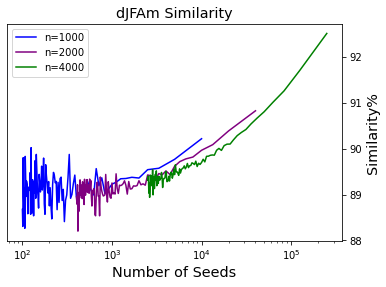

In [96]:
XLEN = np.linspace(100,10000,100)
XVA3_1 = np.array([100.0 for i in range(100)])
XVA3_2 = np.array([99.9 for i in range(100)])
XVA3_3 = np.array([99.99 for i in range(100)])
XVA3_4 = np.array([99.98 for i in range(100)])
figa,axa = plt.subplots(1,1,figsize=(6,4), tight_layout=False)

#axa.plot(Ss[0],V2ER1K,'k:',label='n=1000 Eu',color='blue')
#axa.plot(Ss[1],V2ER2K,label='n=2000 Eu',color='purple')
#axa.plot(Ss[2],V2ER4K,label='n=4000 Eu',color='green')
axa.plot(Ss[0],MH1K,label='n=1000',color='blue')
axa.plot(Ss[1],MH2K,label='n=2000',color='purple')
axa.plot(Ss[2],MH4K,label='n=4000',color='green')
#axa.plot(XLEN,XVA3_1,'k:',color='black')
#axa.plot(XLEN,XVA3_2,'k:',color='black')
#axa.plot(XLEN,XVA3_3,'k:',color='black')
#axa.plot(XLEN,XVA3_4,'k:',color='black')

axa.set_title("dJFAm Similarity", size="x-large")
axa.legend()
axa.set_ylabel("Similarity%", size="x-large")
axa.set_xlabel("Number of Seeds", size="x-large")
axa.set_xscale('log')
axa.yaxis.tick_right()
axa.yaxis.set_label_position("right")
#plt.xlim(max(XLEN), min(XLEN))
plt.savefig("sim_graph_2_pdf.pdf", format="pdf", bbox_inches="tight")

In [21]:
#PATAGON SPEEDUP
P_1000=np.array([2.0797876666666664, 2.078948, 1.659104888888889, 1.6482454444444445, 1.642069, 1.6466887777777774, 1.641717111111111, 1.6384056666666664, 1.6449363333333333, 1.364021, 1.386299333333333, 1.3766446666666665, 1.3757033333333335, 1.373888, 1.3792314444444442, 1.3793177777777776, 1.3791261111111113, 1.3783804444444445, 1.3791385555555555, 1.3867606666666665, 1.383419777777778, 1.3894326666666668, 1.3863471111111112, 1.3817747777777778, 1.3899076666666668, 1.3902924444444447, 1.3924585555555558, 1.3927195555555554, 1.3927131111111113, 1.3951766666666665, 1.3929684444444446, 1.39858, 1.3974923333333333, 1.399016888888889, 1.397366222222222, 1.403664, 1.4006163333333335, 1.4018363333333335, 1.3944315555555555, 1.1888122222222224, 1.1937087777777777, 1.1940265555555556, 1.2194348888888886, 1.1932473333333333, 1.1933895555555556, 1.1912977777777778, 1.189377111111111, 1.1930073333333333, 1.1908605555555556, 1.194987111111111, 1.189151777777778, 1.1941001111111111, 1.1969231111111114, 1.194341222222222, 1.1962645555555556, 1.1993853333333333, 1.1977642222222222, 1.1992498888888887, 1.1955342222222223, 1.1986845555555556, 1.1982943333333331, 1.1980727777777778, 1.1966175555555556, 1.1984736666666667, 1.198659888888889, 1.1961492222222225, 1.203188333333333, 1.196939888888889, 1.2011594444444444, 1.1943941111111112, 1.2008662222222222, 1.2008413333333332, 1.2035306666666667, 1.2001827777777778, 1.1971766666666666, 1.1992182222222223, 1.1994746666666665, 1.1982725555555556, 1.198228111111111, 1.1999401111111112, 1.1974418888888887, 1.2010232222222224, 1.1765297777777777, 1.2024363333333332, 1.2007455555555555, 1.2038171111111113, 1.200089888888889, 1.2079363333333335, 1.2048767777777778, 1.2060085555555555, 1.1991535555555555, 1.2027757777777777, 1.2047919999999999, 1.1997301111111112, 1.2010464444444444, 1.1989305555555556, 1.2059537777777778, 1.212397777777778, 1.2058201111111113, 1.1865532222222224])
P_2000=np.array([2.3389076666666666, 2.2285055555555555, 1.777890444444444, 1.763723, 1.758405888888889, 1.7552949999999998, 1.749532, 1.7476829999999997, 1.7514536666666667, 1.7551530000000004, 1.4699447777777774, 1.4623588888888888, 1.4730054444444443, 1.4650935555555558, 1.4813394444444445, 1.4875641111111113, 1.4938934444444445, 1.4990478888888887, 1.5026372222222222, 1.507980111111111, 1.5147110000000004, 1.5202384444444443, 1.5253114444444442, 1.5306516666666665, 1.5354407777777779, 1.5390461111111113, 1.544603, 1.5482412222222222, 1.554295888888889, 1.5563237777777779, 1.5613583333333334, 1.5645314444444445, 1.568353, 1.5701929999999997, 1.5710085555555553, 1.576803, 1.5794235555555556, 1.5842214444444445, 1.5710899999999999, 1.5906764444444446, 1.3357501111111112, 1.3385054444444444, 1.3327011111111113, 1.3432835555555553, 1.3445033333333334, 1.3464788888888888, 1.3518854444444444, 1.3528185555555556, 1.3522248888888888, 1.355249222222222, 1.3560333333333334, 1.3565507777777779, 1.3581673333333333, 1.3744993333333335, 1.3612580000000003, 1.363037111111111, 1.358139777777778, 1.3669222222222221, 1.3695821111111113, 1.3716152222222222, 1.3704267777777774, 1.372051111111111, 1.3746744444444443, 1.3768663333333333, 1.3832142222222221, 1.3859463333333335, 1.3807244444444444, 1.3727461111111112, 1.392606, 1.3870987777777777, 1.3870463333333332, 1.389804222222222, 1.389965222222222, 1.392321, 1.3961623333333335, 1.3924736666666666, 1.395555, 1.3963406666666667, 1.4045932222222222, 1.3995360000000001, 1.402347777777778, 1.403065666666667, 1.4035600000000001, 1.3941264444444446, 1.405740222222222, 1.4080246666666667, 1.4081442222222222, 1.410456222222222, 1.4086828888888887, 1.4148450000000001, 1.4130212222222223, 1.4137906666666669, 1.4145903333333334, 1.4142376666666665, 1.4182385555555554, 1.4197827777777778, 1.4184215555555555, 1.4202387777777778, 1.4224007777777776, 1.4231063333333334])
P_5000=np.array([3.6488296666666664, 3.364395777777778, 2.570558666666667, 2.464397, 2.405245, 2.347053222222222, 2.3086894444444446, 2.2753116666666666, 2.263392888888889, 2.253607111111111, 1.8566203333333335, 1.851605888888889, 1.8561471111111112, 1.8575529999999998, 1.8526038888888887, 1.8567623333333334, 1.8600926666666666, 1.8617163333333329, 1.8636822222222225, 1.8647333333333331, 1.8666407777777776, 1.8716231111111117, 1.8708924444444444, 1.8760950000000003, 1.8781424444444446, 1.8794334444444445, 1.885147111111111, 1.8869470000000002, 1.8877312222222224, 1.8914039999999999, 1.892743111111111, 1.8970277777777775, 1.8995100000000003, 1.9006995555555557, 1.9051587777777779, 1.9062401111111111, 1.9109791111111112, 1.9153694444444445, 1.9160474444444446, 1.9183102222222221, 1.6091832222222222, 1.6090126666666666, 1.6095366666666664, 1.611426, 1.613446777777778, 1.6179897777777779, 1.618247, 1.6197342222222224, 1.6219532222222222, 1.6221466666666666, 1.6246068888888887, 1.6252970000000002, 1.6285696666666665, 1.6304322222222227, 1.6301793333333334, 1.6302805555555555, 1.6321997777777777, 1.6360572222222223, 1.6346684444444444, 1.6386118888888888, 1.6409506666666667, 1.6404693333333331, 1.6424656666666668, 1.6451014444444443, 1.6454766666666667, 1.648083888888889, 1.6494097777777776, 1.6504151111111112, 1.647327777777778, 1.654221888888889, 1.6528831111111113, 1.6531841111111112, 1.6583896666666667, 1.6569088888888888, 1.6604144444444444, 1.6605300000000003, 1.6610333333333334, 1.6646552222222222, 1.6627730000000003, 1.6637275555555557, 1.6682094444444446, 1.6667594444444445, 1.6670285555555557, 1.673478, 1.6692324444444442, 1.6721234444444442, 1.6708485555555557, 1.675283888888889, 1.6712960000000001, 1.6733185555555556, 1.6780996666666665, 1.6781083333333333, 1.6772653333333334, 1.675920888888889, 1.6801887777777778, 1.6830814444444444, 1.685315777777778, 1.6838287777777778, 1.6863116666666667, 1.6877665555555557])
P_10000=np.array([4.307056111111111, 4.110313222222222, 3.2065121111111115, 3.1376126666666666, 3.062747222222222, 2.991670666666667, 2.9685625555555557, 2.9318502222222222, 2.9170644444444442, 2.7255283333333336, 2.3317027777777777, 2.324731888888889, 2.307427111111111, 2.292131222222222, 2.283942111111111, 2.275415333333333, 2.2695467777777774, 2.2616942222222223, 2.2551318888888887, 2.243473555555555, 2.2362149999999996, 2.2270424444444443, 2.219574, 2.204114111111111, 2.1968521111111112, 2.1938454444444444, 2.188769111111111, 2.187300222222222, 2.1809764444444446, 2.177997222222222, 2.172394777777778, 2.174086777777778, 2.175752888888889, 2.1781236666666666, 2.178986, 2.1795856666666666, 2.1806204444444446, 2.1832267777777776, 2.1837982222222223, 2.184769333333333, 1.824680888888889, 1.8249686666666665, 1.8265779999999998, 1.827238111111111, 1.8288416666666667, 1.8306132222222224, 1.8311222222222223, 1.832283111111111, 1.833370111111111, 1.8356315555555558, 1.8366328888888885, 1.8371286666666664, 1.8394858888888885, 1.842005888888889, 1.8420491111111115, 1.8439652222222225, 1.8423932222222221, 1.8462995555555557, 1.8471854444444444, 1.848124888888889, 1.8507418888888887, 1.851740666666667, 1.8540253333333334, 1.8532193333333333, 1.855505111111111, 1.8569796666666665, 1.8595300000000003, 1.859903888888889, 1.8602826666666665, 1.8629834444444446, 1.862485333333333, 1.8669949999999997, 1.8677558888888892, 1.867324888888889, 1.8701456666666667, 1.871111, 1.8703503333333333, 1.8708883333333333, 1.8760721111111114, 1.8750442222222223, 1.876288777777778, 1.8792587777777774, 1.8792984444444443, 1.880722111111111, 1.8805196666666666, 1.8843720000000002, 1.8841465555555557, 1.8853746666666669, 1.8840693333333332, 1.8860657777777778, 1.888995555555555, 1.8897426666666668, 1.8922225555555556, 1.8918867777777777, 1.8949698888888886, 1.8954880000000003, 1.8959628888888886, 1.8981018888888892, 1.895778888888889, 1.8998567777777775])
P_20000=np.array([4.671080222222223, 4.497076333333333, 3.550240333333333, 3.490586888888889, 3.437504, 3.391875222222222, 3.3655204444444444, 3.3307226666666665, 3.3313282222222225, 3.3010243333333333, 2.6989686666666666, 2.6809634444444446, 2.6810137777777783, 2.6754395555555557, 2.644472222222222, 2.651241, 2.6331906666666662, 2.6335274444444443, 2.643416888888889, 2.6056414444444442, 2.6042934444444445, 2.618943333333333, 2.596817333333333, 2.563394333333333, 2.5587652222222226, 2.5666086666666668, 2.5764197777777778, 2.566173555555556, 2.5573314444444444, 2.552959111111111, 2.551602, 2.552542111111111, 2.5564634444444447, 2.5626516666666666, 2.566663444444444, 2.5486048888888884, 2.530910888888889, 2.5217133333333335, 2.512545, 2.508216666666667, 2.0728637777777776, 2.0722067777777777, 2.0715707777777776, 2.072481444444444, 2.0729746666666666, 2.0733642222222226, 2.0731071111111112, 2.073169222222222, 2.0727861111111108, 2.0718452222222217, 2.0698177777777778, 2.069220333333333, 2.0687183333333334, 2.067735666666666, 2.0682097777777777, 2.0685203333333333, 2.0683263333333333, 2.0682148888888885, 2.0685932222222223, 2.0677872222222224, 2.068470888888889, 2.0673887777777775, 2.0681868888888886, 2.0684671111111115, 2.068589111111111, 2.0683847777777777, 2.0684273333333336, 2.0678745555555555, 2.0678812222222223, 2.0667867777777778, 2.0671226666666667, 2.067753777777778, 2.067595666666667, 2.0682487777777774, 2.0679541111111113, 2.066898111111111, 2.066139444444444, 2.0658508888888893, 2.0646976666666665, 2.0629658888888884, 2.0615593333333333, 2.060831666666667, 2.0607398888888886, 2.060118777777778, 2.0603827777777775, 2.0598806666666665, 2.060563222222222, 2.059791111111111, 2.059609, 2.0589161111111114, 2.0590547777777775, 2.0583357777777773, 2.057715222222223, 2.0566516666666663, 2.0556796666666663, 2.054180555555556, 2.0525685555555557, 2.0517214444444445, 2.0518585555555555, 2.0524501111111118])

(10000.0, 100.0)

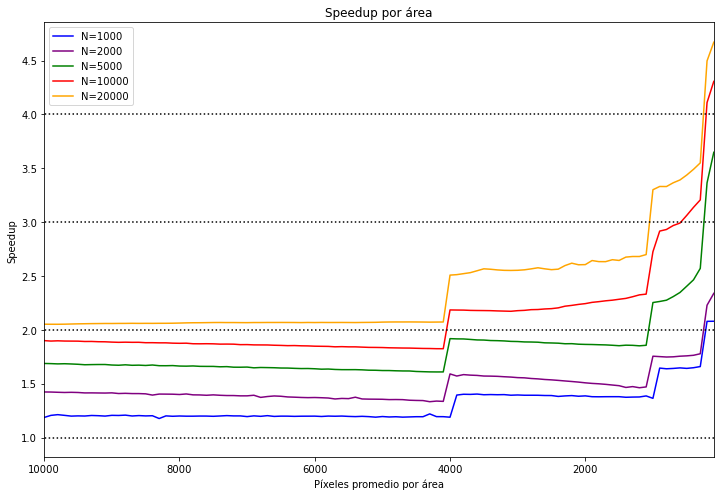

In [22]:
XLEN = np.linspace(100,10000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([2.0 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
XV3_4 = np.array([4.0 for i in range(100)])
figp,axp = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
axp.plot(XLEN,P_1000,label='N=1000',color='blue')
axp.plot(XLEN,P_2000,label='N=2000',color='purple')
axp.plot(XLEN,P_5000,label='N=5000',color='green')
axp.plot(XLEN,P_10000,label='N=10000',color='red')
axp.plot(XLEN,P_20000,label='N=20000',color='orange')
axp.plot(XLEN,XV3_1,'k:',color='black')
axp.plot(XLEN,XV3_2,'k:',color='black')
axp.plot(XLEN,XV3_3,'k:',color='black')
axp.plot(XLEN,XV3_4,'k:',color='black')

axp.set_title("Speedup por área")
axp.legend()
axp.set_ylabel("Speedup")
axp.set_xlabel("Píxeles promedio por área")

plt.xlim(max(XLEN), min(XLEN))

In [3]:
#2nd patagon test
#1000
T1_1K = np.array([0.05380744444444445, 0.05000666666666667, 0.04893722222222222, 0.04832733333333334, 0.047717333333333334, 0.04819322222222222, 0.046837333333333335, 0.046379666666666666, 0.04605655555555556, 0.04577866666666666, 0.04554311111111111, 0.04790844444444444, 0.04509266666666667, 0.04486966666666667, 0.04480011111111112, 0.044484666666666665, 0.044319888888888895, 0.044200111111111114, 0.04799433333333333, 0.043789888888888885, 0.04359244444444444, 0.04346922222222222, 0.04619688888888889, 0.04406511111111111, 0.044271, 0.04287088888888888, 0.042912555555555544, 0.04268933333333333, 0.04374344444444444, 0.045308888888888885, 0.04476066666666667, 0.043798444444444445, 0.04353133333333333, 0.04633288888888889, 0.045009, 0.044090222222222225, 0.04418488888888889, 0.04337155555555556, 0.04334622222222222, 0.043532999999999995, 0.04124844444444445, 0.04108166666666666, 0.04103277777777777, 0.04208722222222222, 0.04084711111111112, 0.042221555555555554, 0.041800555555555556, 0.04225344444444445, 0.04231733333333334, 0.042933, 0.04325166666666667, 0.042055555555555554, 0.04294444444444444, 0.04156233333333334, 0.04242777777777777, 0.04269722222222222, 0.043362, 0.04345777777777778, 0.04439122222222222, 0.042279222222222225, 0.042091, 0.041252111111111114, 0.043298222222222224, 0.04197422222222222, 0.04127877777777777, 0.04223255555555556, 0.042320111111111114, 0.04164911111111111, 0.04213555555555556, 0.04386933333333334, 0.04162933333333334, 0.041205222222222226, 0.042512777777777774, 0.04291433333333333, 0.04183744444444445, 0.04119144444444445, 0.04172744444444445, 0.042147, 0.04186622222222222, 0.041875444444444444, 0.042298, 0.041895, 0.04119855555555555, 0.04171766666666667, 0.041204888888888895, 0.04368422222222222, 0.04249811111111112, 0.04182755555555555, 0.04209844444444444, 0.04212566666666666, 0.04233944444444444, 0.044200333333333335, 0.043608444444444445, 0.04221144444444444, 0.043013, 0.04271133333333334, 0.041176000000000004, 0.04261, 0.041278, 0.04162466666666667])
T2_1K = np.array([0.025447555555555557, 0.024104, 0.029472333333333336, 0.02922077777777778, 0.028951888888888888, 0.029172999999999998, 0.028428555555555554, 0.028214111111111113, 0.028068333333333337, 0.027831777777777775, 0.03317844444444444, 0.03364088888888889, 0.03276944444444444, 0.03257455555555556, 0.032417111111111105, 0.03226766666666667, 0.03203388888888889, 0.03186566666666667, 0.03410900000000001, 0.03165088888888889, 0.031558222222222224, 0.03134333333333334, 0.03333911111111112, 0.03184911111111111, 0.03187611111111111, 0.03098011111111111, 0.03076411111111111, 0.030735222222222223, 0.03142966666666666, 0.032440444444444445, 0.032045777777777784, 0.03138488888888889, 0.03122388888888889, 0.03301811111111111, 0.03233355555555555, 0.03161266666666667, 0.031712444444444446, 0.031052444444444445, 0.031494777777777774, 0.036609222222222224, 0.034618333333333334, 0.03458744444444445, 0.03437222222222222, 0.03541688888888889, 0.034245333333333336, 0.035497777777777774, 0.035105111111111115, 0.03548788888888889, 0.03625711111111111, 0.03599644444444444, 0.03630744444444445, 0.03519766666666667, 0.035980444444444454, 0.034883, 0.035535222222222225, 0.03588477777777777, 0.036299111111111115, 0.03648811111111112, 0.03715533333333333, 0.03532255555555555, 0.03525344444444444, 0.034492999999999996, 0.03613911111111111, 0.03496533333333333, 0.034591111111111114, 0.03528277777777778, 0.03537211111111111, 0.03487444444444445, 0.035228444444444444, 0.035866, 0.03482199999999999, 0.03435233333333334, 0.03549111111111111, 0.035904, 0.035003000000000006, 0.034439777777777784, 0.034869333333333336, 0.03510588888888889, 0.03500422222222222, 0.03486155555555556, 0.03526055555555556, 0.034919777777777786, 0.03427277777777778, 0.034740888888888884, 0.034472222222222224, 0.03614733333333334, 0.03537655555555556, 0.03480988888888889, 0.035007444444444445, 0.03518866666666667, 0.03520222222222222, 0.036817777777777776, 0.036777, 0.03524911111111111, 0.03596533333333333, 0.03563444444444444, 0.034050444444444446, 0.03522355555555556, 0.03430555555555556, 0.03440755555555555])
SP_1K = T1_1K/T2_1K
#2000
T1_2K = np.array([0.18800133333333335, 0.17183422222222222, 0.17282466666666668, 0.16494822222222225, 0.1625931111111111, 0.16696311111111115, 0.1591348888888889, 0.15767922222222222, 0.15947011111111112, 0.15615055555555557, 0.1545577777777778, 0.15896066666666667, 0.1532247777777778, 0.152657, 0.15205988888888888, 0.1515091111111111, 0.15104355555555557, 0.15066077777777778, 0.15028044444444444, 0.14992777777777777, 0.14962755555555557, 0.14937355555555554, 0.14904422222222224, 0.14858833333333335, 0.14834655555555556, 0.14797722222222223, 0.1477446666666667, 0.14729644444444442, 0.14697766666666665, 0.1467547777777778, 0.14651000000000003, 0.14621044444444442, 0.14587233333333333, 0.1455653333333333, 0.14526099999999997, 0.14494122222222225, 0.14697, 0.14444200000000001, 0.14419888888888888, 0.14589155555555558, 0.14379444444444445, 0.143596, 0.14725988888888886, 0.14322533333333334, 0.14298888888888892, 0.14846166666666666, 0.14252366666666663, 0.14230700000000002, 0.1420902222222222, 0.1419587777777778, 0.14214133333333334, 0.14144511111111113, 0.14137711111111112, 0.14110011111111112, 0.14370588888888886, 0.14062577777777777, 0.14041333333333333, 0.14022277777777778, 0.1403931111111111, 0.13998233333333332, 0.13991677777777778, 0.1397407777777778, 0.13941433333333333, 0.13937955555555556, 0.13915344444444444, 0.1389612222222222, 0.13887655555555556, 0.13868233333333332, 0.1384948888888889, 0.13844388888888892, 0.14032977777777778, 0.13812344444444444, 0.13816222222222224, 0.1378961111111111, 0.13776833333333338, 0.1382368888888889, 0.13748766666666667, 0.13739022222222222, 0.13727355555555557, 0.1371957777777778, 0.13703255555555557, 0.13686555555555557, 0.13681055555555555, 0.1367158888888889, 0.13650255555555557, 0.13637866666666668, 0.13629566666666668, 0.1393651111111111, 0.13607833333333333, 0.13593844444444445, 0.13590555555555558, 0.13569955555555555, 0.13554555555555556, 0.13788233333333333, 0.135373, 0.13528155555555557, 0.1351081111111111, 0.13513211111111112, 0.13501866666666668, 0.13488422222222224])
T2_2K = np.array([0.07929466666666667, 0.07743855555555555, 0.09540122222222222, 0.09380266666666665, 0.09268333333333334, 0.0954141111111111, 0.09095611111111111, 0.09014244444444446, 0.08970155555555555, 0.08853899999999999, 0.10555955555555557, 0.1059598888888889, 0.10402866666666667, 0.10325744444444444, 0.10249822222222223, 0.10183866666666665, 0.10115833333333332, 0.10060988888888889, 0.10001977777777778, 0.09927077777777778, 0.09878688888888888, 0.09831344444444447, 0.09776388888888889, 0.09710255555555555, 0.09666233333333335, 0.09606799999999999, 0.09564955555555556, 0.09521111111111111, 0.09467922222222222, 0.09432955555555554, 0.09385522222222221, 0.09336888888888889, 0.09303277777777778, 0.09278666666666666, 0.0923351111111111, 0.09188966666666666, 0.093453, 0.09117355555555556, 0.09089066666666665, 0.09150288888888888, 0.10767477777777777, 0.10733211111111111, 0.10856366666666667, 0.10661355555555557, 0.10642955555555554, 0.11045977777777777, 0.10582866666666667, 0.105444, 0.10514033333333334, 0.10485955555555557, 0.10467188888888888, 0.10430311111111111, 0.10397777777777778, 0.10364588888888887, 0.10466377777777777, 0.10306911111111111, 0.10277622222222223, 0.10261366666666667, 0.10246066666666667, 0.10214255555555556, 0.10199966666666666, 0.10157999999999999, 0.10130044444444443, 0.10123577777777777, 0.10107055555555557, 0.10077566666666665, 0.10053222222222222, 0.100437, 0.10013211111111113, 0.09990911111111113, 0.1011488888888889, 0.09957144444444445, 0.0992738888888889, 0.09909055555555554, 0.09893511111111111, 0.09861266666666667, 0.09840488888888889, 0.09844088888888888, 0.09839177777777777, 0.09804366666666668, 0.09882111111111111, 0.09747544444444445, 0.09738455555555554, 0.09716200000000001, 0.09707099999999998, 0.09704411111111112, 0.09670211111111111, 0.09767255555555557, 0.09651633333333336, 0.09620555555555556, 0.09607033333333333, 0.09613844444444444, 0.09586288888888889, 0.09730188888888888, 0.09555577777777778, 0.09544555555555555, 0.09522122222222222, 0.09507, 0.0951728888888889, 0.09479033333333334])
SP_2K = T1_2K/T2_2K
#5000
T1_5K = np.array([1.7976062222222222, 1.6066034444444446, 1.4908500000000002, 1.420504777777778, 1.3724358888888888, 1.3236852222222222, 1.2893222222222223, 1.261964111111111, 1.2443084444444446, 1.2291034444444442, 1.2201634444444445, 1.2065475555555554, 1.1955748888888889, 1.1871741111111112, 1.182302888888889, 1.176957111111111, 1.1743519999999998, 1.1657574444444445, 1.1607910000000001, 1.1572655555555555, 1.1536384444444443, 1.1480115555555557, 1.147344888888889, 1.142879888888889, 1.1371766666666667, 1.130282777777778, 1.130179111111111, 1.1271926666666667, 1.1225833333333335, 1.1159526666666666, 1.115655888888889, 1.1135734444444445, 1.1151460000000002, 1.114263888888889, 1.1055008888888889, 1.1026385555555556, 1.1019662222222222, 1.0980555555555556, 1.099389888888889, 1.0953653333333333, 1.0914612222222222, 1.0929126666666666, 1.0891537777777778, 1.0963188888888888, 1.086187888888889, 1.0871718888888888, 1.0821901111111112, 1.0808757777777778, 1.0740285555555555, 1.0799088888888888, 1.0749104444444444, 1.0715844444444445, 1.0737908888888887, 1.0701675555555556, 1.0712844444444445, 1.071263111111111, 1.0728874444444445, 1.0626885555555556, 1.0655563333333335, 1.064958222222222, 1.0638162222222223, 1.0608996666666666, 1.058714, 1.061768888888889, 1.0590961111111112, 1.0583183333333332, 1.0566691111111113, 1.054040888888889, 1.0537214444444443, 1.0522198888888887, 1.0534308888888888, 1.0515837777777777, 1.048285222222222, 1.0533817777777779, 1.0507884444444444, 1.0448211111111112, 1.0450045555555556, 1.0506845555555555, 1.0427345555555556, 1.0454554444444446, 1.039793777777778, 1.0390724444444444, 1.0430207777777778, 1.0385104444444446, 1.0427292222222222, 1.0387201111111113, 1.0356771111111112, 1.0348205555555556, 1.0347254444444443, 1.0339974444444442, 1.0344387777777777, 1.0304904444444443, 1.0347382222222221, 1.0307191111111111, 1.0303254444444445, 1.0288607777777776, 1.0286765555555555, 1.0312323333333333, 1.0252059999999998, 1.0245744444444442])
T2_5K = np.array([0.4925517777777778, 0.4776775555555555, 0.5801815555555555, 0.5754793333333333, 0.5702564444444445, 0.5639358888888888, 0.5592868888888889, 0.5548524444444444, 0.5501472222222222, 0.5452035555555556, 0.6569392222222221, 0.6505494444444444, 0.6451495555555558, 0.6400046666666667, 0.6373792222222223, 0.6343865555555556, 0.6310172222222222, 0.6264516666666666, 0.6244402222222223, 0.6212914444444445, 0.6177360000000001, 0.6139284444444445, 0.6115764444444445, 0.6094872222222223, 0.6055030000000001, 0.6007337777777777, 0.5991853333333333, 0.5987828888888889, 0.5946816666666668, 0.5899428888888889, 0.5889393333333334, 0.5868244444444444, 0.5872269999999999, 0.5846592222222222, 0.5804873333333334, 0.5776950000000001, 0.5764552222222223, 0.573605111111111, 0.5733732222222223, 0.5702149999999999, 0.6790832222222223, 0.679319, 0.6756005555555555, 0.6807061111111111, 0.6718726666666668, 0.6737927777777779, 0.6692906666666667, 0.667806, 0.6621312222222222, 0.6648512222222221, 0.6630492222222223, 0.6589401111111112, 0.6608046666666667, 0.6571491111111112, 0.6568893333333333, 0.6559395555555555, 0.6581303333333333, 0.6491271111111111, 0.6507564444444444, 0.65117, 0.6493404444444444, 0.6468854444444444, 0.6447188888888888, 0.6462994444444444, 0.6437945555555555, 0.6431574444444443, 0.6418625555555555, 0.6393843333333333, 0.6383601111111111, 0.6377984444444444, 0.6369526666666667, 0.6349904444444444, 0.6334713333333333, 0.6347165555555557, 0.6332137777777778, 0.6291735555555555, 0.6294393333333332, 0.6336672222222223, 0.6272644444444445, 0.6292642222222222, 0.6240445555555555, 0.622438888888889, 0.6252900000000001, 0.6223643333333334, 0.6238648888888889, 0.6215170000000001, 0.6193953333333333, 0.6177421111111111, 0.6172676666666667, 0.6176527777777777, 0.6166471111111111, 0.6135158888888887, 0.6163813333333333, 0.6127923333333334, 0.6124046666666667, 0.6119124444444445, 0.6112564444444444, 0.6122406666666665, 0.6076176666666666, 0.6063037777777778])
SP_5K = T1_5K/T2_5K
#10000
T1_10K = np.array([8.433026222222221, 7.726401777777777, 7.322271111111111, 7.071467444444446, 6.830516666666666, 6.597824222222222, 6.484433777777777, 6.33877211111111, 6.248314111111111, 6.054389111111111, 5.960139666666667, 5.904633, 5.821658111111112, 5.744124777777778, 5.689586777777778, 5.637113444444444, 5.580296, 5.526903888888889, 5.482555777777778, 5.422896666666668, 5.37896788888889, 5.329433444444444, 5.285093777777778, 5.226770777777778, 5.179350333333334, 5.152784888888888, 5.126603666666666, 5.086313555555555, 5.057417555555556, 5.028662333333334, 4.990053333333333, 4.984346666666666, 4.9639244444444435, 4.944409, 4.933793777777778, 4.91905511111111, 4.908838555555556, 4.881377888888888, 4.879753888888889, 4.867986777777778, 4.838586, 4.8408737777777775, 4.823156888888889, 4.822513555555556, 4.812736222222222, 4.806920555555554, 4.7871052222222215, 4.784194666666667, 4.780809444444445, 4.761331555555555, 4.758575444444445, 4.751671111111111, 4.737381444444444, 4.731532, 4.725790666666667, 4.710842555555556, 4.707133555555555, 4.716279000000001, 4.692414555555555, 4.693647555555556, 4.6870034444444455, 4.686060222222221, 4.667356555555555, 4.664385888888889, 4.6676794444444445, 4.664094333333335, 4.655061555555555, 4.642669222222223, 4.645199000000001, 4.635487444444444, 4.63205011111111, 4.634176555555555, 4.619048444444445, 4.619776333333333, 4.6107700000000005, 4.603261666666667, 4.606981888888888, 4.598940777777778, 4.591855333333332, 4.591805, 4.5821262222222225, 4.582712444444444, 4.578909222222222, 4.576338000000001, 4.569308777777778, 4.562443222222223, 4.555803777777778, 4.55736688888889, 4.552635222222222, 4.548143444444444, 4.550634777777778, 4.544860555555555, 4.534924, 4.540267444444445, 4.528690444444444, 4.523072333333333, 4.531389222222223, 4.5197315555555555, 4.516880222222222, 4.5115196666666675])
T2_10K = np.array([1.957048111111111, 1.8831542222222224, 2.2849722222222217, 2.2523835555555554, 2.2301777777777776, 2.2061244444444443, 2.1847375555555555, 2.1607891111111113, 2.1407078888888886, 2.124692666666667, 2.555564666666667, 2.5399016666666667, 2.522319, 2.5042525555555555, 2.4908448888888888, 2.475547333333333, 2.458464888888889, 2.445251111111111, 2.432770777777778, 2.417543777777778, 2.4073817777777777, 2.3915402222222224, 2.3821746666666668, 2.370365888888889, 2.355898444444444, 2.348421111111111, 2.340048888888889, 2.326362333333334, 2.317428555555556, 2.3113647777777775, 2.295378, 2.2912157777777775, 2.280485777777778, 2.2706294444444444, 2.2646466666666667, 2.2561813333333327, 2.250037888888889, 2.2359878888888884, 2.2358516666666666, 2.2280884444444444, 2.653539666666666, 2.6525386666666666, 2.6393590000000007, 2.639392111111111, 2.631245222222222, 2.627772222222222, 2.6142248888888897, 2.6115707777777777, 2.606112888888889, 2.594549888888889, 2.590049222222222, 2.586093111111111, 2.576432777777778, 2.5691348888888887, 2.5669875555555555, 2.5566016666666664, 2.5515403333333335, 2.555723777777778, 2.5390296666666665, 2.539308888888889, 2.5355018888888887, 2.5305357777777777, 2.5210404444444445, 2.515080555555555, 2.5144325555555556, 2.5092755555555555, 2.5049901111111113, 2.497503222222223, 2.4957746666666663, 2.4884133333333334, 2.482766777777778, 2.4831505555555555, 2.4741675555555553, 2.472809111111111, 2.467054222222222, 2.4591786666666664, 2.4605024444444448, 2.456430555555555, 2.449509888888889, 2.447408222222222, 2.4424765555555554, 2.440459222222222, 2.435798111111111, 2.4323243333333333, 2.427519444444444, 2.423271777777778, 2.4184503333333334, 2.417178888888889, 2.4135854444444442, 2.4084404444444445, 2.4073604444444445, 2.4056652222222223, 2.3990532222222223, 2.400363222222222, 2.3926896666666666, 2.386826, 2.3881987777777782, 2.3819987777777776, 2.3796001111111114, 2.372996888888889])
SP_10K = T1_10K/T2_10K
#20000
T1_20K = np.array([36.59845644444444, 33.801505666666664, 32.383369333333334, 31.419697000000003, 30.567831666666663, 29.862636111111108, 29.340352333333335, 28.76936388888889, 28.487782222222222, 27.972404999999995, 27.59019, 27.207191888888886, 27.006187666666666, 26.767003, 26.285941222222224, 26.202747888888894, 25.868336222222222, 25.712335333333332, 25.657568555555557, 25.154722777777778, 25.007096555555556, 25.02498055555556, 24.66819511111111, 24.244501222222222, 24.075264888888892, 24.04613088888889, 24.036619555555554, 23.82478511111111, 23.64061077777778, 23.489489555555558, 23.38256077777778, 23.307129888888888, 23.249669, 23.205995111111108, 23.161056555555554, 22.913997666666667, 22.66607733333333, 22.514968666666668, 22.359723333333335, 22.23830677777778, 22.150076555555557, 22.075598333333332, 22.014669555555557, 21.958076555555557, 21.903751222222226, 21.847751555555558, 21.79636155555556, 21.73526333333334, 21.68165911111111, 21.621217222222224, 21.53853255555556, 21.486854555555553, 21.431374444444444, 21.379112000000003, 21.331140333333334, 21.284382888888885, 21.236558777777773, 21.19367288888889, 21.146841555555554, 21.099341888888894, 21.04860022222222, 21.011214222222222, 20.968672333333334, 20.929165333333334, 20.89277577777778, 20.852121999999998, 20.80586177777778, 20.768615111111114, 20.726960333333334, 20.68084511111111, 20.64418611111111, 20.61006533333333, 20.57495511111111, 20.540721, 20.502239444444445, 20.459537444444443, 20.424868555555552, 20.382467444444444, 20.33773044444444, 20.29574977777778, 20.24423711111111, 20.199550444444444, 20.167677111111114, 20.137428777777775, 20.102201666666666, 20.074228555555553, 20.04414988888889, 20.01199188888889, 19.98146477777778, 19.94688177777778, 19.91436777777778, 19.880697444444444, 19.84860477777778, 19.80835877777778, 19.77055277777778, 19.730232888888892, 19.692823, 19.656884111111108, 19.631552777777774, 19.612238222222224])
T2_20K = np.array([7.838857, 7.513852444444443, 9.131207555555555, 9.001286666666665, 8.896669, 8.809451000000001, 8.720720333333333, 8.628912000000001, 8.552394333333332, 8.469386555555555, 10.220997, 10.150553888888888, 10.080362555555556, 10.006989777777777, 9.941846666666668, 9.884771333333333, 9.825180111111111, 9.760149333333334, 9.705121333333333, 9.655033111111113, 9.598408777777777, 9.551929888888887, 9.499272999999999, 9.45666388888889, 9.406892666666666, 9.365471666666668, 9.324790333333333, 9.27901788888889, 9.242903333333333, 9.200095111111112, 9.16500822222222, 9.129629888888887, 9.093089555555558, 9.055737777777779, 9.02156688888889, 8.98865111111111, 8.956395333333335, 8.928445333333332, 8.89600188888889, 8.866264444444445, 10.688826666666667, 10.653141444444445, 10.62308, 10.598834666666667, 10.565440111111112, 10.537455888888887, 10.513120222222222, 10.482414666666667, 10.457816888888887, 10.432816555555554, 10.408326222222222, 10.38318411111111, 10.357331222222221, 10.335274777777778, 10.311433888888889, 10.290941555555555, 10.267403333333332, 10.246145333333335, 10.222808222222222, 10.199056666666666, 10.185003, 10.161470555555557, 10.13731288888889, 10.119742111111114, 10.10120133333333, 10.079180888888889, 10.061750777777778, 10.042541, 10.026187222222221, 10.005870444444446, 9.987806888888889, 9.969130222222224, 9.954650111111109, 9.933850777777778, 9.919110222222223, 9.900315666666664, 9.884997333333335, 9.866972666666666, 9.849641, 9.834095333333332, 9.824237333333333, 9.808455777777779, 9.787919222222222, 9.776541222222223, 9.759556333333334, 9.743678333333333, 9.730513888888888, 9.715831555555557, 9.703137666666667, 9.687557888888888, 9.676336000000001, 9.658811555555555, 9.645678222222221, 9.635641333333334, 9.619128222222223, 9.60766711111111, 9.593444666666667, 9.581805, 9.564931444444445, 9.554658666666667])
SP_20K = T1_20K/T2_20K

In [6]:
Ns = [1000,2000,5000,10000,20000]
Ss = [[],[],[],[],[]]
count = 0
for j in Ns:
    for i in range(1,101):
        S = j*j/(i*100)
        Ss[count].append(S)
    #Ss[count] = Ss[count][::-1]
    count+=1

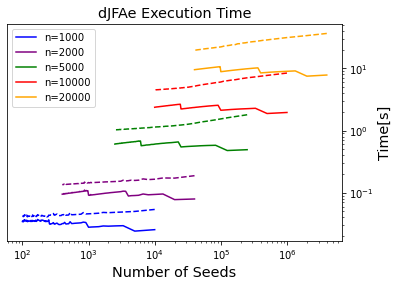

In [72]:
XLEN = np.linspace(100,10000,100)
X_C = np.array([100 for i in range(100)])
figp2,axp2 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp2.plot(Ss[0],T2_1K,label='n=1000',color='blue')
axp2.plot(Ss[1],T2_2K,label='n=2000',color='purple')
axp2.plot(Ss[2],T2_5K,label='n=5000',color='green')
axp2.plot(Ss[3],T2_10K,label='n=10000',color='red')
axp2.plot(Ss[4],T2_20K,label='n=20000',color='orange')
axp2.plot(Ss[0],T1_1K,'--',color='blue')
axp2.plot(Ss[1],T1_2K,'--',color='purple')
axp2.plot(Ss[2],T1_5K,'--',color='green')
axp2.plot(Ss[3],T1_10K,'--',color='red')
axp2.plot(Ss[4],T1_20K,'--',color='orange')
#axp2.plot(XLEN,X_C,'k:',color='black')
axp2.set_xscale('log')
axp2.set_title("dJFAe Execution Time", size="x-large")
axp2.legend()
axp2.set_ylabel("Time[s]", size="x-large")
#axp2.set_xlabel("Average pixels per area", size="x-large")
axp2.set_xlabel("Number of Seeds", size="x-large")
axp2.yaxis.tick_right()
axp2.yaxis.set_label_position("right")



plt.yscale('log')
#plt.xlim(max(XLEN), min(XLEN))
plt.savefig("time_graph_1_pdf.pdf", format="pdf", bbox_inches="tight")

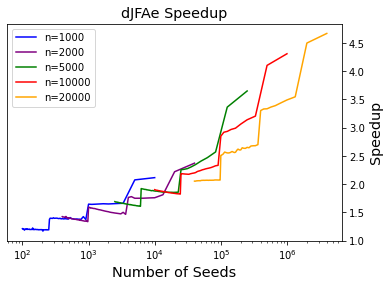

In [73]:
XLEN = np.linspace(100,4000000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([2.0 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
XV3_4 = np.array([4.0 for i in range(100)])
figp3,axp3 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp3.plot(Ss[0],SP_1K,label='n=1000',color='blue')
axp3.plot(Ss[1],SP_2K,label='n=2000',color='purple')
axp3.plot(Ss[2],SP_5K,label='n=5000',color='green')
axp3.plot(Ss[3],SP_10K,label='n=10000',color='red')
axp3.plot(Ss[4],SP_20K,label='n=20000',color='orange')
#axp3.plot(XLEN,XV3_1,'k:',color='black')
#axp3.plot(XLEN,XV3_2,'k:',color='black')
#axp3.plot(XLEN,XV3_3,'k:',color='black')
#axp3.plot(XLEN,XV3_4,'k:',color='black')
axp3.set_xscale('log')
axp3.set_title("dJFAe Speedup", size="x-large")
axp3.legend()
axp3.set_ylabel("Speedup", size="x-large")
axp3.set_xlabel("Number of Seeds", size="x-large")
axp3.yaxis.tick_right()
axp3.yaxis.set_label_position("right")

#plt.xlim(max(XLEN), min(XLEN))

plt.savefig("sp_graph_1_pdf.pdf", format="pdf", bbox_inches="tight")

In [3]:
n_areas = np.array([946,1244,886,1825,553,1831,1221,736,727,671,2167,1053,1194,2306,442,835,690,1113,1087,1168,719,1007,679,834,1463,441,1110,437,1782,543,299,806,1675,616,1282,1153,1283,1098,1421,1089,533,1484,1154,842,1225,2046,2170,761,693,2086,1556,826,746,1660,613,450,248,644,1707,371,1543,1068,924,1027,1327,1151,1572,350,788,234,770,310,1328,1139,920,459,1111,860,2488,685,1772,346,813,620,937,938,1401,450,1387,1255,473,2424,1566,840,1483,1667,758,327,1379,1384,391,707,1300,1325,788,389,1356,781,1239,836,716,674,1496,1858,558,2514,1230,771,625,1203,1071,889,299,437,784,1550,268,1702,1033,1524,989,743,1659,716,710,468,1607,505,280,1617,531,1606,262,1348,2474,738,1279,566,562,565,901,1297,679,555,2274,1649,981,730,576,1118,625,561,701,1887,858,996,187,844,967,1313,332,2603,1150,822,1101,1145,480,934,1543,725,509,1060,1431,1250,2256,939,2355,3064,994,2733,1573,790,1002,140,613,1280,1031,459,796,1436,667,538,1520,345,805,1160,1548,1480,1251,554,297,503,475,967,916,1507,415,1567,810,810,1272,1263,822,437,658,1897,2274,1621,783,520,931,857,390,1339,608,874,588,1853,1384,1557,464,1468,526,1148,288,759,416,602,922,1584,1245,940,930,1083,1069,1219,1140,1489,1122,1380,615,378,1181,733,245,987,1466,447,1423,732,2107,2310,1278,705,3016,1248,2032,536,1401,419,1168,841,1496,660,558,1019,1561,658,1452,667,318,931,579,349,569,220,1186,444,1473,640,880,341,862,1058,1807,591,618,540,1582,876,741,670,5052,1442,1052,2008,317,999,241,1657,602,812,863,1461,765,1057,1103,1213,1284,713,907,1087,1574,1607,357,916,1464,1798,1827,1042,495,882,453,1117,1322,830,1581,1736,1111,1130,1192,259,933,542,1250,1043,1269,310,1103,1866,699,1017,598,921,380,935,931,702,346,732,548,1707,684,1279,1039,526,1652,760,954,992,1273,757,480,1486,1406,577,1486,2002,1122,796,747,865,1313,823,98,1843,222,848,1775,588,909,1007,1344,1714,3007,547,1713,671,1600,1656,1319,372,908,404,1029,757,393,609,1630,688,477,267,399,237,1195,540,1227,1433,946,1123,1843,586,1395,818,676,1101,1019,1145,783,1750,1324,702,517,280,225,1324,729,961,1891,1152,1285,1115,689,946,1035,677,440,505,1224,564,963,1547,711,335,855,374,582,1227,1777,1145,599,1393,1462,493,625,1359,278,891,1557,1011,1241,1672,983,1099,1586,839,1184,363,1020,777,1132,909,808,366,827,497,852,1554,2012,909,2378,1676,608,442,372,1521,1152,586,373,2787,1423,307,662,1285,973,464,938,865,1143,1603,1436,315,353,1212,1575,1483,220,621,2137,1787,1250,985,2142,371,593,1430,1911,1080,809,1042,2262,284,1550,1682,834,1054,2419,1174,632,278,541,1396,738,111,435,335,1103,1073,2161,662,662,549,541,1458,1427,917,560,919,1375,1739,884,1663,1238,930,2779,1256,893,2349,692,879,801,449,701,3111,1081,1076,613,2448,195,1106,2094,297,709,588,1272,138,736,867,1377,607,406,1040,1113,385,1389,990,846,195,681,381,838,2190,1506,1332,1219,563,1017,1068,1011,297,1400,341,1610,568,348,274,381,751,456,1917,790,2434,546,811,1034,772,2037,1811,774,2303,1256,284,406,1553,1240,677,364,896,1325,246,820,763,1466,1074,2379,1396,1187,1916,1787,2234,285,1171,535,290,1186,944,694,1280,1105,546,429,810,903,1275,1648,979,554,898,1299,1522,371,1498,1851,1089,430,605,917,1810,388,1589,638,1098,291,1181,418,210,575,278,586,351,1142,958,1983,241,869,660,1669,845,930,1440,1174,1008,1056,959,1646,781,1202,1817,1024,1474,491,1879,655,264,1386,1081,1161,1088,1038,592,1065,1280,1542,942,826,446,894,611,1230,757,1984,773,1002,1241,952,927,1439,508,296,558,421,1115,1778,906,718,777,1114,883,1166,728,186,906,921,200,1274,415,752,1075,278,1330,1134,551,2115,85,489,771,589,1013,1264,912,321,2065,689,463,941,1648,487,705,757,636,480,967,476,606,1623,1006,259,484,1023,214,1188,742,2346,957,1439,1100,830,576,1378,623,1113,451,931,426,905,747,781,1097,98,298,748,1162,693,1365,1882,176,698,641,454,748,1270,825,746,763,1225,1842,238,561,776,1396,168,432,985,693,526,589,521,661,1125,454,618,1289,1687,1231,764,838,481,724,932,429,819,1089,901,269,1280,1909,1460,1552,1301,859,1023,2153,1525,973,256,893,770,962,847,829,1684,533,820,723,812,1135,2962,1142,413,294,942,703,1016,1224,605,614,369,1155,702,892,1512,1250,2045,1947,785,1253,821,2906,788,587,230,1226,1886,1143,1018,776,2094,1089,825,1724,1561,563,543,670,996,1069,706,495,2020,1593,1235,1687,2355,430,349,253,1022,391,932,1201,878,581,983,2613,439,978,615,1560,998,529,1362,1428,1916,243,896,705,661,2507,990,875,1557,1509,513,662,1273,1480,1056,1887,676,612,1057,598,895,1573,349,148,1563,1514,1508,1372,959,1430,1023,313,1318,585,712,807,1193,1925,1579,1678,921,340,428,470,1106,973,566,1715,1264,1041,544,747,240,446,490,578,769,475,401,2573,911,777,941,73,296,924,1562,354,1885,790,911,779,1334,874,933,1115,512,741,311,1239,857,680,724,170,790,593,1201,1569,877,1510,604,767,790,828,992,1082,473,1000,1288,281,754,2246,3051,504,285,2620,405,327,426,685,1130,503,639,543,1205,847,922,1499,1129,1798,705,978,342,763,868,1624,931,2152,1187,1441,907,499,730,1309,627,483,1346,1467,617,432,855,1184,1232,879,1301,1459,604,1373,1184,952,403,1821,1530,326,1843,1694,651,572,1688,458,1181,258,1206,880,864,499,503,579,1053,1230,879,1389,1743,966,542,923,1180,732,709,635,830,954,627,994,1608,753,1314,649,1319,565,919,688,624,500,733,315,1376,1149,1707,1251,1319,1282,1512,643,688,1263,665,855,710,756,2097,720,1183,1562,858,560,434,730,952,281,1023,576,746,1123,1715,1122,1017,247,1649,686,1992,946,371,373,129,734,1040,1059,1022,629,1401,948,275,794,877,765,1598,988,764,1412,867,1658,1816,247,154,1897,1567,663,483,1407,950,727,1172,907,357,324,428,1373,522,1559,1322,355,1593,695,589,534,1210,962,985,1412,773,1738,689,707,444,1942,995,1637,412,334,367,921,741,441,677,195,427,1192,729,1769,1128,466,277,600,1022,359,1117,732,523,767,396,1656,1446,874,657,383,1779,334,2070,698,1421,1193,759,833,106,893,1158,806,1506,1332,245,750,854,542,873,582,507,1504,1220,1330,865,827,264,328,797,830,1987,647,1651,478,1033,1622,1525,402,1208,763,229,953,1590,271,1284,1013,781,301,364,935,1030,778,659,2537,531,515,2022,1699,774,752,756,1300,997,1002,1637,526,347,832,640,535,957,1191,438,1348,1105,973,448,1179,1250,2461,440,2140,1787,1228,1536,1309,1129,512,868,532,1143,496,1347,536,666,447,1795,1063,1433,915,1304,460,1156,1314,1833,870,224,1007,1917,242,754,828,409,1557,667,977,920,764,592,1733,938,1626,463,531,556,1532,398,537,1124,1064,220,373,1091,415,344,625,1302,716,503,594,808,1334,1497,772,708,1643,811,1408,1455,1147,1105,495,379,605,594,624,2195,1286,1373,398,1038,1999,682,914,1607,563,536,1333,523,1845,1202,370,866,809,438,678,1226,552,1361,1497,1029,404,544,1776,705,640,972,626,1755,1007,1775,1507,403,874,618,1494,772,1010,410,1051,413,627,1173,1235,1019,834,756,812,477,814,1499,1139,265,897,1056,578,2029,949,1474,1130,1205,2622,1843,2426,629,2172,1875,297,640,563,910,929,1224,654,1554,375,1485,872,1061,634,1533,1523,1383,1233,1432,1076,1052,789,1052,397,1717,1260,1010,1217,394,1003,867,1622,2375,331,744,1866,892,1238,877,799,2877,1095,794,600,421,1264,2057,949,1542,551,314,778,943,1411,1299,2023,1677,1264,746,204,390,660,845,970,798,1084,1725,313,830,1385,664,1850,271,312,746,335,852,926,1403,1348,390,1071,2110,344,440,577,185,528,1548,887,375,1522,2768,389,751,1874,986,1499,882,240,1710,810,545,1121,1795,729,221,1212,854,1425,924,419,1068,728,885,542,2747,611,192,1055,1599,729,479,1251,1434,345,730,453,1000,825,1546,829,357,915,1237,500,1049,245,2424,618,1335,1117,992,1447,1386,536,1890,562,1245,982,425,881,2213,776,1420,1049,703,1255,1396,1783,395,774,826,725,1430,825,931,612,550,902,275,1464,914,526,1103,1093,1952,1509,822,735,1500,673,291,647,1378,1532,2343,886,891,864,803,488,802,1479,1260,846,593,810,432,1361,1089,1014,780,1510,2966,1066,514,849,1503,1296,622,1249,575,996,1292,1093,732,1417,1437,793,575,189,1617,393,1903,1130,853,788,302,1578,1429,980,410,1007,1454,431,507,792,640,3043,1168,389,1712,760,1093,945,832,1557,78,691,1482,1734,641,622,438,1737,684,580,588,425,2172,1283,1540,769,1723,912,259,138,1704,1298,646,624,2389,1141,681,214,1430,1048,924,738,1572,1382,1736,2672,893,583,1433,639,479,106,741,1340,556,285,1448,482,1381,662,1590,851,920,2385,1842,1179,830,1356,2047,1204,465,1470,1427,509,429,550,1045,1813,841,1425,836,952,457,839,814,597,1029,1250,659,2117,596,1087,974,1075,1878,1220,235,1210,2199,1825,1151,617,507,1715,546,130,2258,373,547,1231,2762,1227,1394,371,1926,1617,322,679,378,1372,774,1251,952,2398,1146,985,1728,726,304,1187,504,500,947,463,497,1329,505,610,738,625,1275,416,1200,1328,497,1224,1646,786,158,831,858,566,1147,929,631,816,1644,500,467,2480,735,798,857,2216,816,3569,1030,1740,1106,1390,947,1011,703,842,557,801,274,300,1379,1131,509,572,342,1112,852,781,2372,447,807,1123,646,1627,295,250,1715,971,1132,547,880,841,1063,726,203,1600,1805,1462,807,828,1471,1853,756,968,622,743,1489,405,1353,249,547,1396,358,153,1037,964,1735,849,1610,231,794,834,968,761,666,2027,529,2653,414,2348,627,688,1564,1301,1887,979,720,1629,338,1141,1789,887,1074,1369,908,286,861,555,2773,1842,627,1038,249,891,1424,1580,2238,750,896,2257,1442,1522,548,1686,665,1477,1743,1333,1346,1548,763,681,1668,725,804,1591,1946,1252,840,909,984,743,1265,307,680,510,967,798,211,580,510,2709,1249,743,183,1111,1109,1482,833,998,1197,1001,1814,1264,751,461,748,587,737,541,886,308,1004,530,1393,451,767,1091,819,978,742,1304,1725,757,2925,1116,1346,897,1422,1056,346,693,1043,1191,1370,918,1062,224,2006,1796,1613,922,784,322,1681,967,1320,561,807,1276,225,1571,764,720,1559,1259,626,1715,807,1146,967,1366,212,1531,1094,2109,1428,893,897,554,412,457,1406,572,1504,1198,704,956,2534,937,231,874,2651,886,386,1046,438,391,1115,1016,594,2080,207,992,368,1080,541,179,930,832,594,976,1019,607,211,721,1194,1088,722,2126,806,975,680,878,569,1439,644,788,1567,449,1228,1291,873,943,2264,559,528,1585,475,1107,883,670,810,991,919,2036,1269,1053,1495,628,707,406,501,1201,1449,290,1032,1821,999,565,930,417,1115,2187,660,843,1832,1873,1562,1198,495,614,1144,758,484,1517,549,1114,718,936,422,947,442,1218,537,754,809,1067,1364,1253,1775,1188,783,543,1279,1066,414,955,237,795,997,495,1693,461,1835,1535,549,931,562,1063,1139,1382,868,1363,498,623,953,198,745,1808,2942,1259,1814,594,718,311,2010,2094,1000,840,303,398,771,638,762,672,1633,679,1744,991,1095,863,1385,610,734,659,791,1271,410,1560,1146,429,1502,1387,502,261,518,187,1018,1720,2091,742,1405,451,1434,857,1951,1390,1272,1320,73,2005,735,1014,1994,946,1074,692,1495,1133,1135,472,1217,907,1481,860,597,339,601,2654,829,1127,2684,886,950,1528,443,1247,653,518,684,806,877,2677,747,1719,1174,991,1262,968,886,1255,1434,1347,846,1225,737,1019,564,233,1010,945,645,2354,565,878,171,680,931,1049,1759,288,852,1171,635,1594,558,807,451,468,346,1270,1138,1402,635,1535,1388,1020,2147,274,1115,446,1297,914,1353,980,1197,712,379,1803,830,568,986,875,112,1377,572,318,1302,1084,734,2673,1453,766,751,561,652,1363,834,794,1424,637,824,833,298,375,851,693,1376,1297,2229,315,1391,1713,992,699,999,1096,996,364,382,411,567,790,592,1080,843,1489,1752,573,1397,752,1160,785,1360,1258,192,1658,1549,646,748,823,869,530,1771,840,778,940,206,1094,840,882,1412,719,1068,1104,1731,1960,568,1192,1090,265,703,935,484,1021,1216,748,617,1603,951,1269,1067,1208,840,1795,754,576,1539,1941,1048,775,1447,863,1526,1083,1846,1450,850,604,224,1153,154,2081,1160,600,933,1041,1169,427,1103,1279,872,1110,1363,955,796,394,921,953,1193,448,1335,1820,740,1262,1600,620,1037,482,1206,897,226,1087,260,264,1400,933,517,954,943,590,744,671,464,1303,1142,1124,1034,297,333,1138,1032,956,908,1179,481,525,392,1122,245,1219,557,1063,1965,1677,1134,1276,1737,588,466,1368,1444,1310,1406,1091,1655,1102,1581,621,318,791,243,1582,2130,996,1410,795,874,700,719,475,726,1239,895,1732,865,1107,556,1859,1218,336,401,1314,840,1110,1438,2065,1520,1864,683,1018,1881,776,1065,1032,1195,1556,1289,580,423,1910,1740,1025,854,1144,1608,1330,1768,700,492,734,1000,997,814,726,1834,1314,1218,479,314,729,1403,2529,1139,1200,895,1475,698,359,836,2057,515,1805,646,854,1033,1149,1229,1143,536,200,446,882,919,437,1553,1439,936,709,1155,463,777,1023,780,850,276,1479,282,2372,1232,1304,598,939,1920,537,1452,882,1901,1464,479,922,646,1814,840,512,1385,1344,368,137,360,726,509,1095,1745,872,917,626,599,810,2461,1086,621,282,1273,733,805,1323,1571,594,1047,382,1185,1727,1251,843,1430,1138,2247,461,1452,1490,1959,383,628,910,1309,1323,666,538,920,468,867,702,1408,534,405,760,1005,1118,720,656,650,1098,442,436,741,1663,931,307,346,506,357,1044,418,842,755,824,201,1503,1014,561,332,558,1398,612,146,807,489,1434,814,916,708,2859,722,1481,495,696,841,958,2609,1305,2140,559,1092,478,1247,1171,1133,980,1348,511,1340,2220,476,309,264,933,749,759,419,1811,1582,1050,1772,739,738,687,324,838,1155,1182,908,1308,378,883,438,492,837,1520,1831,835,705,687,414,344,1716,1074,1862,845,737,2930,1399,1101,1323,1143,488,1154,649,501,735,713,1645,1241,595,1516,842,1184,1855,129,1510,606,512,660,1142,183,535,823,1445,679,1303,758,425,2535,824,765,3108,486,642,1897,2913,384,1380,1383,996,1757,805,566,686,475,1030,424,1307,1052,716,1525,501,659,277,1638,1320,795,1166,951,1043,1687,1319,203,1115,2663,1218,348,148,830,1467,1425,1344,1201,521,1351,363,1676,870,2372,675,784,1020,999,774,1049,341,2029,271,1248,833,574,410,2064,562,626,1245,182,582,716,603,1176,901,1473,952,284,1312,612,834,1435,806,2119,173,587,1256,972,316,1118,1065,690,527,1484,1683,995,678,698,1027,1017,1946,1266,840,912,447,1805,1608,398,855,1605,681,2205,706,1719,701,1217,1083,989,1170,1327,1392,710,556,438,455,445,731,1885,1017,620,985,1958,880,1795,902,991,692,622,969,334,161,963,1740,1498,451,1007,785,1519,820,676,1387,1245,592,322,1867,1675,1788,1308,1156,511,1493,1390,736,716,672,1224,1120,694,1143,1340,382,1072,558,515,364,1142,1679,680,1023,737,512,1219,377,1712,688,2063,847,1285,1165,1542,1229,334,900,235,602,484,560,899,589,565,1003,794,479,677,1129,1360,918,570,654,2126,578,1137,1000,1341,357,269,2199,1793,1212,464,1477,932,751,1403,888,773,989,871,1084,427,845,545,1236,635,1335,1161,998,1292,614,809,1472,1770,856,849,880,1197,520,529,917,1260,1105,717,2649,1106,962,887,955,1668,1102,1640,551,607,790,1230,1077,775,607,1357,597,1728,1096,848,330,525,514,1189,781,1725,568,263,854,998,1043,607,360,1235,198,1189,995,1229,1919,2871,893,981,1770,1140,471,889,881,1353,869,644,644,1187,942,770,1037,495,539,1055,1733,661,351,770,810,418,516,1926,937,1389,1274,156,1664,253,619,564,1031,219,768,1001,174,1185,1705,1224,1724,939,1216,1326,508,298,1689,764,1709,272,1387,1031,485,1064,1388,652,590,566,147,1152,1601,1334,497,771,810,533,753,927,231,558,289,1516,710,992,696,1149,300,907,470,559,1501,1284,865,891,891,643,565,1033,1459,1531,553,800,816,728,183,835,1039,1380,809,586,160,544,836,951,985,2205,175,1202,984,1246,1454,1582,747,1989,825,394,722,1351,190,386,1777,1978,560,1286,1039,1730,2112,1282,806,1511,1083,972,170,1554,1222,1099,1292,866,1234,797,1749,1925,1313,609,1843,1540,1238,951,1256,557,1093,554,1120,1187,656,1635,488,560,1249,671,470,368,1109,871,1029,918,378,1120,845,963,472,1223,1236,718,595,1276,353,592,1776,1616,2001,567,745,3582,751,777,767,1293,1235,815,2429,846,795,530,1189,1137,840,505,195,945,902,674,1021,966,1820,253,1554,1464,620,1128,1213,665,1251,1077,1486,1657,196,1823,228,2196,850,917,1164,443,1571,2294,1095,1485,188,1708,1217,491,1467,480,853,599,629,756,890,695,911,883,558,1576,566,545,301,667,888,889,1460,573,1370,843,717,2012,381,1407,1564,1193,1003,957,607,318,819,1101,923,547,1739,515,877,589,1720,1525,1447,630,1373,684,540,649,1323,512,1311,698,259,478,1292,1699,364,241,1462,1040,1123,1135,1400,729,2826,823,845,1503,922,620,1032,661,345,573,1257,1642,1115,628,281,759,1317,370,380,1110,879,574,429,1023,565,354,1514,1486,1114,1410,813,980,382,1214,1245,1159,561,1051,724,1053,331,2201,898,697,1222,1085,435,446,1314,573,1332,2522,2256,786,1680,190,1821,905,880,994,831,1073,393,603,1725,343,162,523,630,640,464,1751,1234,713,363,269,527,481,795,562,1660,756,530,1649,1240,1495,814,579,1160,723,567,757,635,748,2600,1652,610,1098,1230,2502,752,729,875,914,177,1245,756,308,1092,704,1763,813,726,2701,406,1833,1168,962,574,686,1581,347,819,1125,731,1295,485,1167,1010,3525,1131,979,1061,248,879,1693,692,812,1297,1406,1287,1835,841,431,764,1054,732,744,2025,139,623,668,735,1356,1301,809,648,1059,833,897,1288,533,679,689,1189,961,1810,1233,1090,2277,801,673,450,1112,1409,728,1014,1601,1565,1235,1271,1017,323,164,977,1480,1444,1272,1371,674,530,931,605,2119,1179,1300,1311,2234,409,849,1807,2091,1503,625,2542,1735,1179,2435,564,610,2271,449,1150,1838,1065,1618,433,1018,1295,1323,1283,2009,1536,1046,805,1951,957,1849,1341,427,1807,543,1973,965,1260,1112,1179,463,618,639,1010,1017,1113,309,971,1272,1033,1477,376,392,442,674,698,464,2448,640,2104,702,952,1012,349,704,851,1877,1604,568,1200,986,857,333,1810,682,960,949,728,1623,902,398,550,647,1087,169,562,1078,1271,581,1051,1607,998,805,1652,1057,763,1586,566,810,431,941,1262,511,1775,735,904,824,713,273,1799,324,594,209,1052,714,354,1120,1325,1074,1029,774,1316,1399,646,543,967,386,501,726,559,1037,194,1867,529,601,1612,3259,550,347,2434,1419,1087,1423,1333,860,644,619,695,1211,1462,783,742,1227,654,490,757,486,1239,753,997,1679,933,179,1067,358,1298,310,1099,208,1246,1417,1292,768,295,578,1506,469,1067,1372,1388,1228,757,828,846,914,695,560,612,1546,535,609,733,840,976,1072,946,255,836,742,486,1087,1233,393,634,918,1189,1281,1319,1875,727,1117,610,1669,578,774,822,689,613,943,1457,480,913,1171,1972,2117,1136,1069,908,1012,650,876,310,927,1219,1417,506,247,1330,1314,1268,1115,996,906,1045,1044,1149,1235,496,365,1627,561,602,1038,418,1354,470,1520,665,668,847,2620,484,627,868,1345,1218,715,870,930,914,239,1096,498,142,597,954,1101,1005,1035,737,1538,916,1038,549,593,1197,564,1362,621,1277,2676,846,1526,437,328,103,640,633,536,1450,770,407,776,1175,877,341,1516,643,1158,482,1071,422,819,1309,648,437,444,616,344,1926,1427,1059,523,637,392,1938,141,271,698,1327,861,1506,695,1021,2168,1048,560,1930,621,345,1111])

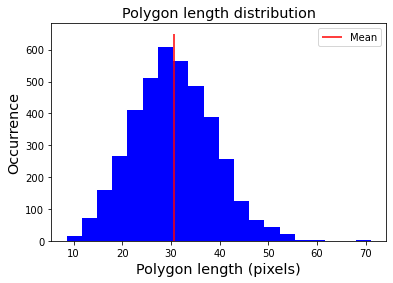

In [6]:
plt.hist(np.sqrt(n_areas), 20, density=False, facecolor='b')
plt.vlines(x=np.mean(np.sqrt(n_areas)),ymin=0,ymax=650,label='Mean',color='red')
plt.ylabel("Occurrence", size="x-large")
plt.xlabel("Polygon length (pixels)", size="x-large")
plt.title("Polygon length distribution", size="x-large")
plt.legend()
plt.savefig("dist_2_pdf.pdf", format="pdf", bbox_inches="tight")

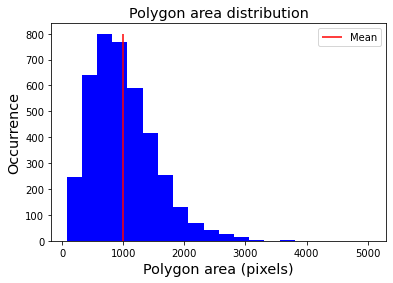

In [7]:
plt.hist(n_areas, 20, density=False, facecolor='b')
plt.vlines(x=np.mean(n_areas),ymin=0,ymax=800,label='Mean',color='red')
plt.ylabel("Occurrence", size="x-large")
plt.xlabel("Polygon area (pixels)", size="x-large")
plt.title("Polygon area distribution", size="x-large")
plt.legend()
plt.savefig("dist_1_pdf.pdf", format="pdf", bbox_inches="tight")

In [12]:
sqrta = np.sqrt(n_areas)

(array([ 14.,  70., 161., 266., 410., 512., 609., 565., 486., 388., 257.,
        124.,  65.,  44.,  22.,   3.,   3.,   0.,   0.,   1.]),
 array([ 8.54400375, 11.67067469, 14.79734563, 17.92401657, 21.05068751,
        24.17735845, 27.30402939, 30.43070034, 33.55737128, 36.68404222,
        39.81071316, 42.9373841 , 46.06405504, 49.19072599, 52.31739693,
        55.44406787, 58.57073881, 61.69740975, 64.82408069, 67.95075163,
        71.07742258]),
 <BarContainer object of 20 artists>)

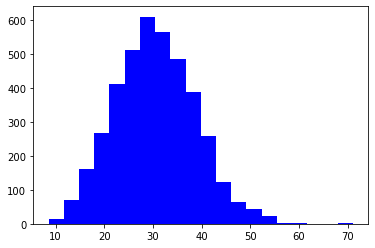

In [13]:
plt.hist(sqrta, 20, density=False, facecolor='b')

In [4]:
#Manhattan
#1K
MT1_1K=np.array([0.04876933333333333, 0.05004233333333334, 0.044776, 0.049236444444444444, 0.045634777777777774, 0.04592255555555555, 0.046156333333333334, 0.045123777777777783, 0.045601666666666665, 0.04630988888888889, 0.04507688888888889, 0.04410011111111111, 0.04427166666666668, 0.04324811111111111, 0.04317666666666667, 0.04349488888888889, 0.042139666666666666, 0.043629111111111105, 0.04411244444444445, 0.04369655555555556, 0.04412255555555556, 0.04202566666666666, 0.04326566666666667, 0.042653111111111114, 0.04345277777777778, 0.04323766666666666, 0.043512222222222216, 0.04281444444444444, 0.044095999999999996, 0.043250333333333335, 0.04612333333333333, 0.042963888888888885, 0.04319100000000001, 0.04388988888888889, 0.043871, 0.04299666666666666, 0.045478000000000005, 0.043015777777777785, 0.043194555555555555, 0.04128577777777778, 0.04135777777777778, 0.041614333333333337, 0.040979555555555554, 0.043589333333333334, 0.04169144444444445, 0.041777777777777775, 0.04157511111111111, 0.041102, 0.04183655555555556, 0.04127644444444445, 0.04063111111111111, 0.04160066666666667, 0.04108177777777777, 0.04189988888888888, 0.040697555555555556, 0.041217000000000004, 0.04178122222222222, 0.041203333333333335, 0.040677222222222226, 0.04143644444444444, 0.04161255555555556, 0.04136922222222222, 0.04121411111111111, 0.041421444444444434, 0.041043777777777776, 0.04096588888888889, 0.04126811111111111, 0.04048177777777778, 0.04034477777777778, 0.04427955555555555, 0.040849222222222224, 0.04115244444444445, 0.041658333333333325, 0.04075188888888889, 0.04044022222222222, 0.04424255555555555, 0.040580111111111115, 0.04084622222222222, 0.04094911111111111, 0.04071266666666667, 0.04053155555555555, 0.04088722222222222, 0.041792888888888886, 0.04077522222222222, 0.04108122222222222, 0.04055811111111111, 0.04048977777777778, 0.041087888888888896, 0.04471588888888889, 0.04051955555555555, 0.040548, 0.040959333333333334, 0.040840111111111105, 0.041175222222222224, 0.040898666666666667, 0.04045933333333333, 0.04069855555555556, 0.040859444444444434, 0.04092988888888889, 0.04098422222222223])
MT2_1K=np.array([0.022511999999999997, 0.023617000000000003, 0.026372444444444445, 0.027183555555555555, 0.026963444444444443, 0.027154777777777778, 0.027294111111111113, 0.026799444444444445, 0.02704233333333333, 0.027436777777777775, 0.03192822222222222, 0.031278111111111104, 0.03129855555555555, 0.030561444444444443, 0.030504666666666666, 0.030691444444444445, 0.029714666666666667, 0.03082966666666666, 0.031209, 0.03085733333333333, 0.031121111111111113, 0.029558222222222225, 0.030514888888888893, 0.03012811111111111, 0.03062566666666667, 0.030456444444444446, 0.030567222222222228, 0.030123666666666667, 0.030970333333333336, 0.030337555555555555, 0.032371888888888894, 0.030216555555555556, 0.030419555555555557, 0.030737000000000007, 0.030701888888888886, 0.030129666666666673, 0.031160222222222218, 0.030137666666666667, 0.030233555555555555, 0.03412677777777778, 0.03407944444444445, 0.034383, 0.033749555555555553, 0.037131777777777784, 0.034403333333333334, 0.034414222222222214, 0.03430922222222222, 0.03386855555555555, 0.03437988888888889, 0.033971, 0.03365322222222222, 0.03445544444444445, 0.03409411111111111, 0.03464411111111111, 0.03362144444444445, 0.034090888888888886, 0.03447588888888889, 0.034041999999999996, 0.03356577777777778, 0.03427488888888889, 0.03433633333333333, 0.03414422222222222, 0.03407988888888888, 0.034224333333333336, 0.033941111111111116, 0.03389777777777778, 0.034120777777777785, 0.03335855555555556, 0.03331033333333333, 0.03669, 0.033904000000000004, 0.03397777777777778, 0.03438122222222222, 0.03364411111111112, 0.03342711111111111, 0.03669433333333333, 0.03347611111111111, 0.033659999999999995, 0.03382344444444444, 0.03358922222222222, 0.03351488888888889, 0.033744222222222224, 0.03356555555555555, 0.033579888888888895, 0.033966666666666666, 0.03344266666666666, 0.033461666666666674, 0.03399377777777778, 0.03584777777777778, 0.033555777777777775, 0.03364088888888889, 0.03376411111111111, 0.033815111111111115, 0.03413811111111111, 0.033692, 0.03343388888888889, 0.03334322222222222, 0.03381644444444445, 0.033937777777777775, 0.03388555555555555])
MSP_1K=MT1_1K/MT2_1K
#2K
MT1_2K=np.array([0.1634458888888889, 0.1490658888888889, 0.14519766666666667, 0.14274111111111112, 0.14073499999999997, 0.13921855555555557, 0.13809422222222223, 0.13682366666666665, 0.13618088888888888, 0.14217255555555555, 0.13451033333333334, 0.13365222222222223, 0.13305633333333333, 0.13257122222222226, 0.13255333333333333, 0.13170999999999997, 0.13125522222222222, 0.1308741111111111, 0.13060311111111111, 0.13026411111111108, 0.12997733333333333, 0.1297023333333333, 0.12933699999999998, 0.12904477777777779, 0.1288698888888889, 0.1294263333333333, 0.1283328888888889, 0.12793188888888887, 0.13176988888888888, 0.1274988888888889, 0.1274098888888889, 0.1271828888888889, 0.12689622222222224, 0.12663733333333335, 0.12638433333333335, 0.126164, 0.12601133333333334, 0.12574511111111109, 0.12543122222222222, 0.1252878888888889, 0.12497033333333334, 0.1282558888888889, 0.12466677777777778, 0.124426, 0.1265091111111111, 0.12413766666666665, 0.12400711111111111, 0.12496488888888886, 0.12363322222222223, 0.12339788888888889, 0.12331033333333334, 0.12319322222222223, 0.12307344444444444, 0.12287366666666667, 0.12272311111111112, 0.12249611111111111, 0.12605822222222224, 0.1223032222222222, 0.12201222222222224, 0.12667144444444445, 0.12184066666666665, 0.12161733333333334, 0.1263648888888889, 0.12146444444444444, 0.12135, 0.12114699999999999, 0.12105333333333333, 0.12087755555555556, 0.12077911111111111, 0.12065722222222225, 0.12055533333333335, 0.12042477777777777, 0.1202421111111111, 0.12013755555555555, 0.12001222222222224, 0.11993111111111111, 0.11973477777777777, 0.11963644444444443, 0.11950411111111113, 0.11945944444444444, 0.11927155555555556, 0.11921200000000003, 0.11930555555555555, 0.11921177777777776, 0.11904611111111112, 0.11894677777777779, 0.1189041111111111, 0.11875799999999999, 0.11865144444444445, 0.12063855555555555, 0.11843877777777778, 0.11826533333333332, 0.11813233333333334, 0.11805477777777777, 0.11804822222222221, 0.11794188888888889, 0.11783466666666666, 0.11769488888888888, 0.11767277777777779, 0.11759199999999999])
MT2_2K=np.array([0.06800811111111112, 0.06583611111111111, 0.0800318888888889, 0.079089, 0.07832322222222222, 0.0775311111111111, 0.07679433333333334, 0.07627477777777779, 0.07551999999999999, 0.07661922222222223, 0.08888933333333332, 0.08833077777777779, 0.08779844444444446, 0.08720377777777778, 0.086674, 0.08610066666666666, 0.08566322222222224, 0.08525822222222224, 0.08473011111111112, 0.08432900000000002, 0.08396522222222222, 0.08369233333333333, 0.083118, 0.08272188888888889, 0.08241333333333332, 0.08253677777777778, 0.08170144444444445, 0.08136233333333334, 0.08371377777777778, 0.08070155555555554, 0.08053033333333334, 0.08020833333333334, 0.07993211111111112, 0.07967333333333332, 0.079368, 0.07898733333333333, 0.07879688888888889, 0.07851655555555556, 0.07832644444444443, 0.07807700000000001, 0.09255977777777777, 0.09401399999999999, 0.09209377777777777, 0.091774, 0.09284799999999999, 0.09128455555555555, 0.09107533333333334, 0.09231033333333333, 0.09077522222222223, 0.09054666666666666, 0.09033766666666666, 0.09002477777777779, 0.08977877777777778, 0.08963755555555557, 0.08952955555555557, 0.089259, 0.08986722222222221, 0.08887033333333333, 0.08872133333333333, 0.09425744444444445, 0.0884257777777778, 0.08828011111111111, 0.0928541111111111, 0.0879488888888889, 0.08777955555555556, 0.08754644444444444, 0.08744855555555556, 0.08740877777777778, 0.08696177777777776, 0.08690255555555555, 0.08688688888888889, 0.08663855555555555, 0.08652077777777777, 0.08641499999999999, 0.08626488888888889, 0.08617111111111111, 0.08592955555555555, 0.08569399999999999, 0.08554477777777778, 0.08553955555555555, 0.08535, 0.08535033333333332, 0.08512511111111112, 0.08504866666666669, 0.08491533333333333, 0.08487922222222222, 0.08467255555555556, 0.08461966666666666, 0.08451766666666666, 0.0870458888888889, 0.08425244444444444, 0.0839831111111111, 0.083973, 0.08382966666666668, 0.08363455555555556, 0.08354666666666667, 0.08339777777777778, 0.08337311111111112, 0.08319877777777777, 0.08316922222222221])
MSP_2K=MT1_2K/MT2_2K
#5K
MT1_5K=np.array([1.7209510000000003, 1.5249228888888888, 1.3997261111111112, 1.3101875555555555, 1.2639262222222223, 1.2190511111111109, 1.179914888888889, 1.1489411111111112, 1.1352396666666664, 1.1226318888888889, 1.1108968888888888, 1.103820888888889, 1.0937044444444446, 1.0908445555555555, 1.0812544444444443, 1.0698892222222223, 1.0673513333333335, 1.0624516666666668, 1.0634981111111113, 1.0572638888888888, 1.0524385555555555, 1.0469933333333334, 1.0448650000000002, 1.0425104444444446, 1.0327646666666666, 1.0345267777777778, 1.0319114444444444, 1.0262774444444445, 1.0282336666666665, 1.0196296666666667, 1.0214116666666668, 1.0155261111111111, 1.0133354444444445, 1.010826888888889, 1.0063702222222222, 1.0072493333333334, 1.0091705555555555, 1.0031771111111112, 1.0015973333333335, 0.9981107777777777, 0.9956522222222222, 0.9923283333333335, 0.9906055555555555, 0.9892026666666668, 0.9909140000000001, 0.9867758888888889, 0.9885053333333332, 0.9854541111111111, 0.9819308888888888, 0.9791368888888888, 0.9770555555555556, 0.9846227777777778, 0.9744586666666668, 0.9745817777777778, 0.9728078888888889, 0.9730497777777778, 0.976268, 0.9725922222222222, 0.9657276666666667, 0.9677051111111111, 0.9735316666666667, 0.969930222222222, 0.9641605555555556, 0.9646733333333333, 0.9666669999999998, 0.9619885555555554, 0.965890888888889, 0.9576982222222221, 0.9572854444444445, 0.9619771111111111, 0.9571995555555556, 0.9541209999999999, 0.9567395555555556, 0.9542384444444443, 0.9498232222222222, 0.9503955555555554, 0.9502101111111111, 0.9503626666666667, 0.9487038888888889, 0.9456477777777779, 0.9489513333333333, 0.9453116666666666, 0.9437181111111109, 0.948514777777778, 0.9437736666666667, 0.9468326666666668, 0.9392455555555556, 0.9422494444444445, 0.9459749999999999, 0.9403230000000001, 0.9379643333333334, 0.9414460000000001, 0.9410601111111111, 0.936394, 0.9368522222222223, 0.9347737777777778, 0.9337936666666666, 0.9383181111111111, 0.9307970000000001, 0.9359947777777777])
MT2_5K=np.array([0.432505, 0.4158776666666667, 0.501686, 0.4957672222222222, 0.49039177777777776, 0.4850755555555556, 0.4804948888888889, 0.4765252222222222, 0.4740443333333333, 0.4708427777777778, 0.5631619999999999, 0.5595746666666667, 0.5560538888888888, 0.5567278888888888, 0.5508865555555555, 0.5462766666666666, 0.5450556666666667, 0.5403610000000001, 0.5411103333333332, 0.5390241111111113, 0.5355325555555556, 0.5323314444444445, 0.5299655555555555, 0.5297368888888889, 0.5235023333333334, 0.5263911111111111, 0.5228575555555557, 0.5198685555555556, 0.5203830000000002, 0.5164273333333332, 0.5164462222222223, 0.5140379999999999, 0.5114484444444445, 0.5101146666666666, 0.5073038888888889, 0.5079078888888889, 0.5071176666666667, 0.505312, 0.5040377777777778, 0.5006835555555554, 0.592838, 0.591898, 0.5900581111111111, 0.5908193333333335, 0.5913694444444445, 0.5870856666666666, 0.5894748888888889, 0.5862313333333333, 0.5841672222222223, 0.5816795555555555, 0.5796115555555557, 0.5829633333333333, 0.5785833333333333, 0.5783163333333332, 0.5757821111111112, 0.576149888888889, 0.5789663333333334, 0.5762281111111113, 0.571768, 0.5721596666666666, 0.5753833333333334, 0.5730221111111111, 0.5687605555555556, 0.5693790000000001, 0.5688087777777778, 0.5668092222222221, 0.5697891111111111, 0.5636103333333333, 0.5637881111111112, 0.565562, 0.5632527777777778, 0.5613035555555556, 0.5629582222222222, 0.5612021111111111, 0.5581163333333333, 0.5574614444444445, 0.558528888888889, 0.5572458888888889, 0.5562948888888888, 0.5533272222222223, 0.5570805555555556, 0.5528755555555556, 0.5524416666666667, 0.555312, 0.5524373333333333, 0.554646111111111, 0.5488117777777779, 0.5514709999999999, 0.5533943333333333, 0.54797, 0.5469196666666666, 0.5496477777777778, 0.5478565555555556, 0.5452723333333334, 0.546003, 0.5440451111111112, 0.5445513333333333, 0.5479518888888889, 0.5412137777777778, 0.5457491111111111])
MSP_5K=MT1_5K/MT2_5K
#10K
MT1_10K=np.array([8.144095888888891, 7.430007777777778, 7.016751111111111, 6.761390444444444, 6.507557444444445, 6.276289222222222, 6.1504813333333335, 5.9992736666666655, 5.907123555555556, 5.673274666666668, 5.578058333333334, 5.515976666666666, 5.423755111111112, 5.332128222222221, 5.266593, 5.212132666666666, 5.155048777777777, 5.120542444444445, 5.059135222222222, 5.015382333333333, 4.975565555555556, 4.929237, 4.876650333333334, 4.814753, 4.774550555555556, 4.736362777777778, 4.711077666666667, 4.663330666666667, 4.633806000000001, 4.595605888888889, 4.566057666666667, 4.553820555555556, 4.545297999999999, 4.533313777777778, 4.514293666666667, 4.508251222222222, 4.494434666666667, 4.475302222222222, 4.467044333333333, 4.449141222222223, 4.435852888888888, 4.431661777777778, 4.423000888888889, 4.417569666666667, 4.406455333333334, 4.390282444444444, 4.3929482222222225, 4.376273888888888, 4.36930888888889, 4.360489888888889, 4.353156666666666, 4.360526666666667, 4.347437, 4.340455222222222, 4.325935444444443, 4.321781, 4.314253555555555, 4.308953555555555, 4.306019555555555, 4.29991711111111, 4.290088888888889, 4.292675555555555, 4.281924, 4.276367888888888, 4.272148222222223, 4.273117777777777, 4.259489555555556, 4.255805888888889, 4.252625999999999, 4.250980555555555, 4.2468613333333325, 4.2428095555555565, 4.238472999999999, 4.226839222222222, 4.2334567777777785, 4.221108888888889, 4.225790999999999, 4.2154446666666665, 4.206737666666665, 4.198016777777778, 4.196367333333333, 4.196248777777779, 4.191614888888889, 4.1834956666666665, 4.1830913333333335, 4.178484555555555, 4.178917444444445, 4.178219777777778, 4.176108777777778, 4.1690499999999995, 4.165049333333333, 4.170216333333333, 4.160315555555556, 4.151712666666667, 4.155878111111111, 4.145460777777777, 4.145895444444445, 4.141458333333333, 4.144953444444444, 4.131464])
MT2_10K=np.array([1.721534, 1.640926111111111, 1.975069777777778, 1.9432864444444446, 1.9185637777777775, 1.896763888888889, 1.8774915555555556, 1.8564607777777777, 1.8393159999999997, 1.825173666666667, 2.1899958888888893, 2.1734982222222223, 2.1641802222222224, 2.150335, 2.136537888888889, 2.1270985555555555, 2.1131004444444446, 2.1099806666666665, 2.093300444444444, 2.0856886666666665, 2.082289666666666, 2.0689385555555555, 2.060727333333334, 2.0493786666666667, 2.0460405555555554, 2.036049111111111, 2.031806333333334, 2.0178343333333335, 2.012439666666667, 2.004300111111111, 1.9978605555555555, 1.9922785555555553, 1.988838222222222, 1.9846506666666666, 1.9758793333333335, 1.9746461111111107, 1.9674737777777775, 1.957956777777778, 1.9551619999999998, 1.9488931111111114, 2.3152443333333337, 2.3110622222222226, 2.3075351111111115, 2.3036942222222216, 2.2978703333333335, 2.2882003333333327, 2.289026555555556, 2.279247222222222, 2.275068777777778, 2.2706718888888893, 2.2662975555555556, 2.2658875555555555, 2.2614983333333334, 2.2561624444444446, 2.2470584444444444, 2.245953444444444, 2.2412746666666665, 2.2380074444444444, 2.2357956666666663, 2.2323203333333335, 2.2262603333333337, 2.2275797777777773, 2.220879777777778, 2.216022, 2.214942111111111, 2.212768, 2.2026704444444443, 2.200753111111111, 2.1990439999999998, 2.198901444444444, 2.1944254444444447, 2.191059666666667, 2.1884931111111112, 2.1813238888888886, 2.1847666666666665, 2.174555, 2.177860777777778, 2.1702592222222226, 2.1677827777777776, 2.1634321111111112, 2.1597695555555556, 2.1591427777777774, 2.1569415555555556, 2.1509508888888886, 2.1522623333333333, 2.1480774444444446, 2.1474117777777777, 2.1451638888888893, 2.143584, 2.1377372222222224, 2.1371111111111114, 2.1380913333333336, 2.1296225555555552, 2.1254832222222224, 2.1300612222222224, 2.123391333333333, 2.123006, 2.1207403333333334, 2.1210502222222223, 2.1144477777777775])
MSP_10K=MT1_10K/MT2_10K
#20K
MT1_20K=np.array([35.51874444444444, 32.69483711111111, 31.246265, 30.29472988888889, 29.44908977777778, 28.740477777777773, 28.181474555555557, 27.580551666666665, 27.296658111111114, 26.74476944444445, 26.364416555555557, 25.977079444444442, 25.772277, 25.538149222222224, 25.04548644444445, 24.955024333333338, 24.622910888888885, 24.45797522222222, 24.394049555555554, 23.857646888888887, 23.682684444444444, 23.728766888888888, 23.353011444444444, 22.877118444444445, 22.691489999999998, 22.68160177777778, 22.679622222222225, 22.46260566666667, 22.239813222222224, 22.088928333333328, 21.973820777777778, 21.895906222222223, 21.842409444444442, 21.817748555555553, 21.77385711111111, 21.49954011111111, 21.215385666666666, 21.028066, 20.830798444444447, 20.67389088888889, 20.564855888888886, 20.477962999999995, 20.408534111111113, 20.356063111111112, 20.297809777777772, 20.243712111111112, 20.186252999999997, 20.12273433333333, 20.07153211111111, 19.98640011111111, 19.88089655555556, 19.78915311111111, 19.72664366666667, 19.657397777777778, 19.602265888888887, 19.559282333333332, 19.50342577777778, 19.45649, 19.40992177777778, 19.36289833333333, 19.305445333333335, 19.271709444444443, 19.230068888888887, 19.190138333333334, 19.14825788888889, 19.11100777777778, 19.082735555555555, 19.03214633333333, 18.981928, 18.952160888888887, 18.915341444444444, 18.88720833333333, 18.839342666666667, 18.80166144444445, 18.768004444444443, 18.74170722222222, 18.705182444444446, 18.657789222222227, 18.61275666666667, 18.569692, 18.517278666666666, 18.477613555555553, 18.45270222222222, 18.422462666666664, 18.38987, 18.35997144444444, 18.324458, 18.29130388888889, 18.265927555555557, 18.23432677777778, 18.20274444444444, 18.172373444444446, 18.1298, 18.097010666666666, 18.05510622222222, 18.018860111111113, 17.973431555555557, 17.933047777777777, 17.914055444444447, 17.89474322222222])
MT2_20K=np.array([6.906301666666668, 6.562961888888889, 7.891087222222222, 7.759730111111111, 7.649341333333333, 7.5618773333333325, 7.476476555555554, 7.401293222222222, 7.335621777777778, 7.267764333333334, 8.762743, 8.699708333333334, 8.643487555555557, 8.596691444444442, 8.541076444444444, 8.495216777777777, 8.45142888888889, 8.402229666666667, 8.366597333333335, 8.325394888888889, 8.289594666666666, 8.245851333333334, 8.211930777777779, 8.17682277777778, 8.148788666666668, 8.114884444444444, 8.087664555555556, 8.05368088888889, 8.025310555555556, 7.992824111111111, 7.965040222222222, 7.944805666666667, 7.920911888888889, 7.892924999999999, 7.862654777777777, 7.843258, 7.8187331111111105, 7.800191222222223, 7.771920111111111, 7.755504888888889, 9.329972222222223, 9.313115333333334, 9.292741444444443, 9.271162666666665, 9.253346111111112, 9.229337222222222, 9.206655222222222, 9.198196000000001, 9.172259777777779, 9.154227555555556, 9.134078777777779, 9.117642222222223, 9.102382222222221, 9.082638, 9.063738555555556, 9.050040555555555, 9.034224666666667, 9.021461111111112, 8.998601777777777, 8.982652222222221, 8.970796777777778, 8.961173333333333, 8.943144444444444, 8.928682555555557, 8.917614777777779, 8.897893, 8.886196888888888, 8.872005333333336, 8.854200666666667, 8.844009111111113, 8.828254, 8.815805333333335, 8.810588777777777, 8.801685444444443, 8.782820888888889, 8.76623711111111, 8.761844666666669, 8.741700444444444, 8.738355444444444, 8.723646333333335, 8.705934333333333, 8.695675555555555, 8.683903666666666, 8.676917666666666, 8.668443333333334, 8.656226555555556, 8.649681222222222, 8.637580666666667, 8.626240000000001, 8.620442777777775, 8.610522111111113, 8.593890888888888, 8.589806444444445, 8.578242222222222, 8.564059444444444, 8.558392333333334, 8.551557555555554, 8.541611222222222, 8.52994611111111, 8.519411666666667])
MSP_20K=MT1_20K/MT2_20K
#40K
MT1_40K=np.array([379.3377684444444, 224.26456855555554, 145.05389244444441, 141.1071488888889, 137.89028255555556, 135.199902, 132.8066168888889, 130.69833699999998, 128.94817955555558, 127.46756577777779, 126.17683411111109, 125.0062308888889, 123.9446198888889, 122.74270722222224, 121.98006622222222, 121.05946422222223, 120.068851, 119.17581677777778, 118.42031177777777, 117.66023166666668, 116.81533488888888, 116.07068622222225, 115.38791155555555, 114.78557666666666, 114.24813822222222, 113.4935948888889, 112.70654822222222, 112.47643544444445, 111.66774066666666, 111.22198411111111, 110.66519255555558, 110.0830671111111, 109.52203111111112, 109.33836544444443, 108.75215733333332, 108.77336288888888, 107.8789681111111, 107.419798, 107.56302133333334, 106.74961777777777, 106.29648, 106.28992144444446, 105.88629144444445, 105.14387177777778, 104.8057116666667, 104.861268, 104.43530700000001, 103.57520711111111, 103.0049481111111, 102.90909822222223, 103.06269755555556, 102.73761255555556, 102.17260988888889, 101.94132222222223, 101.62391577777778, 101.64176766666667, 101.74223677777779, 101.50169033333333, 100.43811111111111, 99.84568022222223, 99.38855899999999, 99.16464300000001, 99.19062211111111, 99.25330855555556, 99.37104633333333, 98.782586, 98.22157944444446, 97.9635078888889, 97.54919255555558, 97.33796377777779, 97.16961922222221, 97.07699499999998, 97.13989444444445, 97.20335566666667, 97.26813844444445, 96.88546500000001, 96.11718233333333, 95.65901855555555, 95.17487933333331, 94.71338077777779, 94.4964378888889, 94.23896455555557, 94.03690844444444, 93.98012022222224, 93.985378, 93.96955522222223, 93.96950966666665, 93.9819388888889, 93.93045466666666, 93.46262688888889, 92.83937833333331, 92.46420955555556, 91.85371755555555, 91.59802922222222, 91.15234277777778, 90.86023199999998, 90.5555708888889, 90.35874522222221, 90.21322044444443, 90.10860433333333])
MT2_40K=np.array([27.76304233333333, 26.319196777777776, 31.618639777777773, 31.074506666666665, 30.635266444444444, 30.25762677777778, 29.908443555555557, 29.602549111111117, 29.331539666666668, 29.060325222222225, 35.49131566666667, 35.25954466666667, 35.04037588888889, 34.82540477777778, 34.65155033333333, 34.440879, 34.245170222222214, 34.08419211111111, 33.92296011111111, 33.76462055555555, 33.61229766666666, 33.46130588888889, 33.321258, 33.196822777777776, 33.06834522222222, 32.92751988888889, 32.809908666666665, 32.66786066666666, 32.56310111111111, 32.46814522222221, 32.38252277777778, 32.230228555555556, 32.134263777777775, 32.02700244444444, 31.954313555555554, 31.845283333333334, 31.739551999999996, 31.65752655555556, 31.567890666666667, 31.48541922222222, 37.933555222222225, 37.8521801111111, 37.78127088888888, 37.676791, 37.59162355555556, 37.50675511111111, 37.422894444444445, 37.34085722222222, 37.267817666666666, 37.203517, 37.136907, 37.04345822222221, 36.99747466666666, 36.934385222222225, 36.85843788888889, 36.79108355555556, 36.726309, 36.65845411111111, 36.58124833333333, 36.52293866666667, 36.45595622222223, 36.393344444444445, 36.33424911111111, 36.27757944444445, 36.22273422222222, 36.17026122222222, 36.11851933333334, 36.074641444444445, 36.012968888888885, 35.958670222222224, 35.918803555555556, 35.873716111111115, 35.83101444444444, 35.78041344444444, 35.74417122222223, 35.67954611111111, 35.62646355555555, 35.57726455555556, 35.552297777777774, 35.50133888888889, 35.43428688888889, 35.400757222222225, 35.332687444444446, 35.28808677777778, 35.253684222222226, 35.19878077777778, 35.17089633333333, 35.13424877777778, 35.08086866666667, 35.046699555555556, 35.00298522222222, 34.96017022222222, 34.93340988888889, 34.90173244444444, 34.86447166666667, 34.8189068888889, 34.79446822222222, 34.75147755555555, 34.69592633333333, 34.6824641111111])
MSP_40K=MT1_40K/MT2_40K

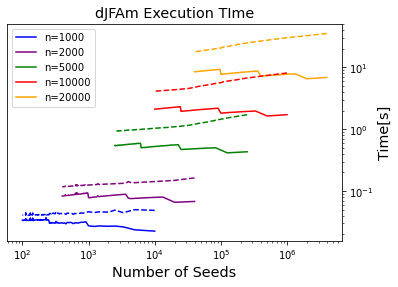

In [99]:
XLEN = np.linspace(100,10000,100)
X_C = np.array([100 for i in range(100)])
figp2,axp2 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp2.plot(Ss[0],MT2_1K,label='n=1000',color='blue')
axp2.plot(Ss[1],MT2_2K,label='n=2000',color='purple')
axp2.plot(Ss[2],MT2_5K,label='n=5000',color='green')
axp2.plot(Ss[3],MT2_10K,label='n=10000',color='red')
axp2.plot(Ss[4],MT2_20K,label='n=20000',color='orange')
#axp2.plot(XLEN,MT2_40K,label='N=40000',color='cyan')
axp2.plot(Ss[0],MT1_1K,'--',color='blue')
axp2.plot(Ss[1],MT1_2K,'--',color='purple')
axp2.plot(Ss[2],MT1_5K,'--',color='green')
axp2.plot(Ss[3],MT1_10K,'--',color='red')
axp2.plot(Ss[4],MT1_20K,'--',color='orange')
#axp2.plot(XLEN,MT1_40K,'--',color='cyan')
#axp2.plot(XLEN,X_C,'k:',color='black')

axp2.set_title("dJFAm Execution TIme", size="x-large")
axp2.legend()
axp2.set_ylabel("Time[s]", size="x-large")
axp2.set_xlabel("Number of Seeds", size="x-large")
axp2.set_xscale('log')
axp2.yaxis.tick_right()
axp2.yaxis.set_label_position("right")

plt.yscale('log')
#plt.xlim(max(XLEN), min(XLEN))

plt.savefig("time_graph_2_pdf.pdf", format="pdf", bbox_inches="tight")

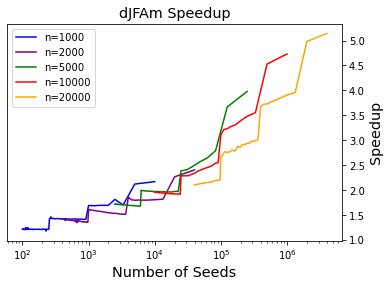

In [69]:
XLEN = np.linspace(100,10000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([2.0 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
XV3_4 = np.array([4.0 for i in range(100)])
XV3_5 = np.array([5.0 for i in range(100)])
figp3,axp3 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp3.plot(Ss[0],MSP_1K,label='n=1000',color='blue')
axp3.plot(Ss[1],MSP_2K,label='n=2000',color='purple')
axp3.plot(Ss[2],MSP_5K,label='n=5000',color='green')
axp3.plot(Ss[3],MSP_10K,label='n=10000',color='red')
axp3.plot(Ss[4],MSP_20K,label='n=20000',color='orange')
#axp3.plot(XLEN,MSP_40K,label='N=40000',color='cyan')
#axp3.plot(XLEN,XV3_1,'k:',color='black')
#axp3.plot(XLEN,XV3_2,'k:',color='black')
#axp3.plot(XLEN,XV3_3,'k:',color='black')
#axp3.plot(XLEN,XV3_4,'k:',color='black')
#axp3.plot(XLEN,XV3_5,'k:',color='black')

axp3.set_title("dJFAm Speedup", size="x-large")
axp3.legend()
axp3.set_ylabel("Speedup", size="x-large")
axp3.set_xlabel("Number of Seeds", size="x-large")

#axp3.set_xlim(max(XLEN), min(XLEN))
axp3.set_xscale('log')
axp3.yaxis.tick_right()
axp3.yaxis.set_label_position("right")


#plt.xlim(max(XLEN), min(XLEN))
plt.savefig("sp_graph_2_pdf.pdf", format="pdf", bbox_inches="tight")

(10000.0, 100.0)

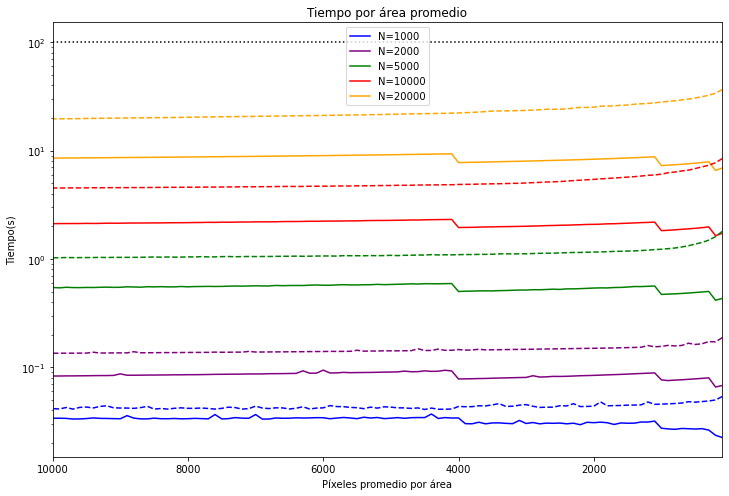

In [21]:
XLEN = np.linspace(100,10000,100)
X_C = np.array([100 for i in range(100)])
figp2,axp2 = plt.subplots(1,1,figsize=(12,8), tight_layout=False)
axp2.plot(XLEN,MT2_1K,label='N=1000',color='blue')
axp2.plot(XLEN,MT2_2K,label='N=2000',color='purple')
axp2.plot(XLEN,MT2_5K,label='N=5000',color='green')
axp2.plot(XLEN,MT2_10K,label='N=10000',color='red')
axp2.plot(XLEN,MT2_20K,label='N=20000',color='orange')
axp2.plot(XLEN,T1_1K,'--',color='blue')
axp2.plot(XLEN,T1_2K,'--',color='purple')
axp2.plot(XLEN,T1_5K,'--',color='green')
axp2.plot(XLEN,T1_10K,'--',color='red')
axp2.plot(XLEN,T1_20K,'--',color='orange')
axp2.plot(XLEN,X_C,'k:',color='black')

axp2.set_title("Tiempo por área promedio")
axp2.legend()
axp2.set_ylabel("Tiempo(s)")
axp2.set_xlabel("Píxeles promedio por área")

plt.yscale('log')
plt.xlim(max(XLEN), min(XLEN))

(10000.0, 100.0)

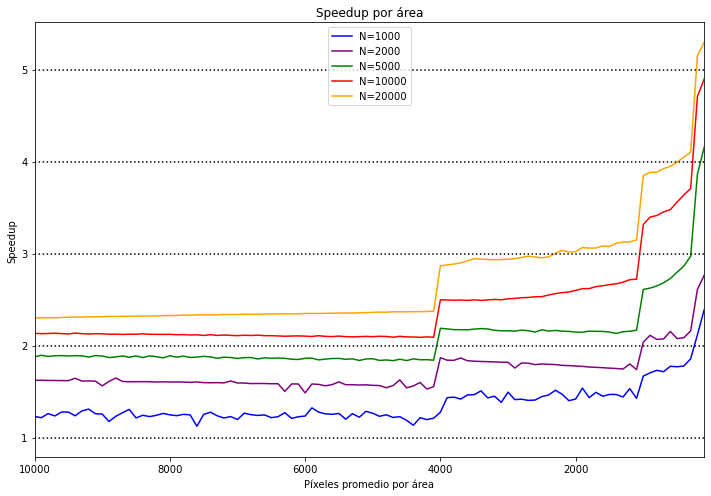

In [22]:
XLEN = np.linspace(100,10000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([2.0 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
XV3_4 = np.array([4.0 for i in range(100)])
figp3,axp3 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp3.plot(XLEN,T1_1K/MT2_1K,label='N=1000',color='blue')
axp3.plot(XLEN,T1_2K/MT2_2K,label='N=2000',color='purple')
axp3.plot(XLEN,T1_5K/MT2_5K,label='N=5000',color='green')
axp3.plot(XLEN,T1_10K/MT2_10K,label='N=10000',color='red')
axp3.plot(XLEN,T1_20K/MT2_20K,label='N=20000',color='orange')
axp3.plot(XLEN,XV3_1,'k:',color='black')
axp3.plot(XLEN,XV3_2,'k:',color='black')
axp3.plot(XLEN,XV3_3,'k:',color='black')
axp3.plot(XLEN,XV3_4,'k:',color='black')
axp3.plot(XLEN,XV3_5,'k:',color='black')

axp3.set_title("Speedup por área", size="x-large")
axp3.legend()
axp3.set_ylabel("Speedup", size="x-large")
axp3.set_xlabel("Píxeles promedio por área", size="x-large")

plt.xlim(max(XLEN), min(XLEN))

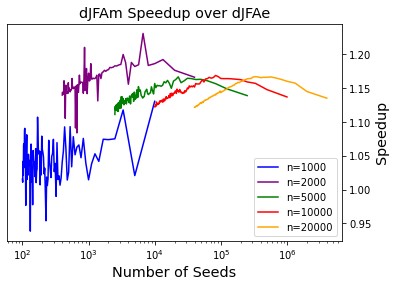

In [8]:
XLEN = np.linspace(100,10000,100)
XV3_1 = np.array([1.0 for i in range(100)])
XV3_2 = np.array([1.5 for i in range(100)])
XV3_3 = np.array([3.0 for i in range(100)])
XV3_4 = np.array([4.0 for i in range(100)])
figp3,axp3 = plt.subplots(1,1,figsize=(6,4), tight_layout=False)
axp3.plot(Ss[0],T2_1K/MT2_1K,label='n=1000',color='blue')
axp3.plot(Ss[1],T2_2K/MT2_2K,label='n=2000',color='purple')
axp3.plot(Ss[2],T2_5K/MT2_5K,label='n=5000',color='green')
axp3.plot(Ss[3],T2_10K/MT2_10K,label='n=10000',color='red')
axp3.plot(Ss[4],T2_20K/MT2_20K,label='n=20000',color='orange')
#axp3.plot(XLEN,XV3_1,'k:',color='black')
#axp3.plot(XLEN,XV3_2,'k:',color='black')
axp3.set_title("dJFAm Speedup over dJFAe", size="x-large")
axp3.legend()
axp3.set_ylabel("Speedup", size="x-large")
axp3.set_xlabel("Number of Seeds", size="x-large")
axp3.set_xscale('log')
axp3.yaxis.tick_right()
axp3.yaxis.set_label_position("right")

#plt.xlim(max(XLEN), min(XLEN))
plt.savefig("sp_graph_3_pdf.pdf", format="pdf", bbox_inches="tight")